# 13. The Great Depression and the Great Recession

#### See email for notes

## The Great Depression

### Production and Unemployment

In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime

NBER_dict = {"Monthly":{"U":"https://data.nber.org/databases/macrohistory/rectdata/08/m08292a.dat",
                        "Business Activity Index":"https://data.nber.org/databases/macrohistory/rectdata/12/m12007.dat",
                       }, 
             "Annual":{"RGNP":"https://data.nber.org/databases/macrohistory/rectdata/08/a08166.dat"}}

for freq, var_list in NBER_dict.items():
    for key in var_list:
        url = copy.copy(NBER_dict[freq][key])
        if freq == "Annual":
            NBER_dict[freq][key] = pd.read_fwf(filepath_or_buffer = url, 
                header = None).rename(columns = {0:"Date", 1:key})
            NBER_dict[freq][key]["Date"] = pd.to_datetime(NBER_dict[freq][key]["Date"].astype(str))
        elif freq == "Monthly":
            NBER_dict[freq][key] = pd.read_fwf(filepath_or_buffer = url, 
                header = None).rename(columns = {0: "Year", 1: "Month", 2:key})
            
            NBER_dict[freq][key]["Date"] = pd.to_datetime(NBER_dict[freq][key]["Month"].astype(str) + "/" + NBER_dict[freq][key]["Year"].astype(str))
        NBER_dict[freq][key].set_index("Date", inplace = True)
        NBER_dict[freq][key] = NBER_dict[freq][key].replace(".",np.NaN).astype(float)
# for key in NBER_dict["Annual"]:
#     NBER_dict["Monthly"][key] = NBER_dict["Annual"][key]
#     NBER_dict["Monthly"][key] = NBER_dict["Monthly"][key].interpolate(method='polynomial', order=3)

Text(0.5, 1.0, '1929-04 to 1940-09')

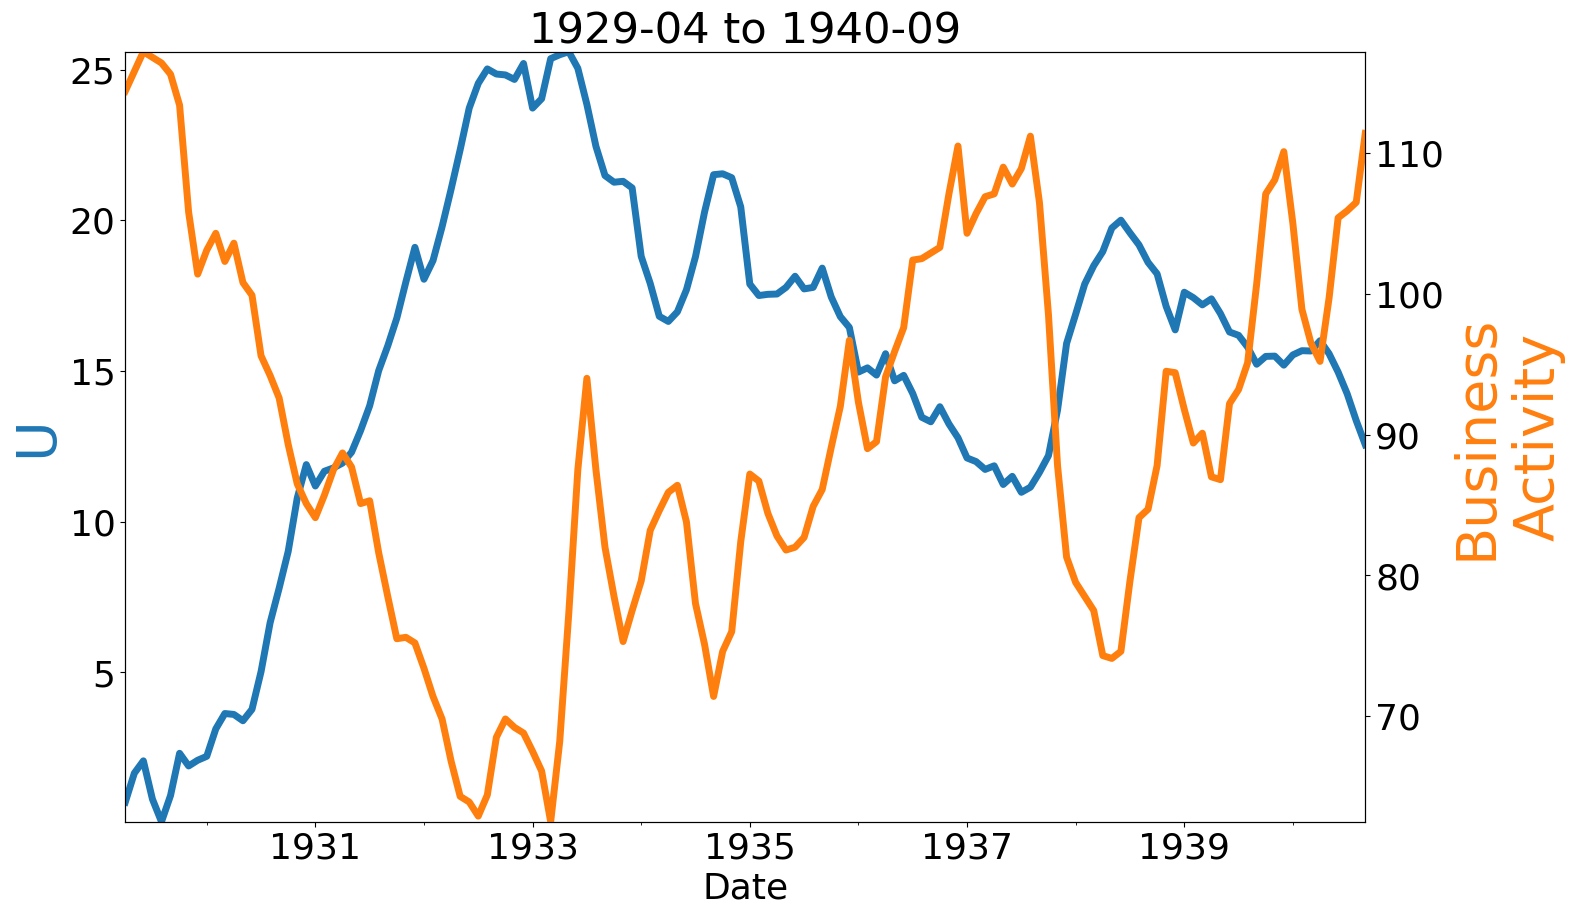

In [2]:
plt.rcParams.update({"font.size":26})
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plot_df = pd.DataFrame([NBER_dict["Monthly"][key][key] for key in NBER_dict["Monthly"]]).T.dropna()
fig, ax = plt.subplots(figsize = (16,10))
ax2 = ax.twinx()
plot_df[["U"]].plot.line(linewidth = 5,
                          ax = ax,
                         legend = False)
plot_df[["Business Activity Index"]].plot.line(linewidth = 5,
                            ax = ax2,
                           color = "C1",
                           legend = False)
ax.set_ylabel("U", fontsize = 40, color = "C0")
ax2.set_ylabel("Business\nActivity", fontsize = 40, color = "C1")
ax.set_title(str(plot_df.index[0])[:7] + " to " + str(plot_df.index[-1])[:7])

Timestamp('1929-04-01 00:00:00', freq='MS')

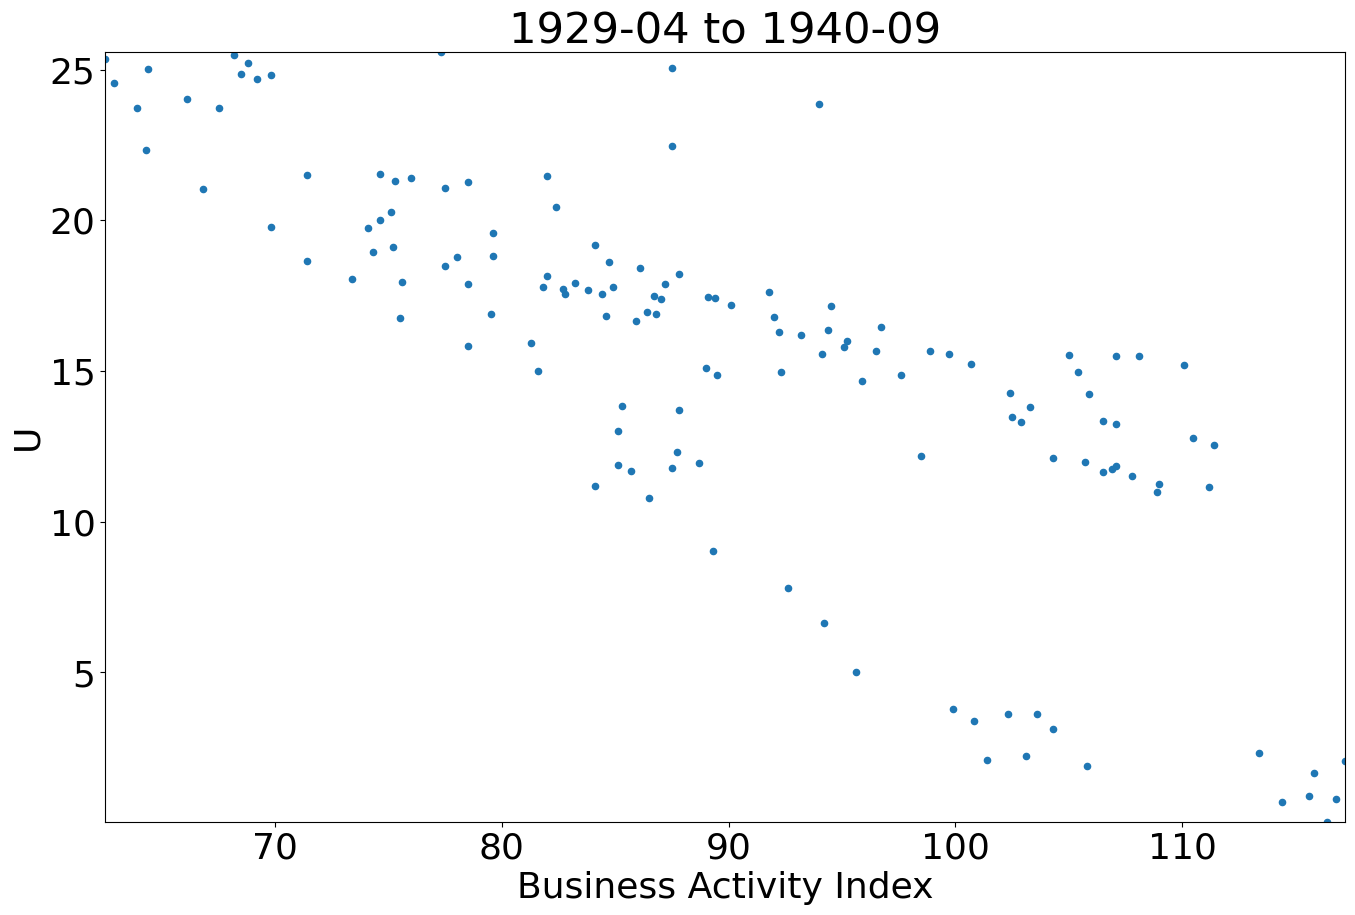

In [3]:
fig, ax = plt.subplots(figsize = (16,10))
plot_df.plot.scatter(x = "Business Activity Index", y = "U",
                          ax = ax,
                         legend = False)

ax.set_title(str(plot_df.index[0])[:7] + " to " + str(plot_df.index[-1])[:7])
plot_df.index[0]

Text(0.5, 1.0, '1930-04 to 1940-09')

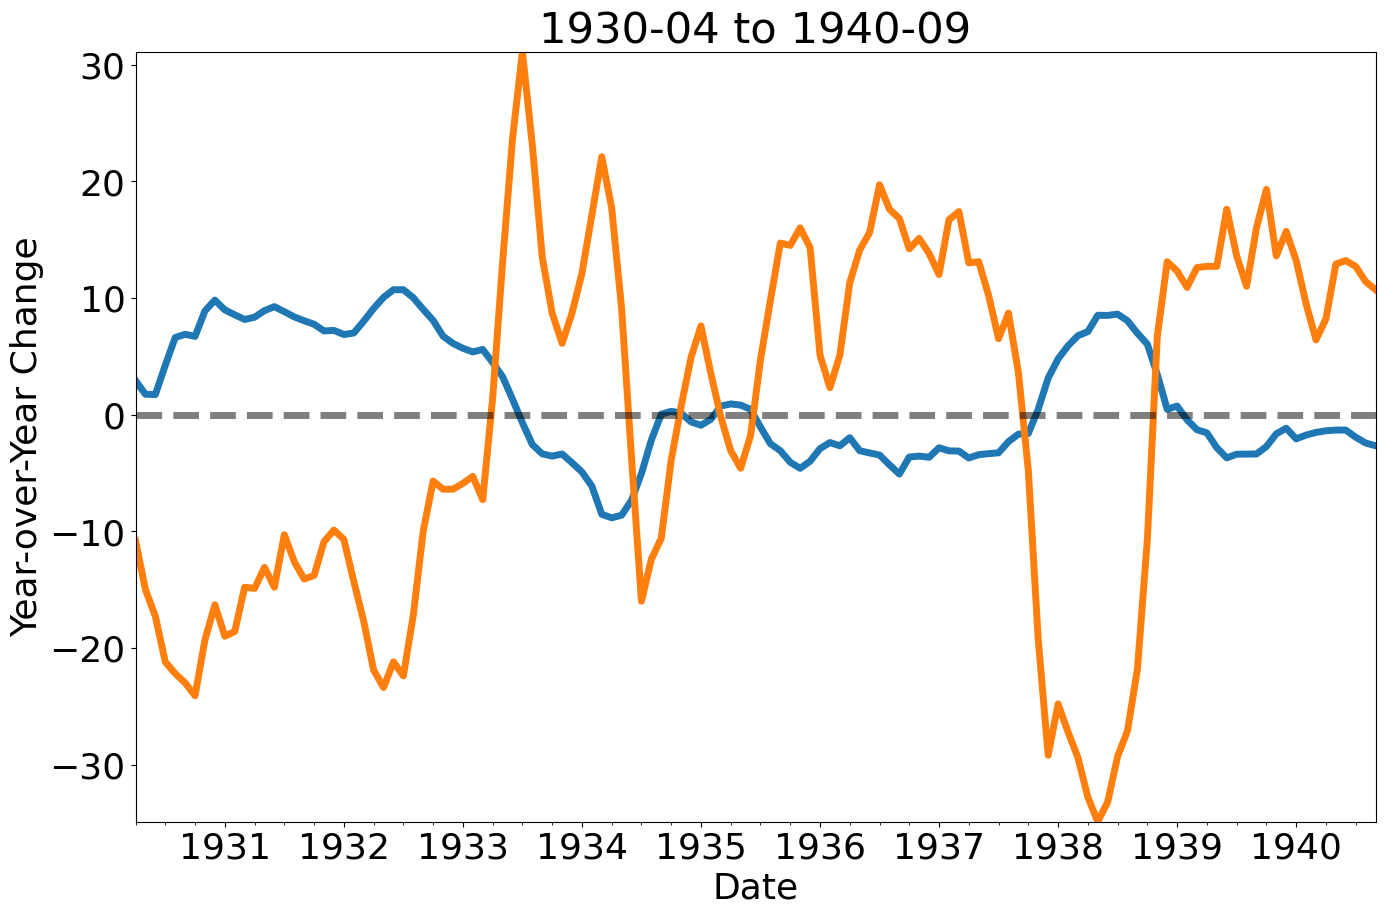

In [4]:

plot_df = pd.DataFrame([NBER_dict["Monthly"][key][key] for key in NBER_dict["Monthly"]]).T.diff(12).dropna()
fig, ax = plt.subplots(figsize = (16,10))
plot_df[["U", "Business Activity Index"]].plot.line(linewidth = 5,
                          ax = ax,
                         legend = False)
# plot_df[["Business Activity Index"]].plot.line(linewidth = 5,
#                             ax = ax,
#                            color = "C1",
#                            legend = False)

ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.set_ylabel("Year-over-Year Change")
ax.set_title(str(plot_df.index[0])[:7] + " to " + str(plot_df.index[-1])[:7])

Text(0.5, 1.0, '1930-04 to 1940-09\nYear-over-Year Change')

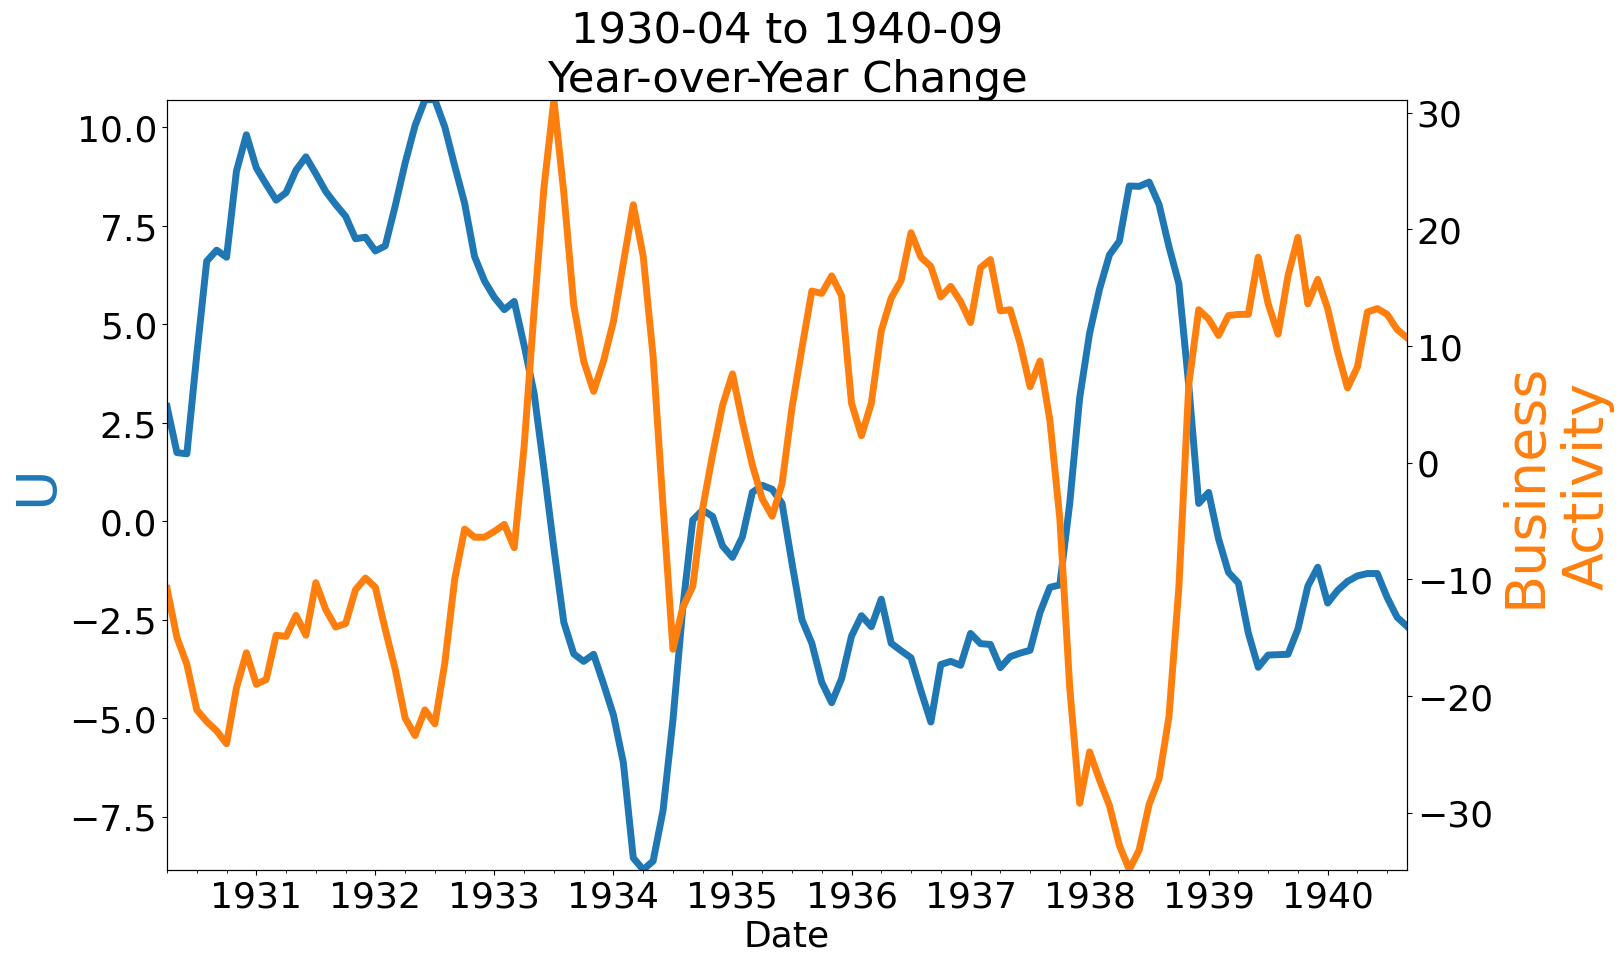

In [5]:
plt.rcParams.update({"font.size":26})
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plot_df = pd.DataFrame([NBER_dict["Monthly"][key][key] for key in NBER_dict["Monthly"]]).T.diff(12).dropna()
fig, ax = plt.subplots(figsize = (16,10))
ax2 = ax.twinx()
plot_df[["U"]].plot.line(linewidth = 5,
                          ax = ax,
                         legend = False)
plot_df[["Business Activity Index"]].plot.line(linewidth = 5,
                            ax = ax2,
                           color = "C1",
                           legend = False)
ax.set_ylabel("U", fontsize = 40, color = "C0")
ax2.set_ylabel("Business\nActivity", fontsize = 40, color = "C1")
ax.set_title(str(plot_df.index[0])[:7] + " to " + str(plot_df.index[-1])[:7] + "\nYear-over-Year Change")

Text(0.5, 1.0, '1930-04 to 1940-09\nYear-over-Year Change')

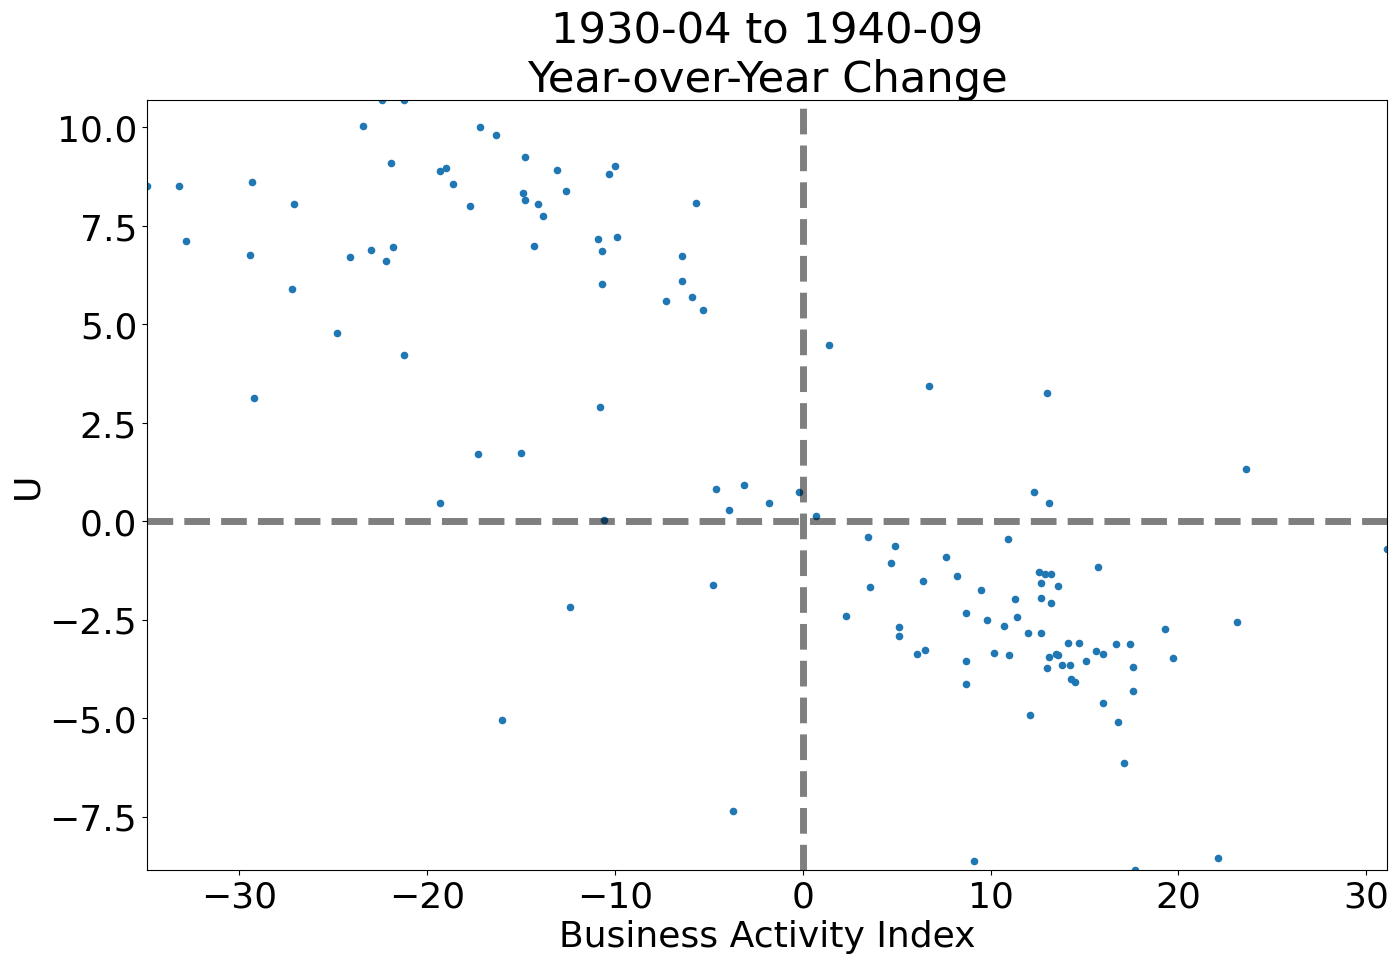

In [6]:
fig, ax = plt.subplots(figsize = (16,10))
plot_df.plot.scatter(x = "Business Activity Index", y = "U",
                          ax = ax,
                         legend = False)
ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.axvline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.set_title(str(plot_df.index[0])[:7] + " to " + str(plot_df.index[-1])[:7] + "\nYear-over-Year Change")

### Central Banks and International Gold Demand

#### Bagehot's Rule

1. Lend freely

2. Lend at high (penalty) interest rates

3. Lend on bank paper that would be good when conditions were normal

4. Advertise the policy boldly

5. "carry on" until all the banks' gold reserves are gone (Humphrey and Timberlake 2019, 82)

#### Tight Monetary Policy at the Federla Reserve and Real Bills Doctrine


In [7]:
fedData = pd.read_csv("fedData.csv", index_col="Date", parse_dates=True)#, infer_datetime_format=True)
fedData.rename(columns={col: col.replace(" ($ Mil)","") for col in fedData.keys()}, inplace = True)
fedData["$\\frac{Gold}{Base}$"] = fedData["Gold at Fed (mil)"].div(fedData["High Powered Money (mil)"])
fedData[:"1936"].head()

Gold at Fed (mil)  High Powered Money (mil)  \
Date                                                      
1918-01-01               2873                      5513   
1918-02-01               2875                      5708   
1918-03-01               2878                      5813   
1918-04-01               2879                      5892   
1918-05-01               2885                      5855   

            High Powered Money Less Gold (mil) Total   Gold Multiplier (Base)  \
Date                                                                            
1918-01-01                                2640   1170                1.918900   
1918-02-01                                2833   1143                1.985391   
1918-03-01                                2935   1263                2.019805   
1918-04-01                                3013   1381                2.046544   
1918-05-01                                2970   1412                2.029463   

            Gold Multiplier (M1)  Bills Discounted  Bills Bought  \
Date                                                               
1918-01-01              6.297250               612           266   
1918-02-01              6.193043               529           288   
1918-03-01              6.410007               537           315   
1918-04-01              6.434873               751           313   
1918-05-01              6.211785               897           278   

            U.S. Government Securities  All Other  Comm Paper  \
Date                                                            
1918-01-01                         149        143        5.57   
1918-02-01                         185        141        5.68   
1918-03-01                         271        140        5.88   
1918-04-01                         173        144        5.91   
1918-05-01                          86        151        5.88   

            NYFRB Discount Window  Price Level (1913=100)  \
Date                                                        
1918-01-01                   4.25                   144.0   
1918-02-01                   4.25                   146.0   
1918-03-01                   4.25                   147.0   
1918-04-01                   4.51                   149.0   
1918-05-01                   4.56                   151.0   

            Annualized Inflation  12 Month MA  Weighted Monthly Inflation  \
Date                                                                        
1918-01-01              0.125000          NaN                         NaN   
1918-02-01              0.123077          NaN                    0.166667   
1918-03-01              0.113636          NaN                    0.082192   
1918-04-01              0.095588          NaN                    0.163265   
1918-05-01              0.086331          NaN                    0.161074   

            12 Month MA Weighted Inflation  $\frac{Gold}{Base}$  
Date                                                             
1918-01-01                             NaN             0.521132  
1918-02-01                             NaN             0.503679  
1918-03-01                             NaN             0.495097  
1918-04-01                             NaN             0.488629  
1918-05-01                             NaN             0.492741

In [8]:

def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()
    return df
GD_dict = {"Dow Jones":"M1109BUSM293NNBR",
           "$CPI^{-1}$": "CUUR0000SA0R",
            "Federal Surplus": "FYFSD",
           "GDP":"FYGDP",
           "Industrial Poduction":"INDPRO",
           "Total Deposits ($ Mil)": "X02DT",
           "# Banks": "BNKTTL"}
           

In [9]:
diff = 12
freq = "M"
start = datetime.datetime(1913, 1, 1)
# end = datetime.datetime(2019, 12, 31)
end =datetime.datetime.today()
GD_data = gather_data(GD_dict, start, 
          end = end, freq = freq)
GD_data["CPI"] = GD_data["$CPI^{-1}$"].pow(-1)
GD_data["CPI"] = GD_data["CPI"].div(GD_data["CPI"].iloc[0])
GD_data["GDP"] = GD_data["GDP"].interpolate(method='polynomial', order=3).mul(1000)
GD_data["Federal Surplus"] = GD_data["Federal Surplus"].interpolate(method='polynomial', order=3)   
GD_data["$\\frac{Surplus}{GDP}$"] =  GD_data["Federal Surplus"].div(GD_data["GDP"])
GD_data.head()

Dow Jones  $CPI^{-1}$  Federal Surplus  GDP  Industrial Poduction  \
DATE                                                                            
1914-12-31      55.00       984.3              NaN  NaN                   NaN   
1915-01-31      56.55       987.6              NaN  NaN                   NaN   
1915-02-28      56.00       994.2              NaN  NaN                   NaN   
1915-03-31      58.30      1004.4              NaN  NaN                   NaN   
1915-04-30      66.45       994.2              NaN  NaN                   NaN   

            Total Deposits ($ Mil)  # Banks       CPI  $\frac{Surplus}{GDP}$  
DATE                                                                          
1914-12-31                     NaN      NaN  1.000000                    NaN  
1915-01-31                 21894.0  26511.0  0.996659                    NaN  
1915-02-28                     NaN      NaN  0.990042                    NaN  
1915-03-31                     NaN      NaN  0.979988                    NaN  
1915-04-30                     NaN      NaN  0.990042                    NaN

In [10]:
GD_data = GD_data.resample("MS").mean()

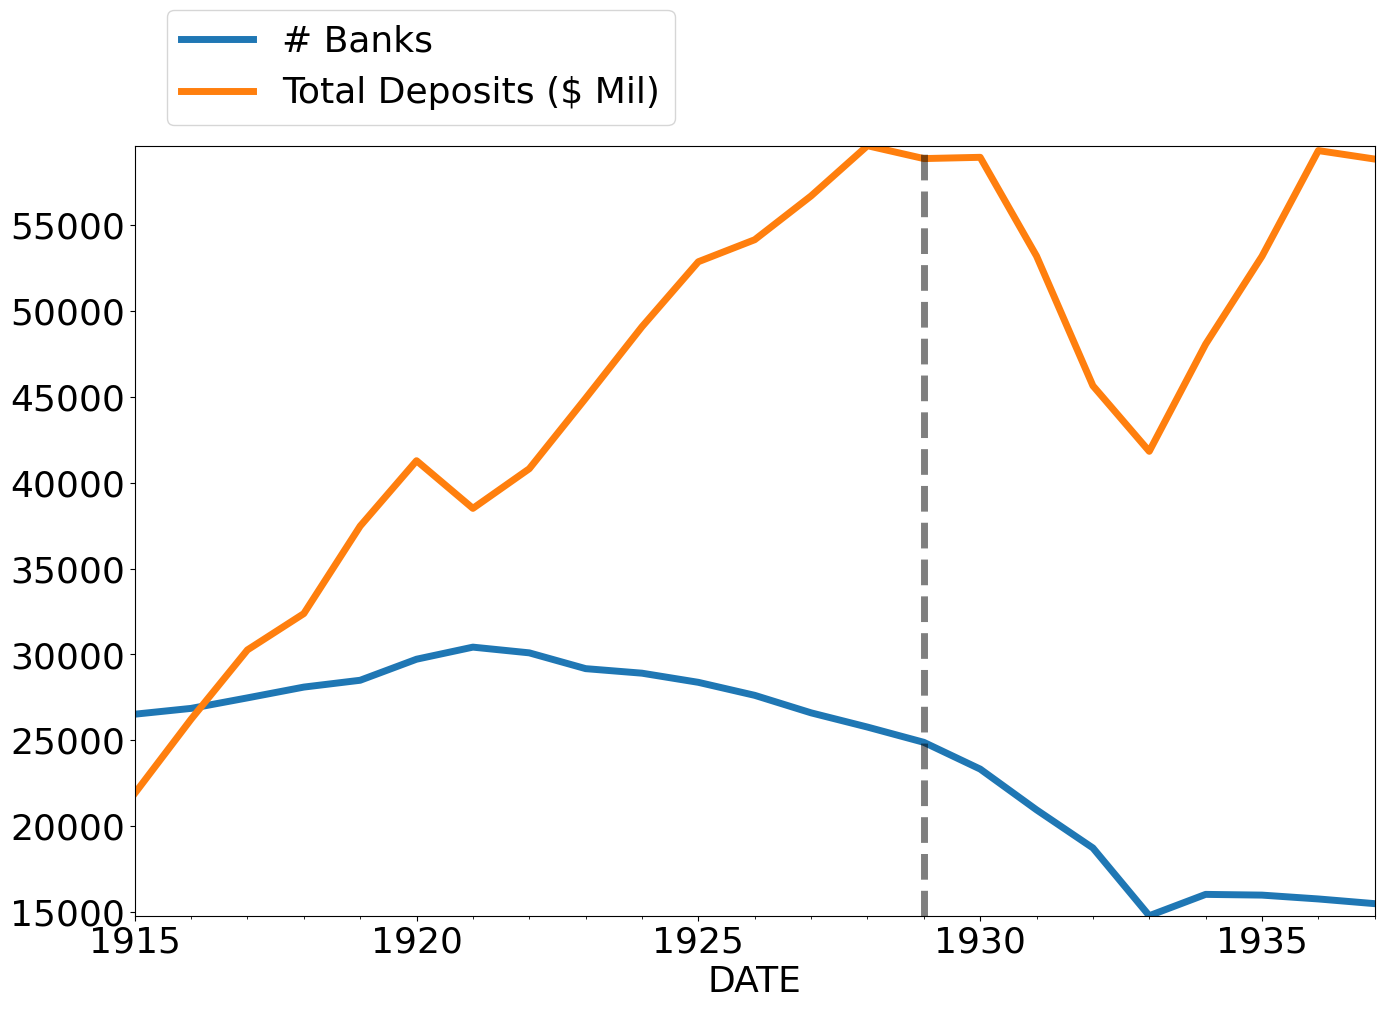

In [11]:
banks_deposits = GD_data.resample("AS").mean()[["# Banks",
                                                "Total Deposits ($ Mil)"]]
fig, ax = plt.subplots(figsize = (16,10))
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
banks_deposits.loc[:"1937"].dropna().plot.line(linewidth = 5, ax = ax, legend = False)
ax.axvline("1929", ls = "--", color = "k", linewidth = 5, alpha = .5)
ax.legend(bbox_to_anchor = (.45, 1.2))

In [12]:
data = pd.read_excel("BankData.xlsx", index_col = [0], parse_dates = True)
data["Total Loans and Investments\n(No Broker Loans)"] = data["Total Loans and Investments"].sub(data["Total Broker Loans"])
for key, val in data.items():
    GD_data[key] = val

In [13]:
norm = GD_data.copy()
for key in norm:
    norm[key] = norm[key].div(norm[key].loc["1929-10-01"])

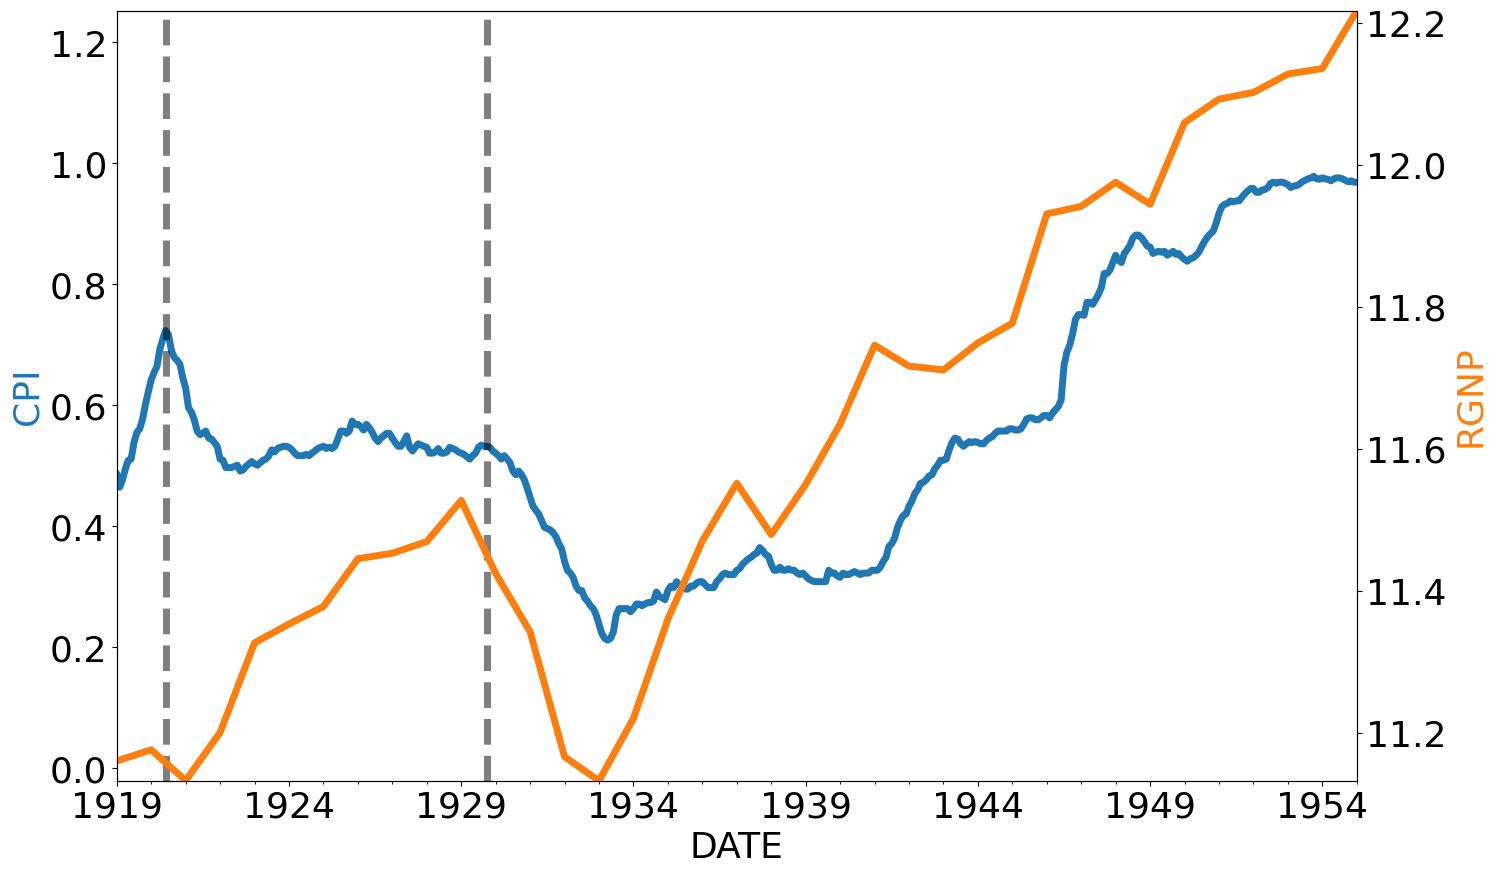

In [14]:
fig, ax = plt.subplots(figsize = (16,10))
ax2 = ax.twinx()
np.log(GD_data["CPI"]).plot.line(ax = ax, linewidth = 5, legend = False)
np.log(NBER_dict["Annual"]["RGNP"]).plot.line(ax = ax2, color = "C1", linewidth = 5, legend = False)
ax.set_ylabel("CPI", color = "C0")
ax2.set_ylabel("RGNP", color = "C1")
ax.axvline("1920-06", ls = "--", color = "k", linewidth = 5, alpha = .5)
ax.axvline("1929-10", ls = "--", color = "k", linewidth = 5, alpha = .5)


### Targeting Price Level Stability

C:\Users\JLCat\AppData\Local\Temp\ipykernel_24420\2364928678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df.rename(columns = {name:name.replace(" (mil)", "") for name in plot_df.keys()}, inplace = True)


Text(0.5, 1.0, '1925-1929')

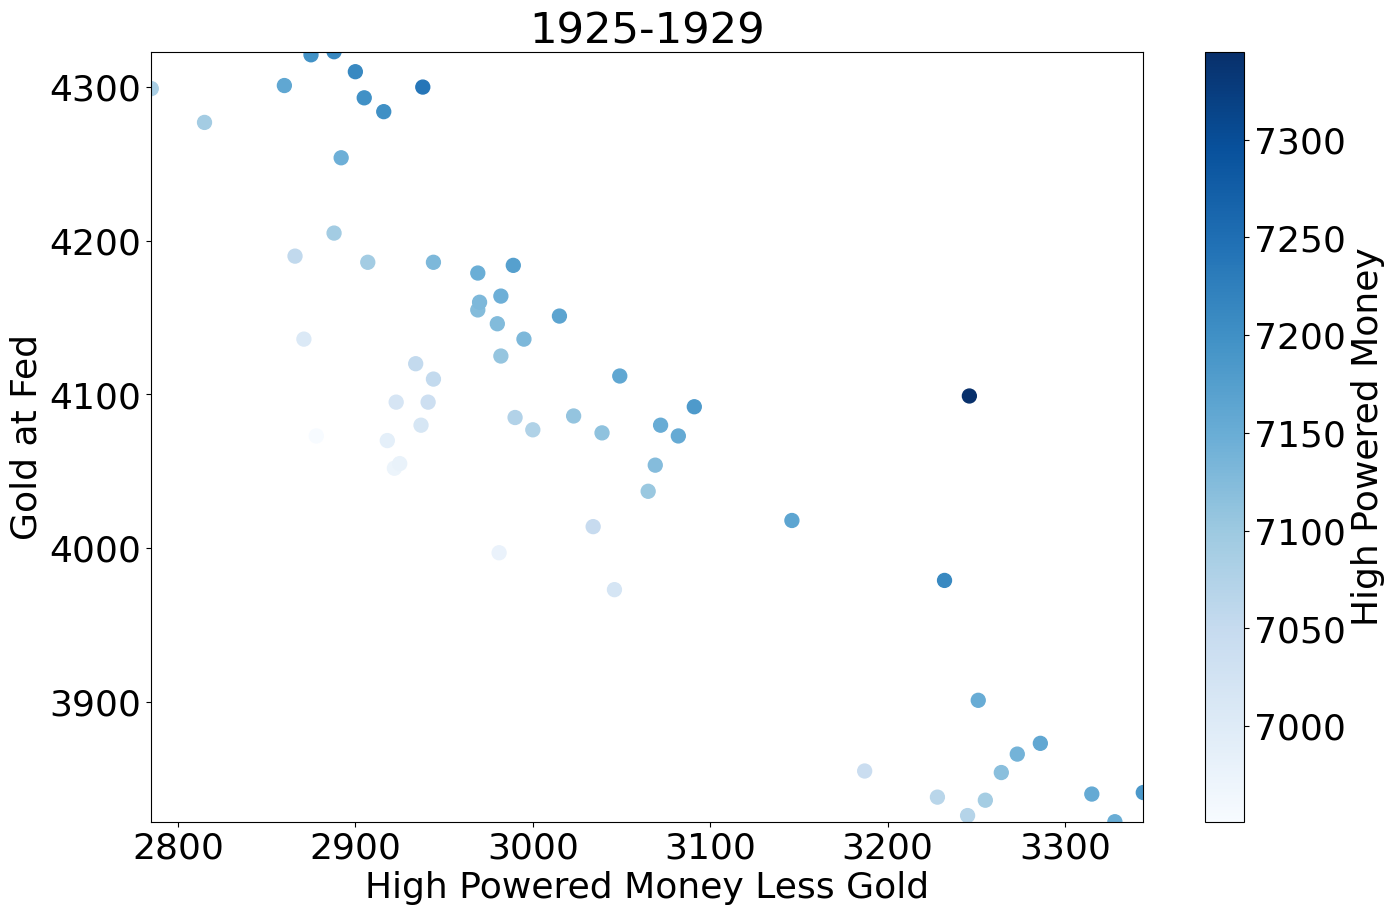

In [15]:
fig, ax = plt.subplots(figsize = (16,10))
plot_df = fedData[["High Powered Money (mil)", "High Powered Money Less Gold (mil)", "Gold at Fed (mil)"]]
plot_df.rename(columns = {name:name.replace(" (mil)", "") for name in plot_df.keys()}, inplace = True)
plot_df.loc["1925":"1929"].plot.scatter(x = "High Powered Money Less Gold", 
                                        y = "Gold at Fed", 
                                        c = "High Powered Money",
                                       ax = ax,
                                       cmap = "Blues",
                                       s = 100)
ax.set_title("1925-1929")

### Real Bills Doctrine and the Level of Lending

C:\Users\JLCat\AppData\Local\Temp\ipykernel_24420\931769740.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val*100)) + "%" for val in ax.get_yticks()], fontsize = 26)


Total Broker Loans  Dow Jones  \
Total Broker Loans                     1.000000   0.259515   
Dow Jones                              0.259515   1.000000   
Total Loans and Investments            0.378757  -0.302590   

                             Total Loans and Investments  
Total Broker Loans                              0.378757  
Dow Jones                                      -0.302590  
Total Loans and Investments                     1.000000

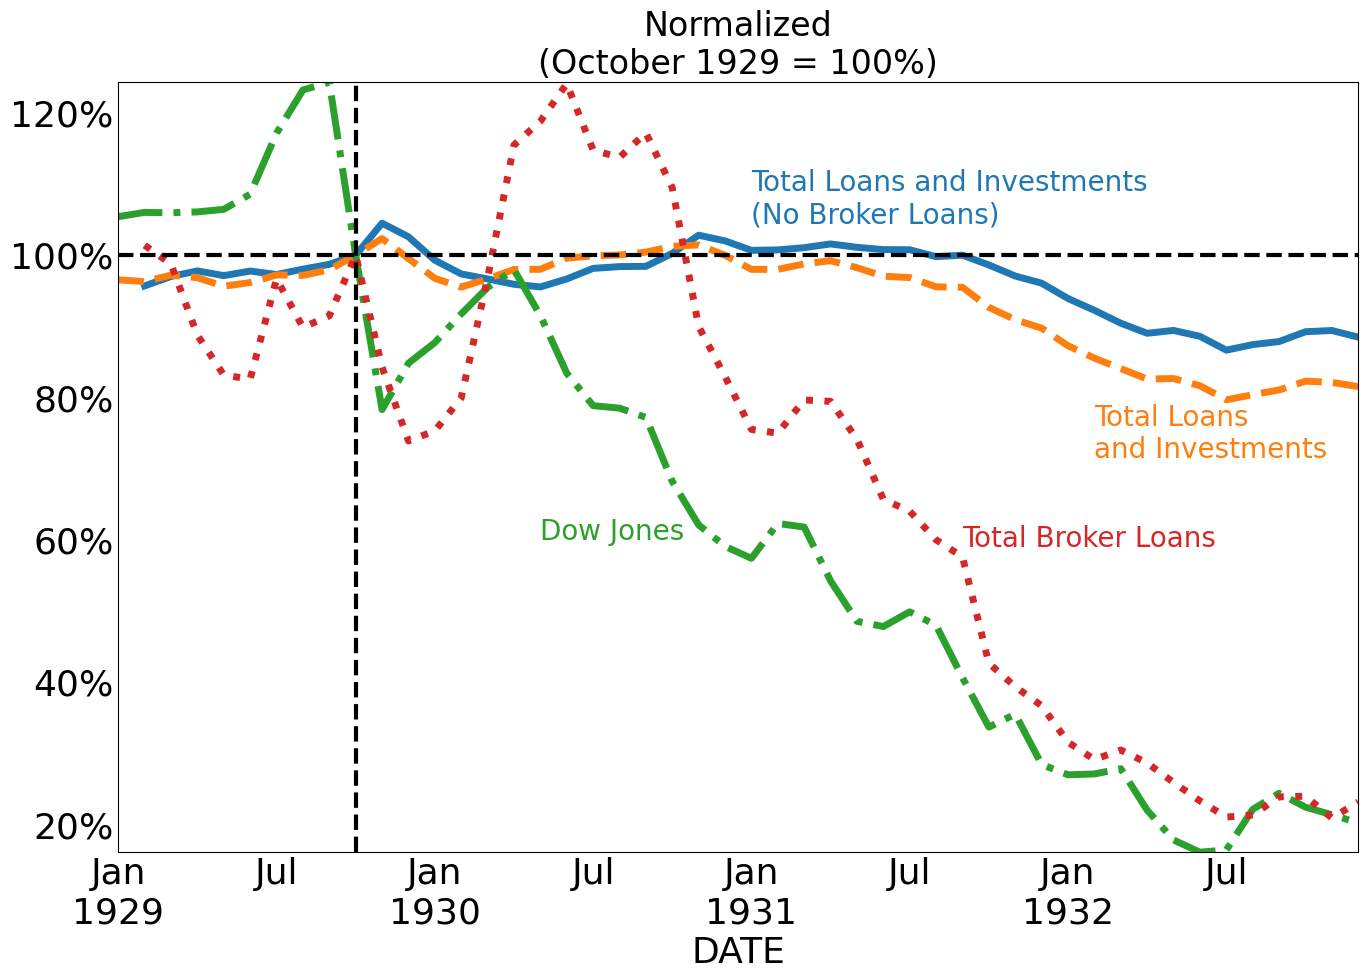

In [16]:
fig, ax = plt.subplots(figsize = (16,10))
plot_vars = {"Total Loans and Investments\n(No Broker Loans)":"-",
             "Total Loans and Investments":"--",
             "Dow Jones": "-.",
             "Total Broker Loans":":"}
for var, ls in plot_vars.items():
    
    norm[var].loc["1929":"1932"].plot.line(ax = ax,
                        linewidth = 5,
                        ls = ls)
# plt.legend(fontsize = 17)
# ax2.set_ylim(0,.15)
plt.axvline("1929-10-01",
         color = "k", 
         ls = "--",
         linewidth = 3)
plt.axhline(1, linewidth = 3, ls = "--", color = "k")
ax.text("1931-01-01", 1.045, "Total Loans and Investments\n(No Broker Loans)", fontsize = 20, color = "C0")
ax.text("1932-2-01", .715, "Total Loans\nand Investments", fontsize = 20, color = "C1")
ax.text("1930-05-01", .6, "Dow Jones", fontsize = 20, color = "C2")
ax.text("1931-9-01", .59, "Total Broker Loans", fontsize = 20, color = "C3")
ax.set_yticklabels([str(int(val*100)) + "%" for val in ax.get_yticks()], fontsize = 26)
ax.tick_params('both', length=0, which='both')


ax.set_title("Normalized\n(October 1929 = 100%)", fontsize = 24)
norm[["Total Broker Loans", "Dow Jones", "Total Loans and Investments"]].diff().corr()

['Bills Discounted', 'Bills Bought', 'U.S. Government Securities', 'All Other']


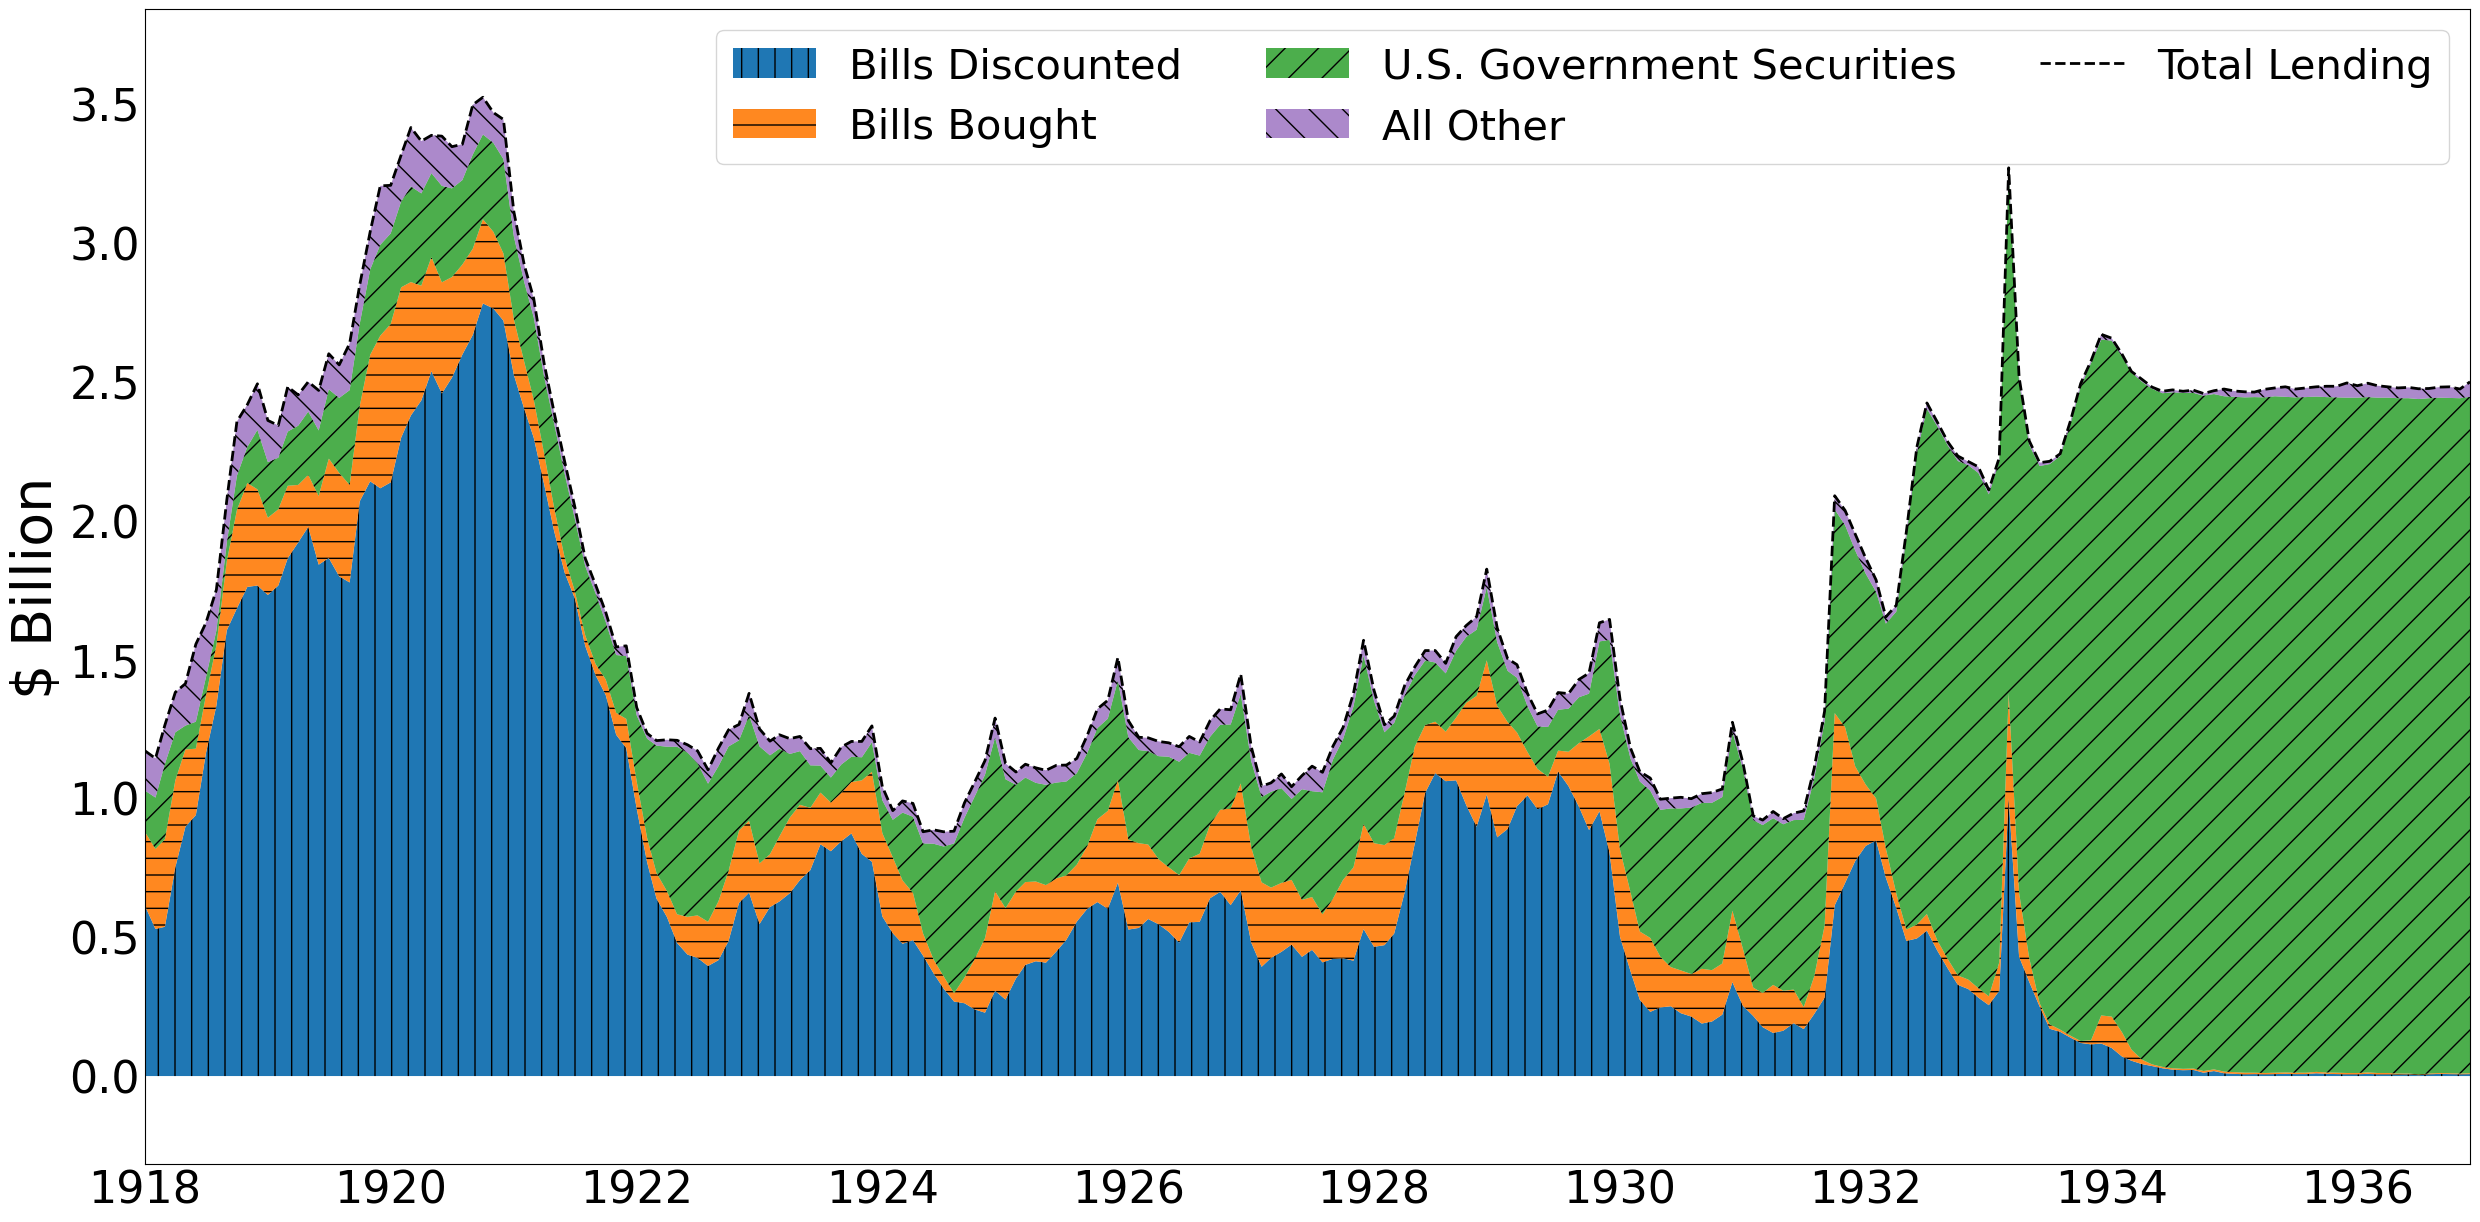

In [17]:
def stack_hatch(df, total_var = None, ylabel = "$ Trillion", 
                hatches = ['|', '-', '/', '\\', '+',  'O', '.', '*'], 
                loc = "upper left",
                colors = ["C0", "C1", "C2", "C4", "C5", "C6", "C7","C8", "C9"],
                ncol = 2):
    keys = list(df.keys())
    keys.remove(total_var)
    print(keys)
    fig, ax = plt.subplots(figsize = (30,15))
    for i in range(len(keys)):
        key = keys[i]
        if i > 0:
            for j in range(i):
                if j == 0:
                    base = df[keys[j]] 
                else:
                    base = base.add(df[keys[j]])
            ax.fill_between(df.index, base, df[key].add(base),
                            facecolor = colors[i],
                            hatch=hatches[i], 
                            alpha = 1 - i * .075, 
                            label = key)
            
        else:
            ax.fill_between(df.index, [0] * len(df.index), df[key],facecolor = colors[i],
                                             hatch=hatches[i], label = key)
            
    if total_var != None:
        ax.plot(df[total_var], label = total_var, linewidth = 2, linestyle = "--",  color = "k")
    ax.legend(loc = loc, ncol = ncol, fontsize = 30)
    ax.set_ylabel(ylabel, fontsize = 40)
    ax.tick_params('both', length=0, which='both')
    
plt.rcParams['axes.ymargin'] = 0.09
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({"font.size":32})

plot_vars = ["Bills Discounted", "Bills Bought", "U.S. Government Securities", "All Other"]
plot_data = fedData[plot_vars].dropna().div(1000)
plot_data["Total Lending"] = plot_data.sum(axis = 1)
total_var = "Total Lending"

stack_hatch(plot_data[plot_vars + [total_var]], total_var, ylabel = "$ Billion", loc = "upper right",ncol = 3)

#### Monetary Policy and International Gold Demand
$$ P = \frac{G_s}{g_d}$$

$$ g = rm_d $$

$$ P = \frac{G_s}{rm_d}$$

$$ P = \frac{P_g g_s}{rm_d}$$

$$r \uparrow \rightarrow g_d \uparrow $$
"Did an increase in the world gold reserve ratio begin reducing aggregate demand in late 1929? And if so, did it also contribute to the 1929 stock market crash?" (37)



C:\Users\JLCat\AppData\Local\Temp\ipykernel_24420\2065341240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df.rename(columns = {name:name.replace(" (mil)", "") for name in plot_df.keys()}, inplace = True)


['High Powered Money Less Gold', 'Gold at Fed']


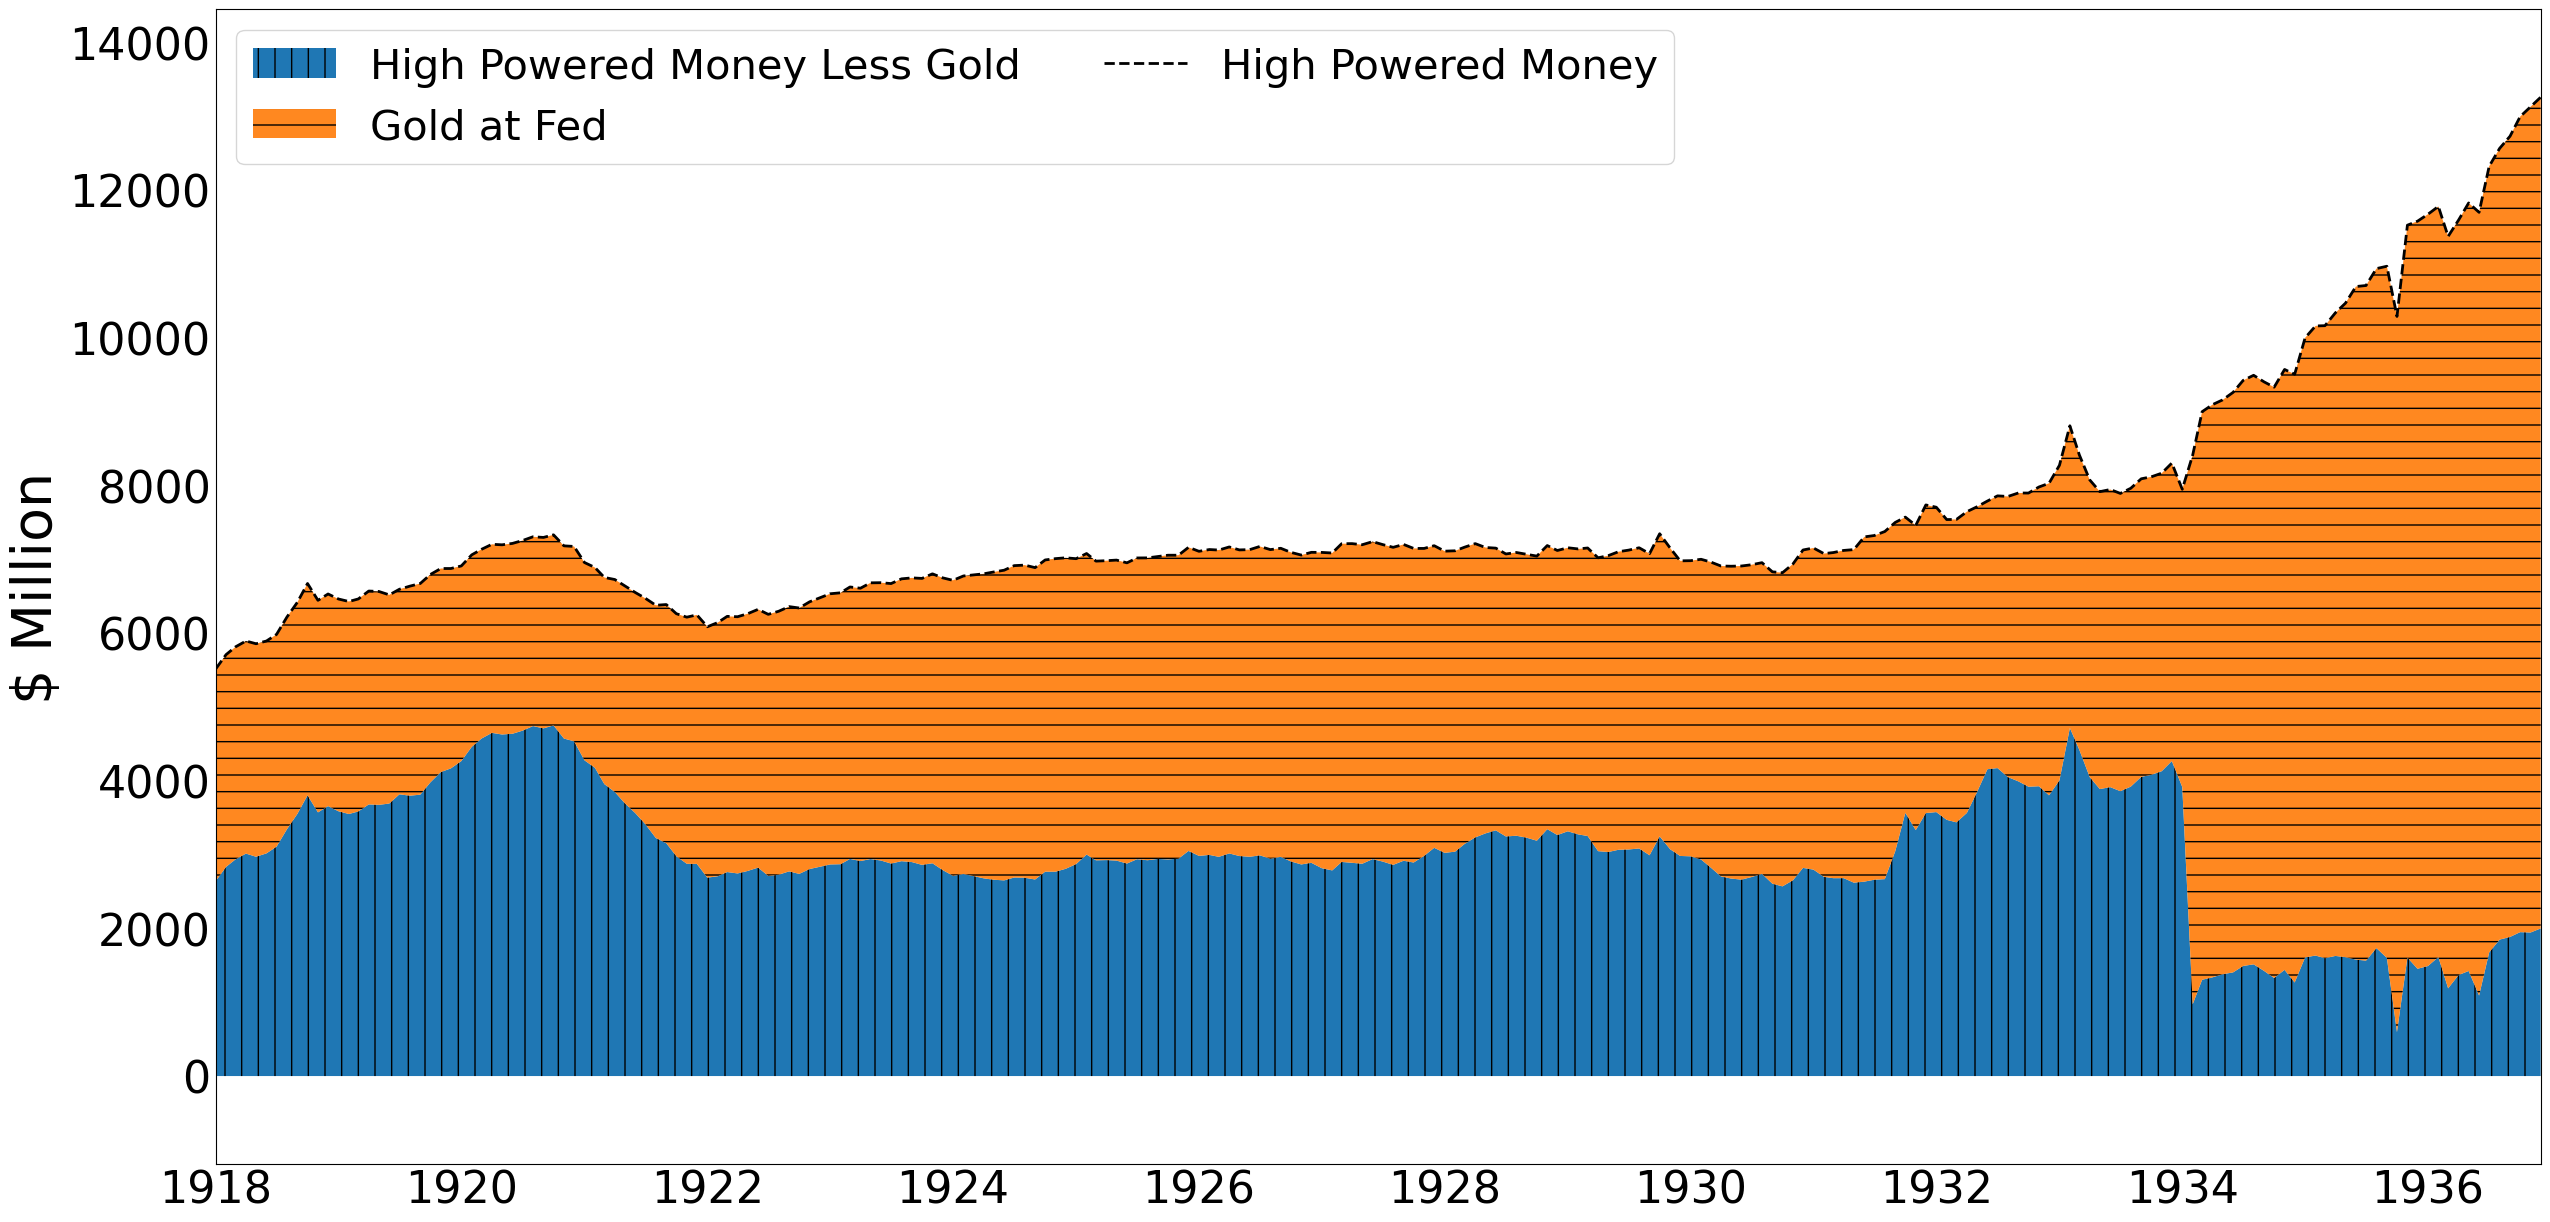

In [18]:
plot_df = fedData[["High Powered Money (mil)", "High Powered Money Less Gold (mil)", "Gold at Fed (mil)"]]
plot_df.rename(columns = {name:name.replace(" (mil)", "") for name in plot_df.keys()}, inplace = True)
stack_hatch(plot_df, total_var = "High Powered Money", ylabel = "$ Million")

In [19]:
gold_data =  pd.read_excel("InternationalGoldData.xlsx", index_col = [0], parse_dates = True)
ln_gold_data = np.log(gold_data)
gold_data["% Gold with CBs and Govts"] = gold_data["CB and Govt Gold"].div(gold_data["Total"])
ln_gold_data["% Gold with CBs and Govts"] = gold_data["% Gold with CBs and Govts"]
ln_gold_data

Monetary Gold  Non-Monetary Gold     Total  CB and Govt Gold  \
DATE                                                                       
1807-12-01       3.633367           4.376260  4.765417               NaN   
1808-12-01       3.640739           4.379273  4.769837               NaN   
1809-12-01       3.648057           4.382027  4.774069               NaN   
1810-12-01       3.655581           4.384274  4.778030               NaN   
1811-12-01       3.663305           4.385022  4.781054               NaN   
...                   ...                ...       ...               ...   
1948-12-01            NaN                NaN  7.372728          6.894062   
1949-12-01            NaN                NaN  7.388309          6.907155   
1950-12-01            NaN                NaN  7.404200          6.916418   
1951-12-01            NaN                NaN  7.420261          6.923727   
1952-12-01            NaN                NaN  7.435715          6.930201   

            Gold Output  Price of Gold  Wholesale Prices  Real Price of Gold  \
DATE                                                                           
1807-12-01          NaN       2.964757          3.828641            3.741286   
1808-12-01          NaN       2.964757          3.706228            3.863700   
1809-12-01          NaN       2.964757          3.828641            3.741286   
1810-12-01          NaN       2.964757          3.835142            3.734786   
1811-12-01          NaN       2.964757          3.797734            3.772194   
...                 ...            ...               ...                 ...   
1948-12-01     3.218876       3.555348          4.416428            3.744090   
1949-12-01     3.254243       3.555348          4.365643            3.794875   
1950-12-01     3.280911       3.555348          4.404277            3.756241   
1951-12-01     3.258097       3.555348          4.511958            3.648560   
1952-12-01     3.273364       3.555348          4.484132            3.676386   

            % Gold with CBs and Govts  
DATE                                   
1807-12-01                        NaN  
1808-12-01                        NaN  
1809-12-01                        NaN  
1810-12-01                        NaN  
1811-12-01                        NaN  
...                               ...  
1948-12-01                   0.619610  
1949-12-01                   0.618070  
1950-12-01                   0.613986  
1951-12-01                   0.608636  
1952-12-01                   0.603196  

[146 rows x 9 columns]

(0.3, 0.55)

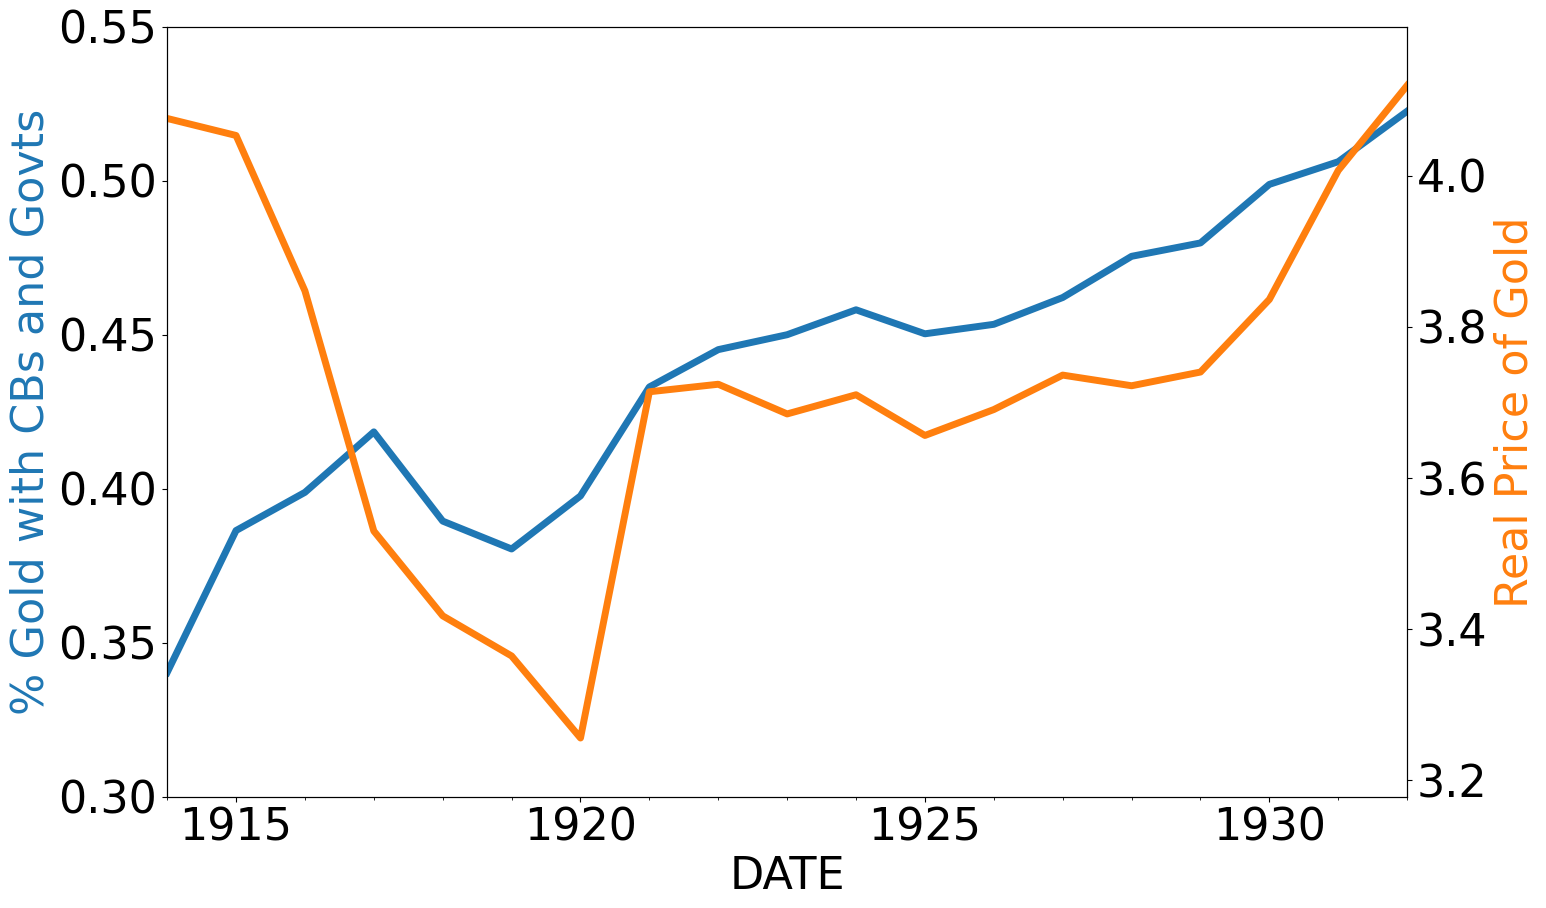

In [20]:
fig, ax = plt.subplots(figsize = (16,10))
ax2 = ax.twinx()
ln_gold_data[["% Gold with CBs and Govts"]].loc["1914":"1932"].dropna().plot.line(
    linewidth = 5, ax = ax, legend = False)
ln_gold_data[["Real Price of Gold"]].loc["1914":"1932"].dropna().plot.line(
    linewidth = 5, legend = False,
    color = "C1",
    ax = ax2)
ax.axhline(0, linewidth = 3, ls = "--", color = "k")
ax.set_ylabel("% Gold with CBs and Govts", color = "C0")
ax2.set_ylabel("Real Price of Gold", color = "C1")
# ln_gold_data["Real Price of Gold"].dropna().plot.line(linewidth = 5,color = "C1", ax = ax2)
ax.set_ylim(.3,.55)

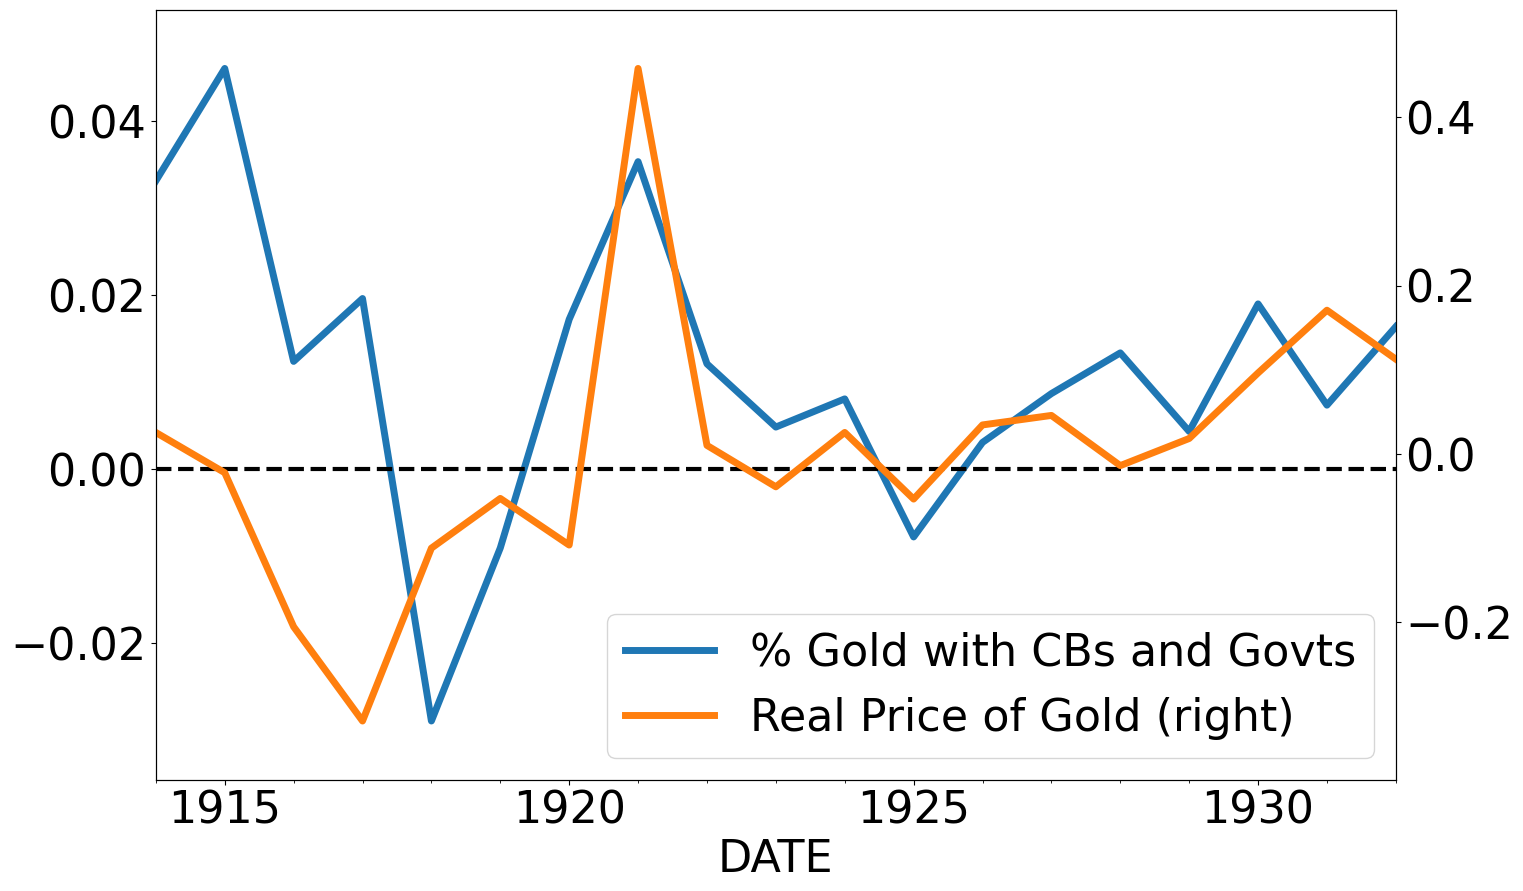

In [21]:
fig, ax = plt.subplots(figsize = (16,10))
ln_gold_data[["% Gold with CBs and Govts", "Real Price of Gold"]].diff().loc[:"1932"].dropna().plot.line(
    linewidth = 5, secondary_y = "Real Price of Gold", ax = ax)
ax.axhline(0, linewidth = 3, ls = "--", color = "k")

Text(0.5, 1.0, 'Global RGDP')

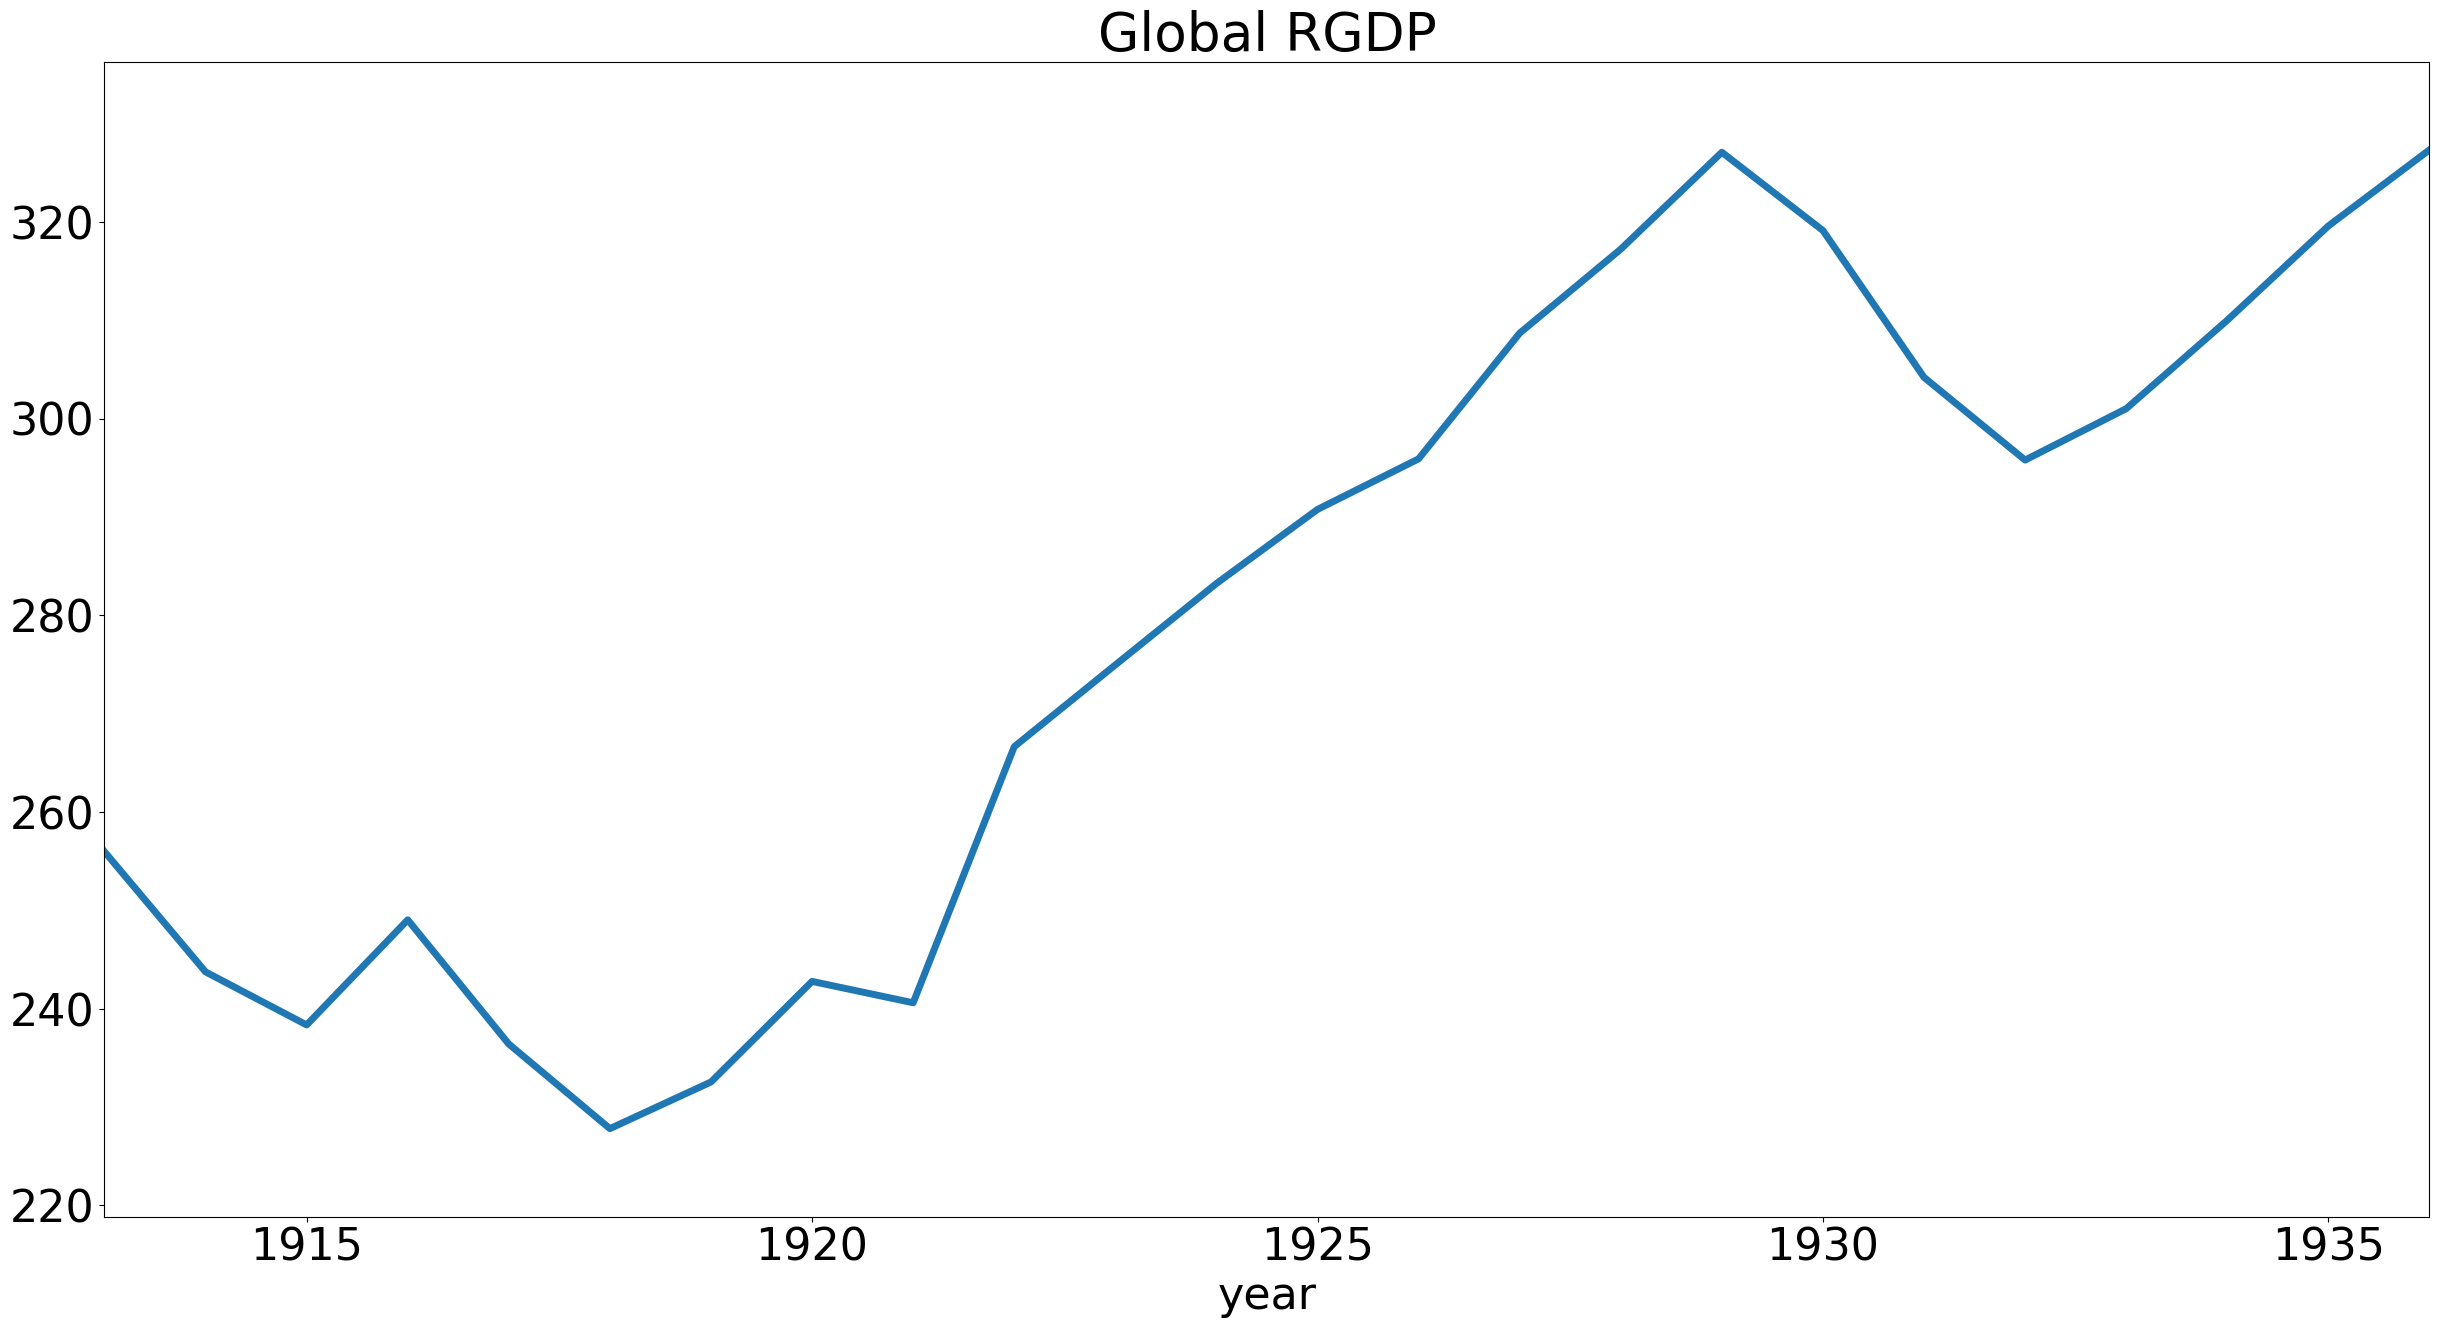

In [22]:
JST_data = pd.read_excel("https://www.macrohistory.net/app/download/9834512569/JSTdatasetR6.xlsx?t=1668516065", index_col = [0,2])
fig, ax = plt.subplots(figsize = (30, 15))
JST_data.groupby("year")[["rgdpbarro"]].sum().loc["1913":"1936"].plot.line(ax = ax, 
                                                                           linewidth = 5,
                                                                          legend = False)
ax.set_title("Global RGDP")

## 2008 Financial Crisis and Unconventional Monetary Policy

In [23]:
#fedProject.py
# . . .
def bil_to_mil(series):
    return series* 10**3
data_codes  = {"Base: Total": "BOGMBASE",
               "Base: Currency in Circulation": "WCURCIR",
               
               # Assets
               "Balance Sheet: Total Assets": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans": "WSRLL",
               "Balance Sheet: Securities Held Outright": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps" : "SWPT",
               "Balance Sheet: Direct Lending" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding" : "WLFN",
               "Balance Sheet: Reverse Repos": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves": "EXCSRESNW",
               "Balance Sheet: Required Reserves": "RESBALREQW",
               "Balance Sheet: Total Reserves": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account": "WDTGAL",
               "Balance Sheet: Other Deposits": "WOTHLB",
               "Balance Sheet: All Deposits": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash": "TLVAULTW",
               "Vault Cash Used as Req.": "VAULT",
               }
# Select start and end dates
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
data = gather_data(data_codes = data_codes, start = start, 
                   end = end, freq = "W")
data["Base: Total"] = data["Base: Total"].interpolate(method='polynomial', order=1)
data["Vault Cash"] = data["Vault Cash"].div(10**3)
data["Vault Cash Used as Req."] = data["Vault Cash Used as Req."].interpolate(method='polynomial', order=1)
data["Interest on Reserves"] = data["Interest on Excess Reserves"].fillna(0).add(data["Interest on Reserve Balances"].fillna(0))
bil_to_mil_list  = ["Balance Sheet: Total Reserves",
                    "Balance Sheet: Other Deposits",
                    "Base: Currency in Circulation"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])
data

Base: Total  Base: Currency in Circulation  \
DATE                                                     
2002-01-06     653800.0                       643044.0   
2002-01-13     654000.0                       638956.0   
2002-01-20     654200.0                       632719.0   
2002-01-27     654400.0                       632017.0   
2002-02-03     654600.0                       630409.0   
...                 ...                            ...   
2023-02-05    5321000.0                      2293818.0   
2023-02-12    5383500.0                      2297433.0   
2023-02-19    5446000.0                      2297960.0   
2023-02-26    5508500.0                      2300632.0   
2023-03-05    5571000.0                      2302133.0   

            Balance Sheet: Total Assets  \
DATE                                      
2002-01-06                          NaN   
2002-01-13                          NaN   
2002-01-20                          NaN   
2002-01-27                          NaN   
2002-02-03                          NaN   
...                                 ...   
2023-02-05                    8433610.0   
2023-02-12                    8435369.0   
2023-02-19                    8384767.0   
2023-02-26                    8382190.0   
2023-03-05                    8339684.0   

            Balance Sheet Securities, Prem-Disc, Repos, and Loans  \
DATE                                                                
2002-01-06                                                NaN       
2002-01-13                                                NaN       
2002-01-20                                                NaN       
2002-01-27                                                NaN       
2002-02-03                                                NaN       
...                                                       ...       
2023-02-05                                          8323340.0       
2023-02-12                                          8322036.0       
2023-02-19                                          8287702.0       
2023-02-26                                          8283049.0       
2023-03-05                                          8243254.0       

            Balance Sheet: Securities Held Outright  \
DATE                                                  
2002-01-06                                      NaN   
2002-01-13                                      NaN   
2002-01-20                                      NaN   
2002-01-27                                      NaN   
2002-02-03                                      NaN   
...                                             ...   
2023-02-05                                8024470.0   
2023-02-12                                8024104.0   
2023-02-19                                7990467.0   
2023-02-26                                7986887.0   
2023-03-05                                7948534.0   

            Balance Sheet: U.S. Treasuries Held Outright  \
DATE                                                       
2002-01-06                                           NaN   
2002-01-13                                           NaN   
2002-01-20                                           NaN   
2002-01-27                                           NaN   
2002-02-03                                           NaN   
...                                                  ...   
2023-02-05                                     5397388.0   
2023-02-12                                     5397022.0   
2023-02-19                                     5364607.0   
2023-02-26                                     5364291.0   
2023-03-05                                     5336147.0   

            Balance Sheet: Federal Agency Debt Securities  \
DATE                                                        
2002-01-06                                            NaN   
2002-01-13                                            NaN   
2002-01-20                                            NaN 

In [24]:
import yfinance as yf
yf.pdr_override()
start = datetime.datetime(2004, 1 , 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["^GSPC"]
for key in stocks:
    data_dict[key] = web.get_data_yahoo(key, start, end)
close_data = pd.concat([val["Close"] for val in data_dict.values()], 
                       keys = ["SP500"], 
                       axis = 1)


[*********************100%***********************]  1 of 1 completed


## Late 2007 and Early 2008: Hiccups in equities and the overnight lending market

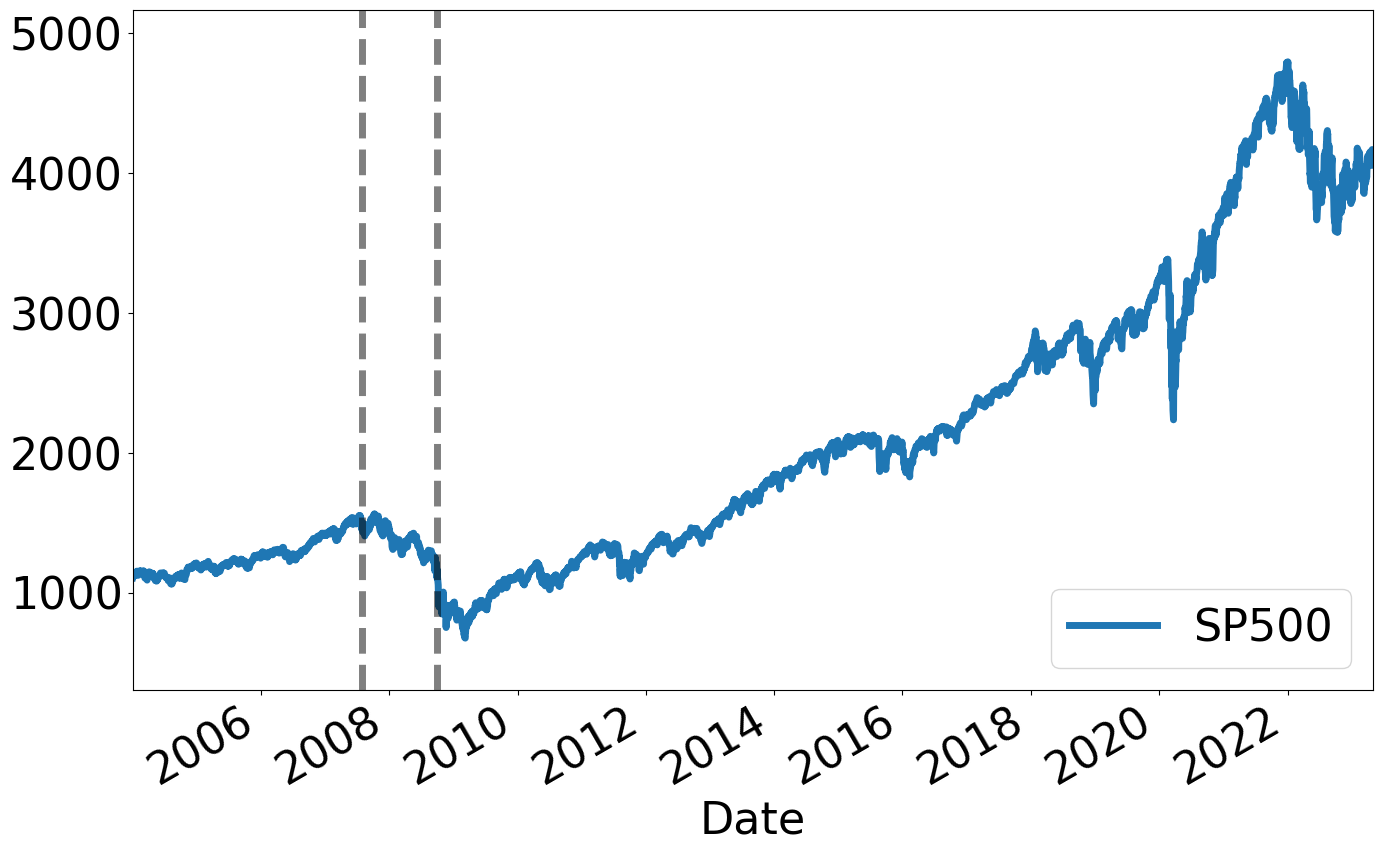

In [25]:
fig, ax = plt.subplots(figsize = (16,10))
close_data.plot(linewidth = 5, ax = ax)
ax.axvline("2007-08", ls = "--", color = "k", alpha = .5, linewidth = 5)
ax.axvline("2008-10", ls = "--", color = "k", alpha = .5, linewidth = 5)

Whenever the Federal Reserve acquires an asset, it must also acquire a liability. For much of the history of central banking, an increase in assets was enabled by the creation and distribution of base money. If the central bank provides a loan or purchases an existing debt instrument, new base money would enter circulation. Or, the money might support overnight, interbank lending, in which case, the ability of monetary expansion to postively affect the volume of circulating cash is, under normal circumatances, limited. 

Our breakdown of the Federal Reserve's balance sheet will navigate the distinction between 

1. the portion of the monetary base supporting lending within the economy
2. the portion of the monetary base deposited at the Federal Reserve
3. assets and liabilities that influence the level of overnight lending but are explicitly *not* counted as part of the monetary base.

The remaining portion of the liabilities represents less than 1 percent of the total value of its liabilities.

#### We will start with analysis of 3), as this is where much of the interesting transformation of monetary policy began in 2007.

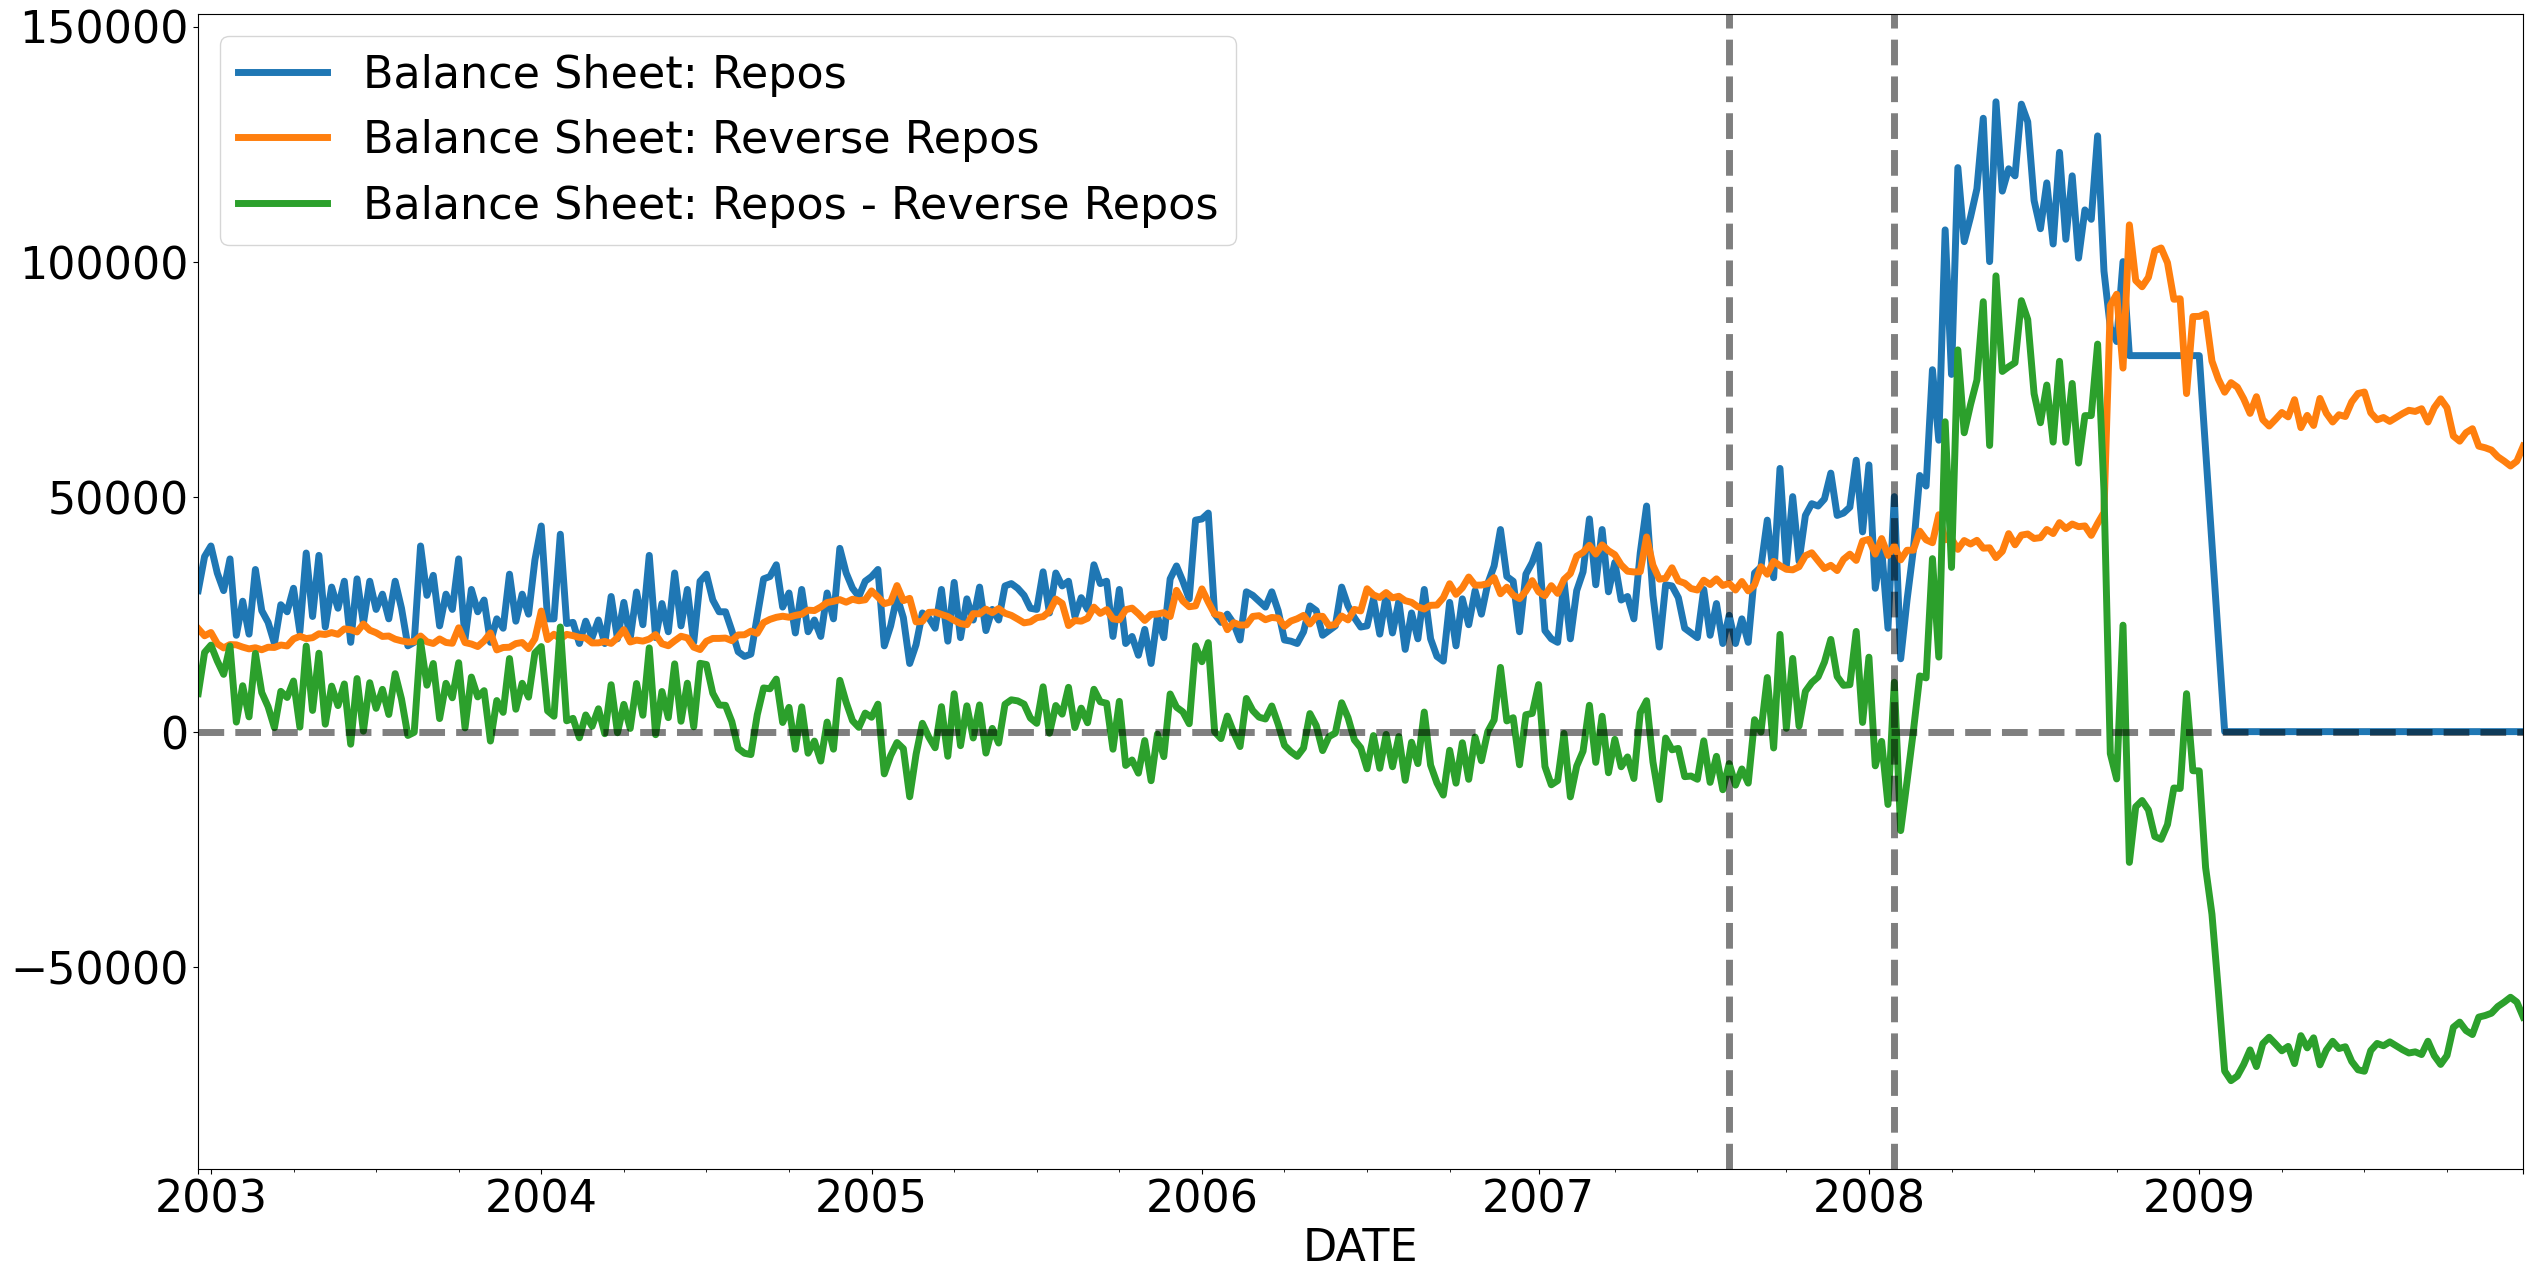

In [26]:

data["Balance Sheet: Repos - Reverse Repos"] =\
    data["Balance Sheet: Repos"].sub(data["Balance Sheet: Reverse Repos"])
overnight_vars = ["Balance Sheet: Repos",
                  "Balance Sheet: Reverse Repos",
                  "Balance Sheet: Repos - Reverse Repos"]
fig, ax = plt.subplots(figsize = (30,15))
data[overnight_vars].loc[:"2009"].dropna().plot.line(linewidth = 5, ax = ax)
ax.axhline(0, ls = "--", color = "k", alpha = .5, linewidth = 5)
ax.axvline("2007-08", ls = "--", color = "k", alpha = .5, linewidth = 5)

ax.axvline("2008-02", ls = "--", color = "k", alpha = .5, linewidth = 5)


### Fed becomes net borrower in interbank lending market

<AxesSubplot:xlabel='DATE'>

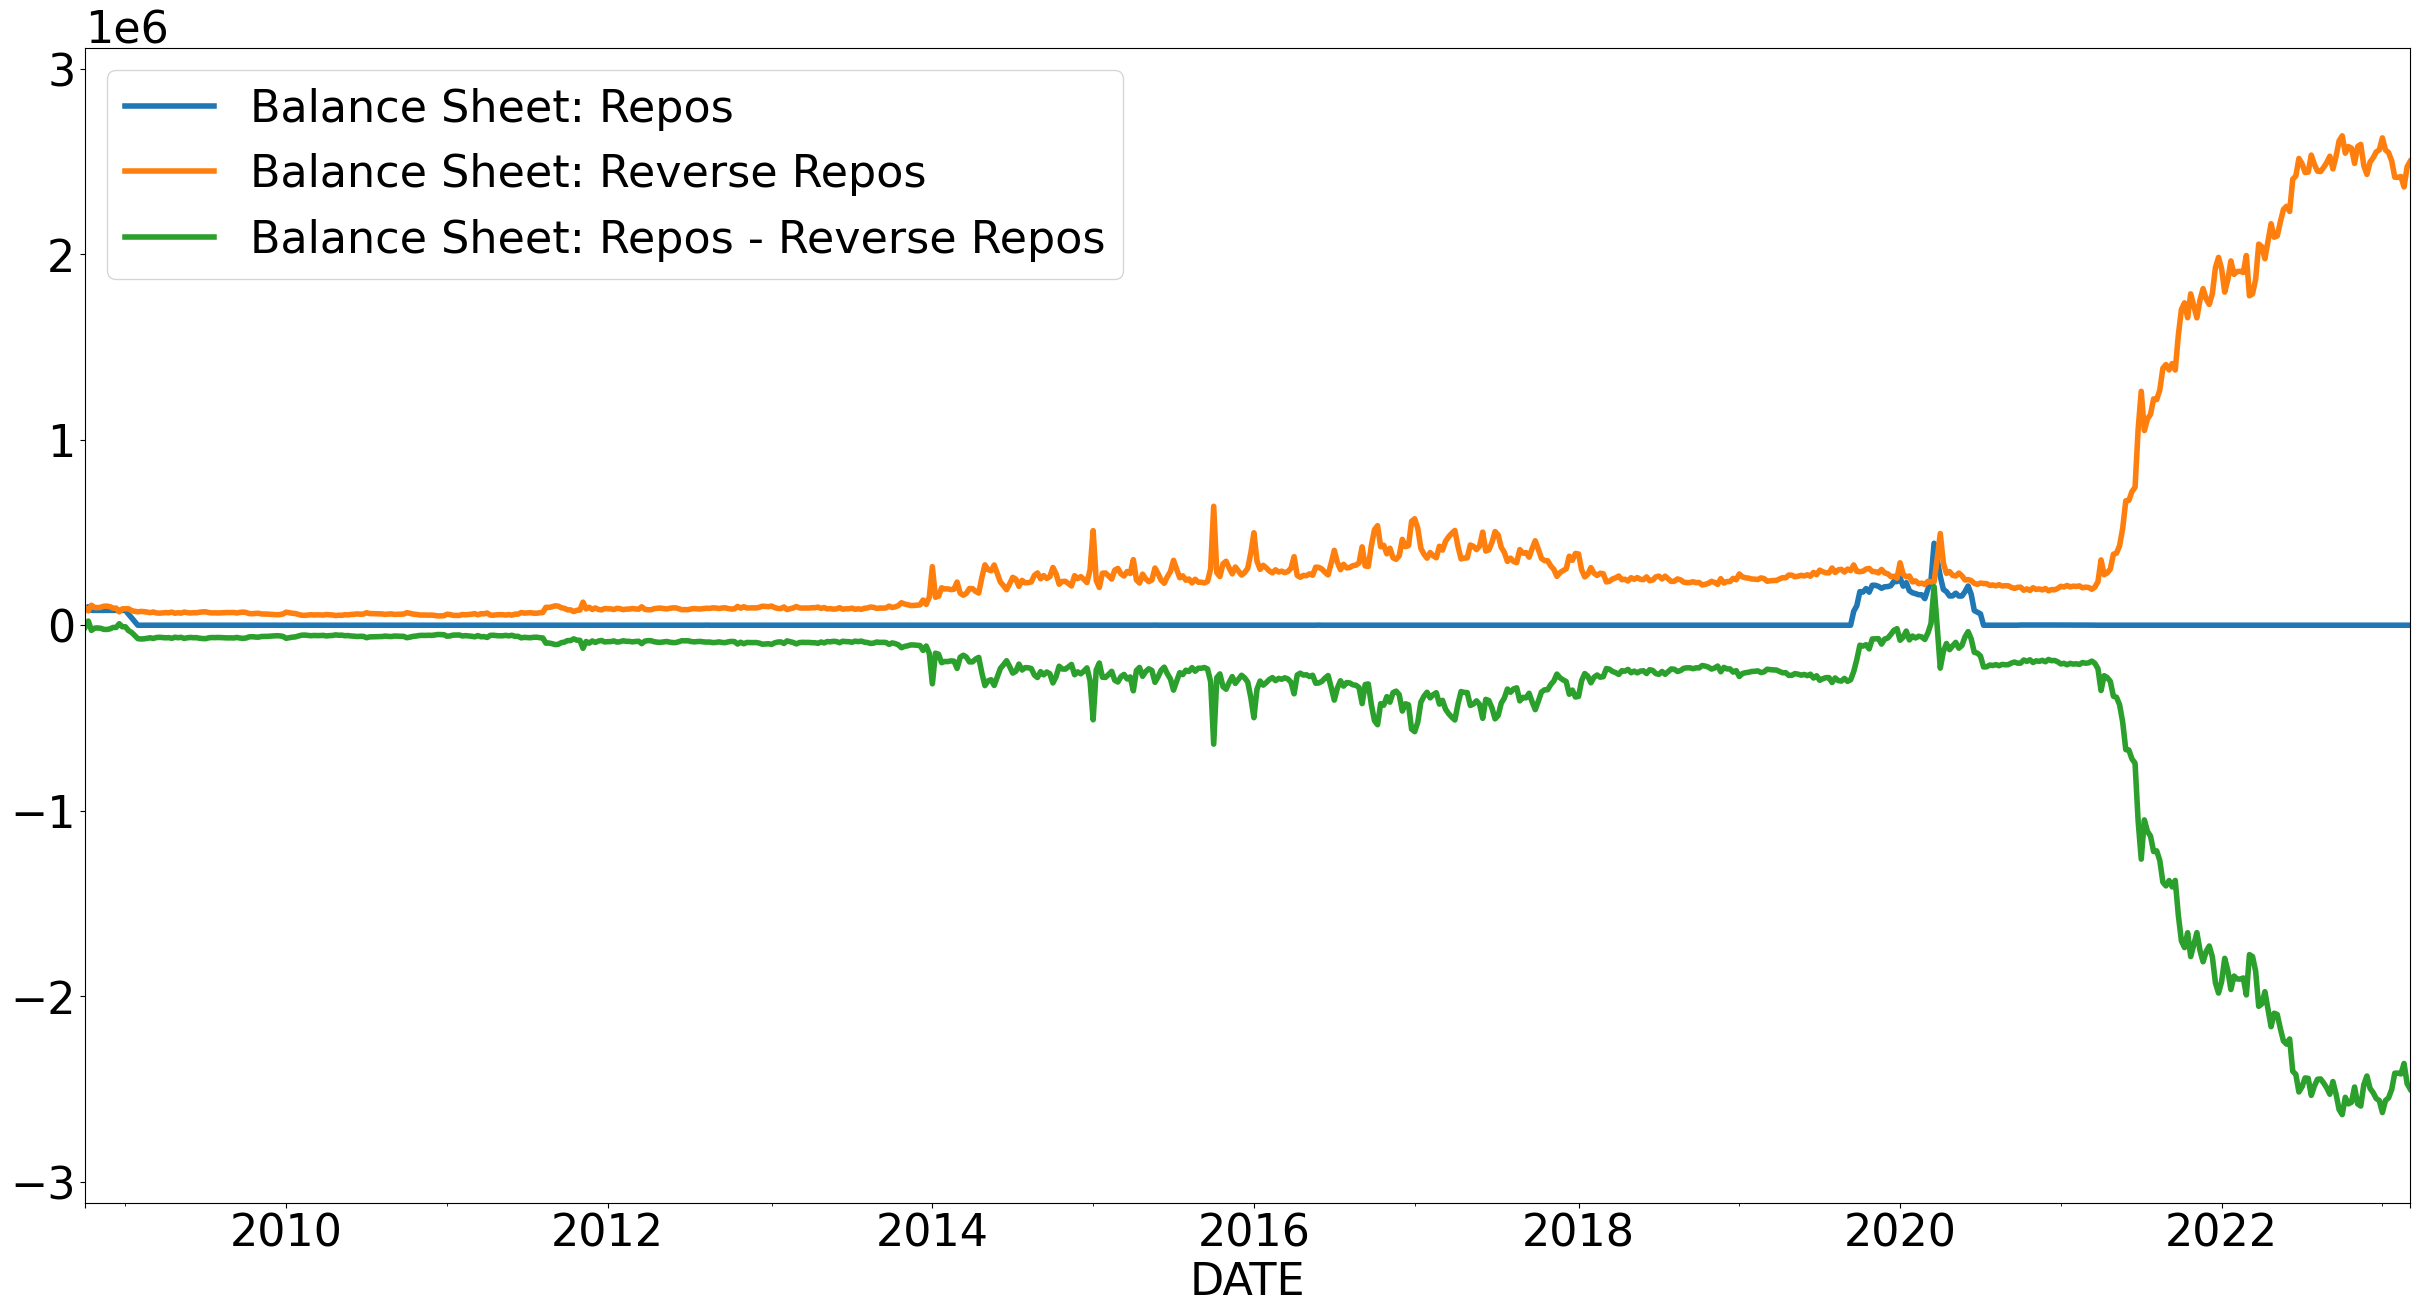

In [27]:
fig, ax = plt.subplots(figsize = (30,15))
data[overnight_vars].loc["2008-10":].plot.line(linewidth = 4, 
                                               ax = ax)

<AxesSubplot:xlabel='DATE'>

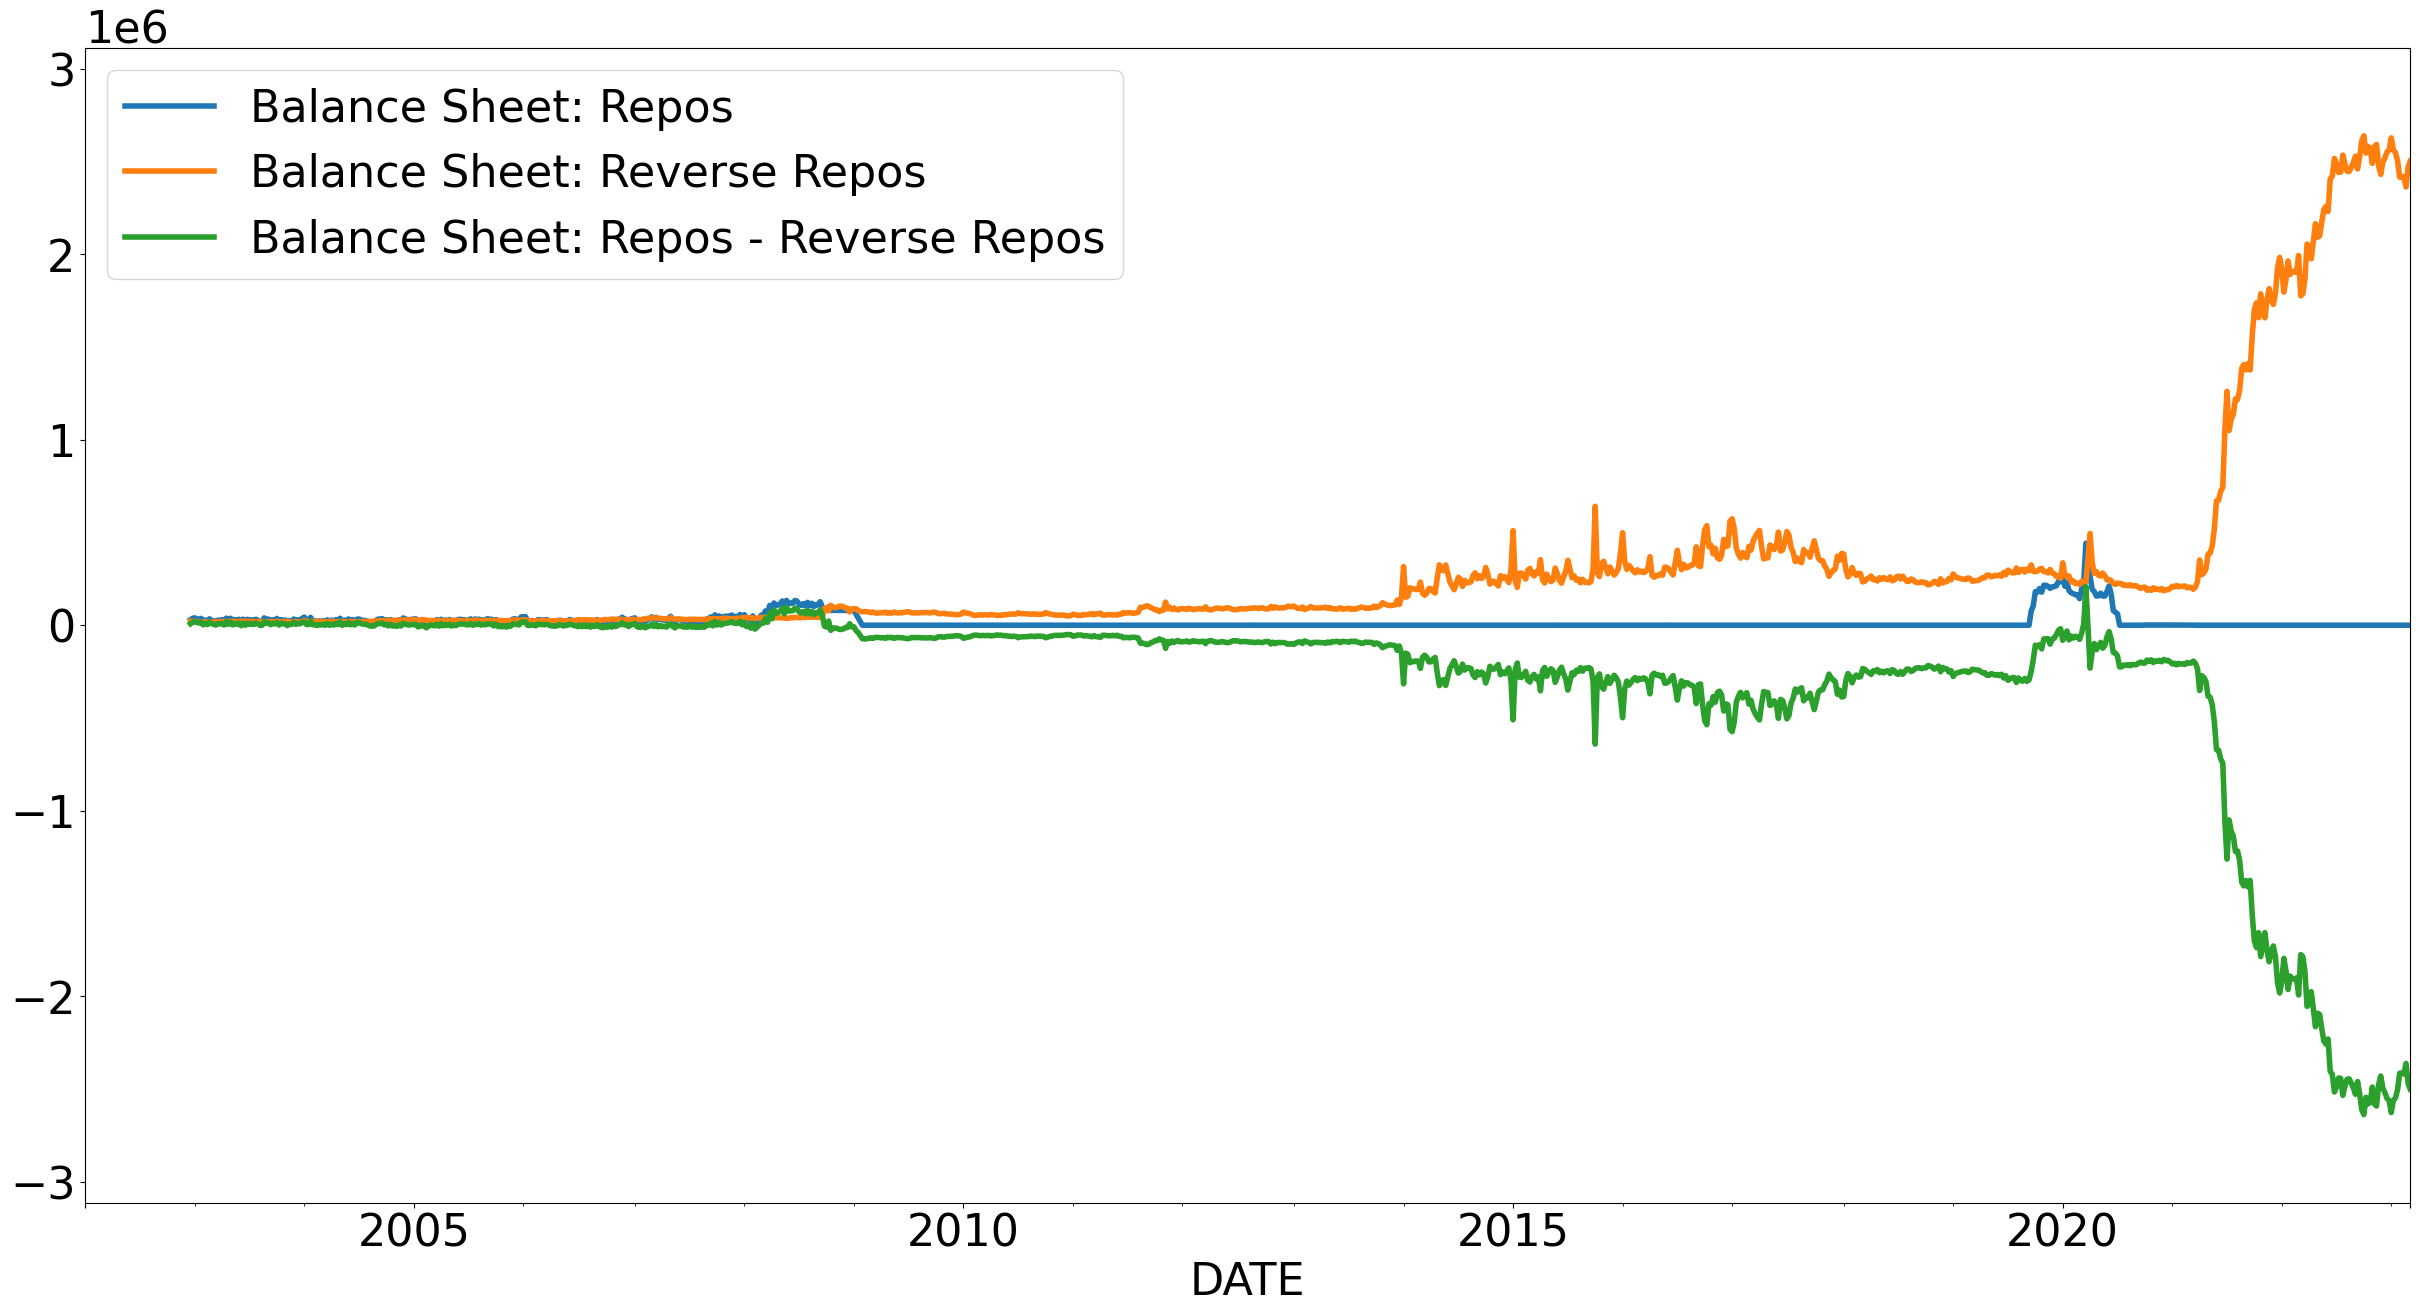

In [28]:
fig, ax = plt.subplots(figsize = (30,15))
data[overnight_vars].plot.line(linewidth = 4, 
                                               ax = ax)

### Excess Reserve and Near Zero Interest Rates

#### Within liberal bounds, FFR is more *set* than *targeted*

C:\Users\JLCat\AppData\Local\Temp\ipykernel_24420\3058134291.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()])


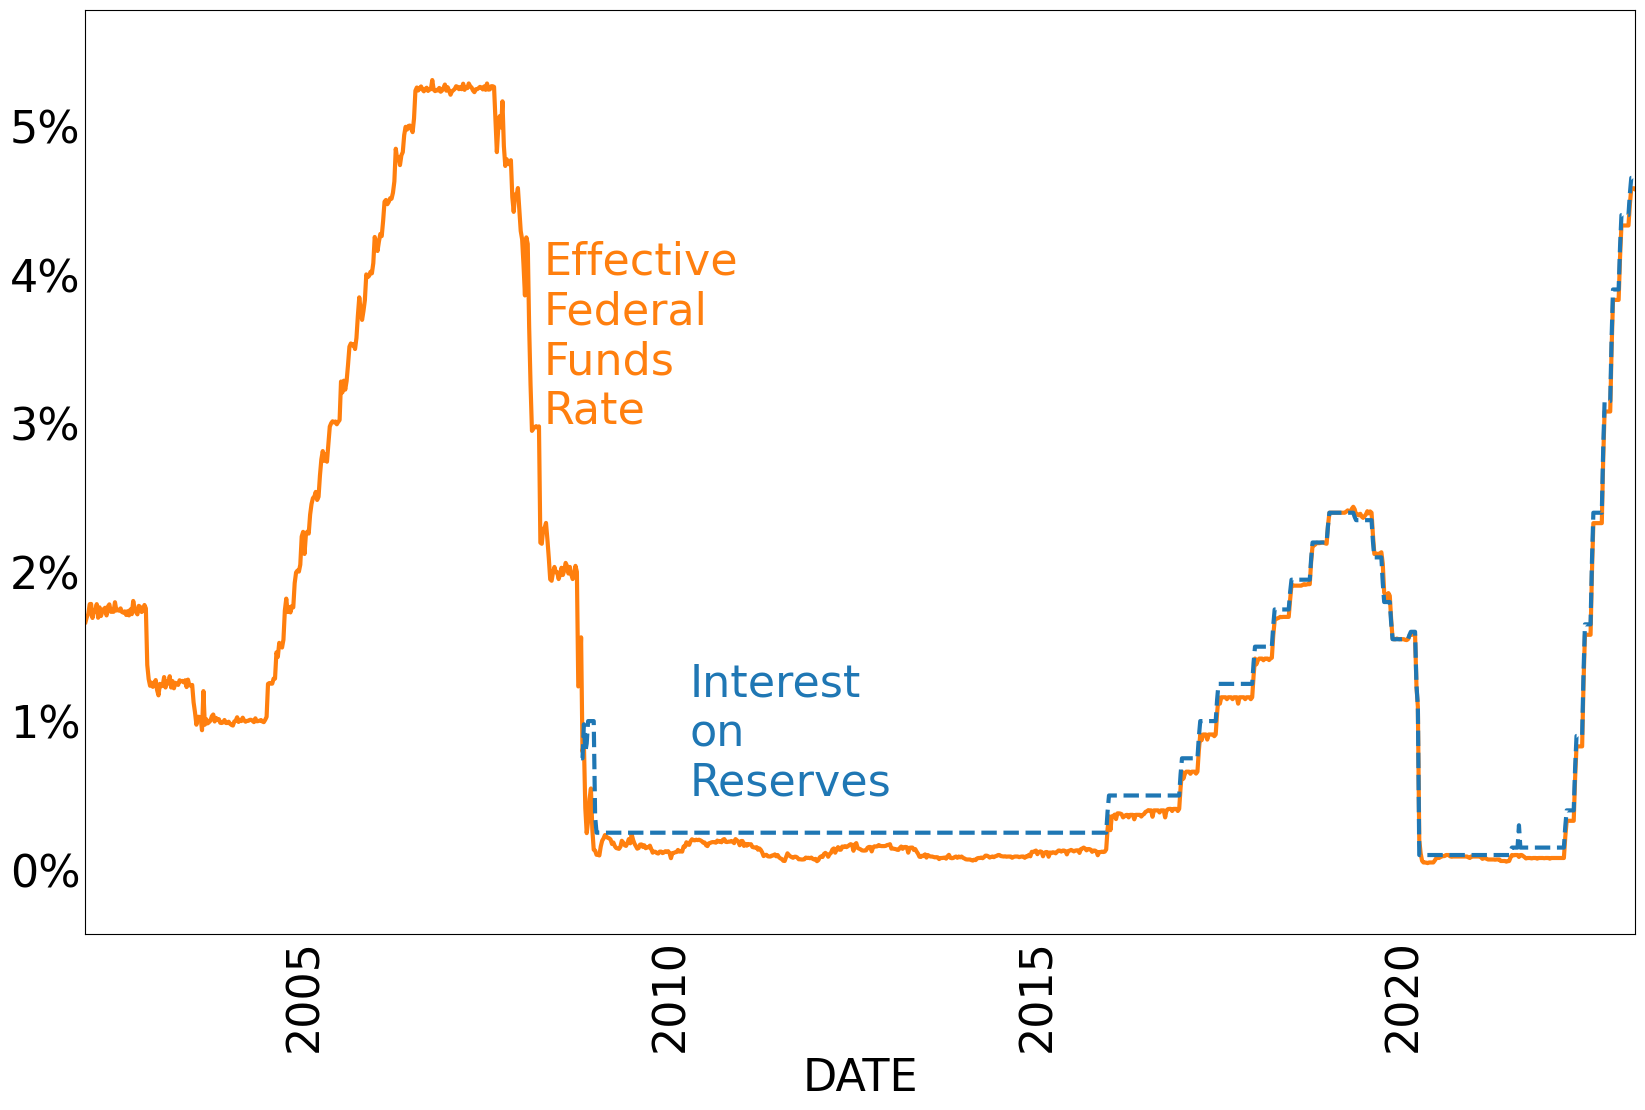

In [29]:
interest_vars = ["Effective Federal Funds Rate",
                  "Interest on Reserves"]
# plot_lines(data[interest_vars], linewidth = 3)        
fig, ax = plt.subplots(figsize = (20,12))
data[[interest_vars[0]]].plot(ax= ax, legend = False, linewidth = 3, color = "C1")
data[[interest_vars[1]]].loc["2008-10-08":].plot(ax= ax, 
                                                 legend = False, 
                                                 ls = "--", linewidth = 3, color = "C0")
ax.text("2008-04", 3, interest_vars[0].replace(" ","\n"), color = "C1")
ax.text("2010-04", .5, interest_vars[1].replace(" ","\n"), color = "C0")

ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()])
plt.xticks(rotation = 90)
ax.tick_params('both', length=0, which='both')

plt.show()

In [30]:
#plots.py
# . . .
plt.rcParams['axes.ymargin'] = 0.01
plt.rcParams['axes.xmargin'] = 0.00

def plot_stacked_lines(df, 
                       plot_vars, 
                       linewidth = 1, 
                       figsize = (40,20), 
                       pp = None, 
                       total_var = False):
    fig, ax = plt.subplots(figsize = figsize)
    df[plot_vars].plot.area(stacked = True, 
                            linewidth = linewidth,
                            ax = ax)
    # change y vals from mil to tril
    
    if total_var != False:
        df[total_var].plot.line(
            linewidth = linewidth, 
            ax = ax, 
            c = "k",
            label = total_var, 
            ls = "--")
    ax.legend(loc=2, ncol = 2)

#### Segmenting the Monetary Base: Currency in Circulation and Excess Reserves

Text(0, 0.5, '\\$ Trillion')

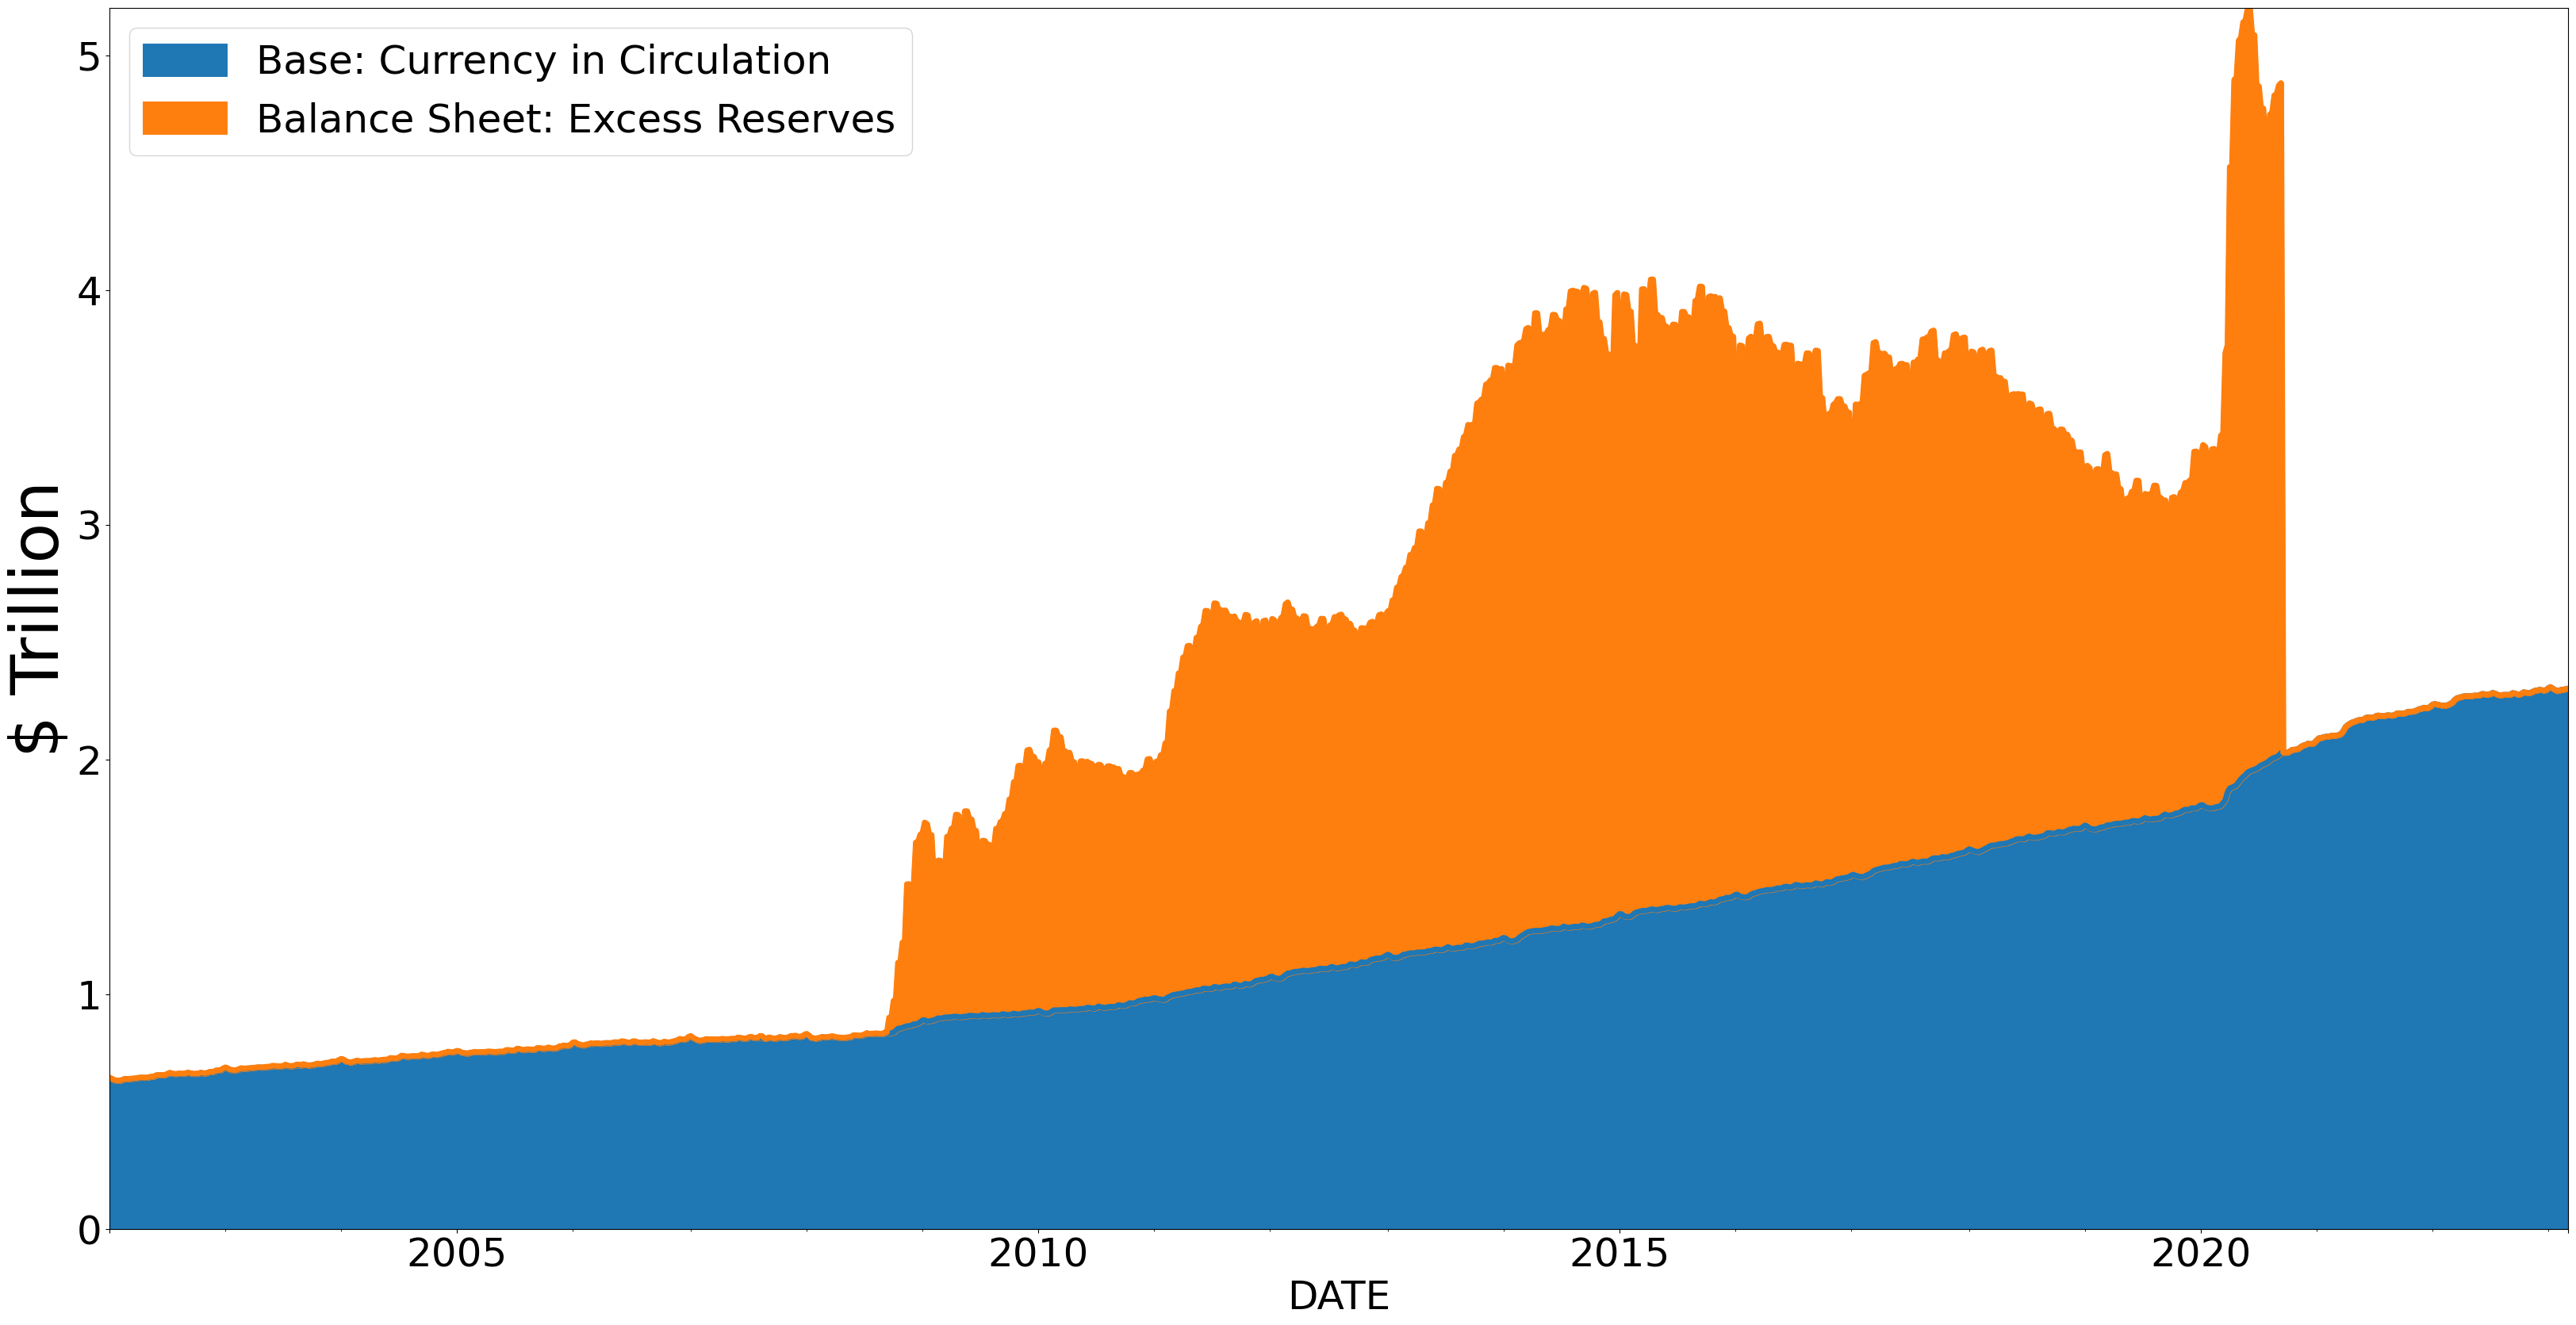

In [31]:
plt.rcParams.update({"font.size":36})
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0.01

reserve_vars = ["Base: Currency in Circulation",
             "Balance Sheet: Excess Reserves",
             "Balance Sheet: Required Reserves"]
plot_data = data[reserve_vars].div(10**6)
fig, ax = plt.subplots(figsize = (40,20))
plot_data[reserve_vars[:-1]].plot.area(stacked = True, 
                        linewidth = 5,
                        ax = ax)

ax.set_ylabel("\$ Trillion", fontsize = 60)


Text(0, 0.5, '\\$ Trillion')

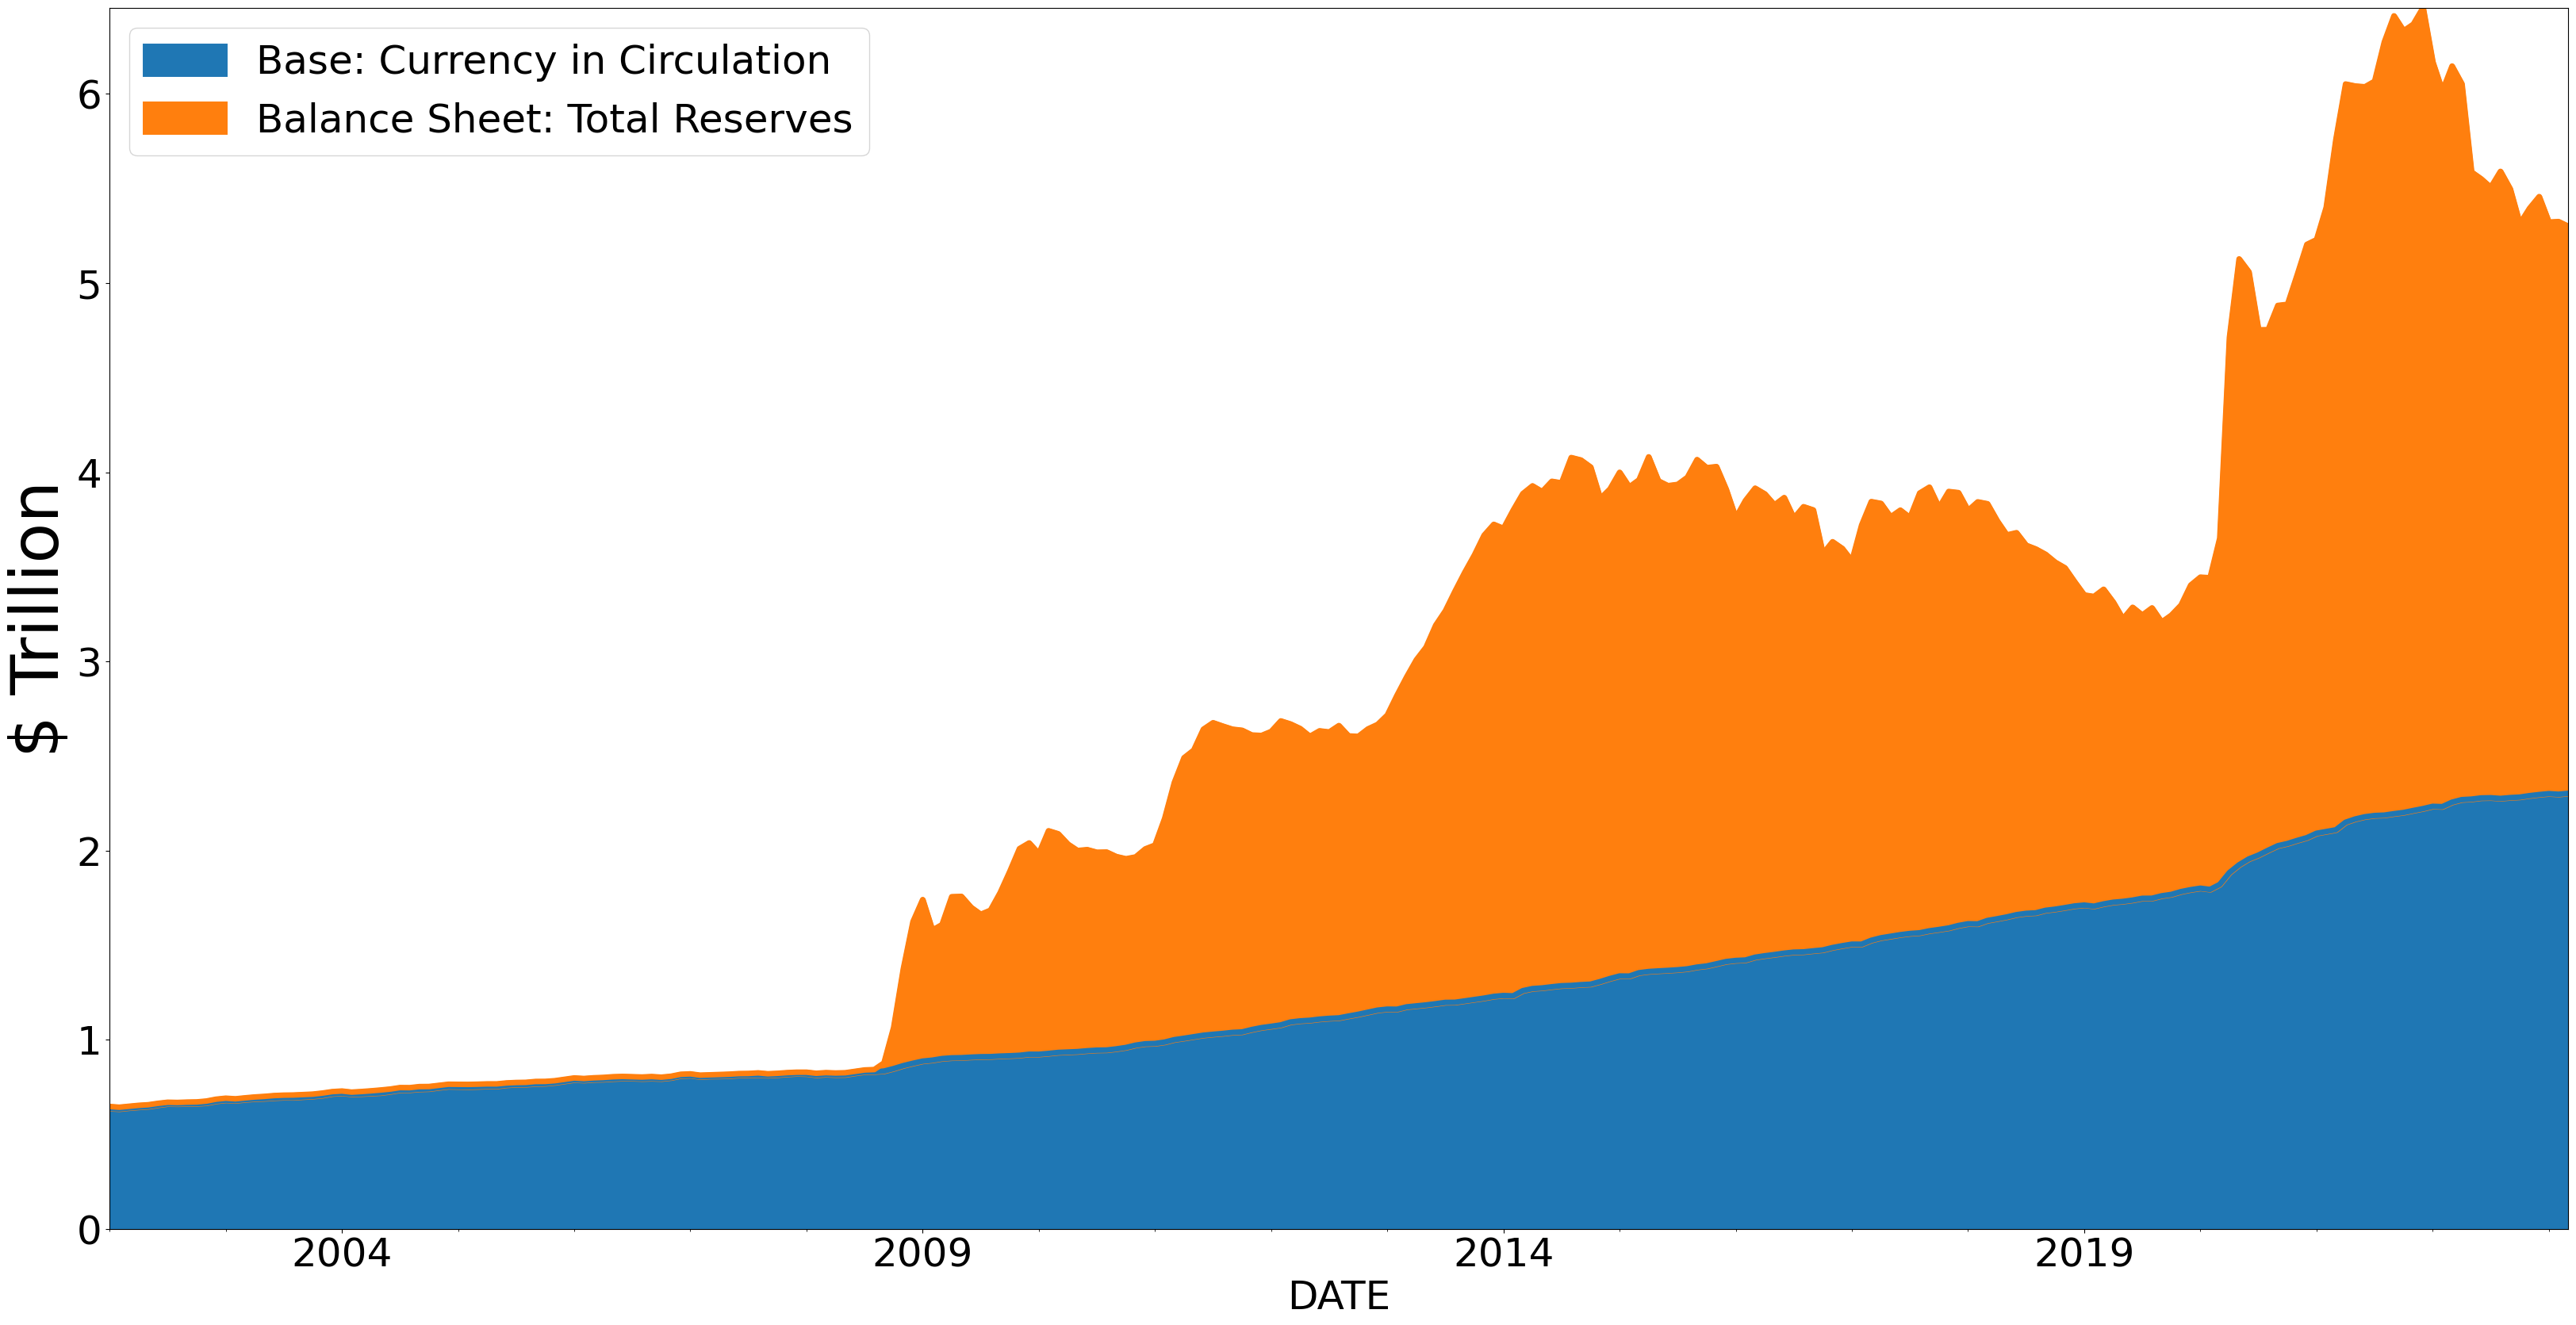

In [32]:
reserve_vars = ["Base: Currency in Circulation",
                "Balance Sheet: Total Reserves"]
fig, ax = plt.subplots(figsize = (40,20))
plot_data = data[reserve_vars].div(10**6).resample("M").mean()
plot_data[reserve_vars].plot.area(stacked = True, 
                        linewidth = 5,
                        ax = ax)

ax.set_ylabel("\$ Trillion", fontsize = 60)

#### Aside on Vault Cash:
For a treatment of vault cash see discussion by [Henderson and Hummel](https://www.econlib.org/jeff-hummel-on-the-feds-treatment-of-vault-cash/). The currency in circulation measures from Table 2 and Table 3 are part of the [H.6 Release](https://www.federalreserve.gov/releases/h6/current/)

In [33]:
data["Vault Cash Used as Excess"] = data["Vault Cash"].sub(data["Vault Cash Used as Req."])

### Instability in the Total Base - Total Reserves appears to Reflect Volatility from Changing Levels of Reverse Repurchase Agreements

Text(0, 0.5, '\\$ Trillion')

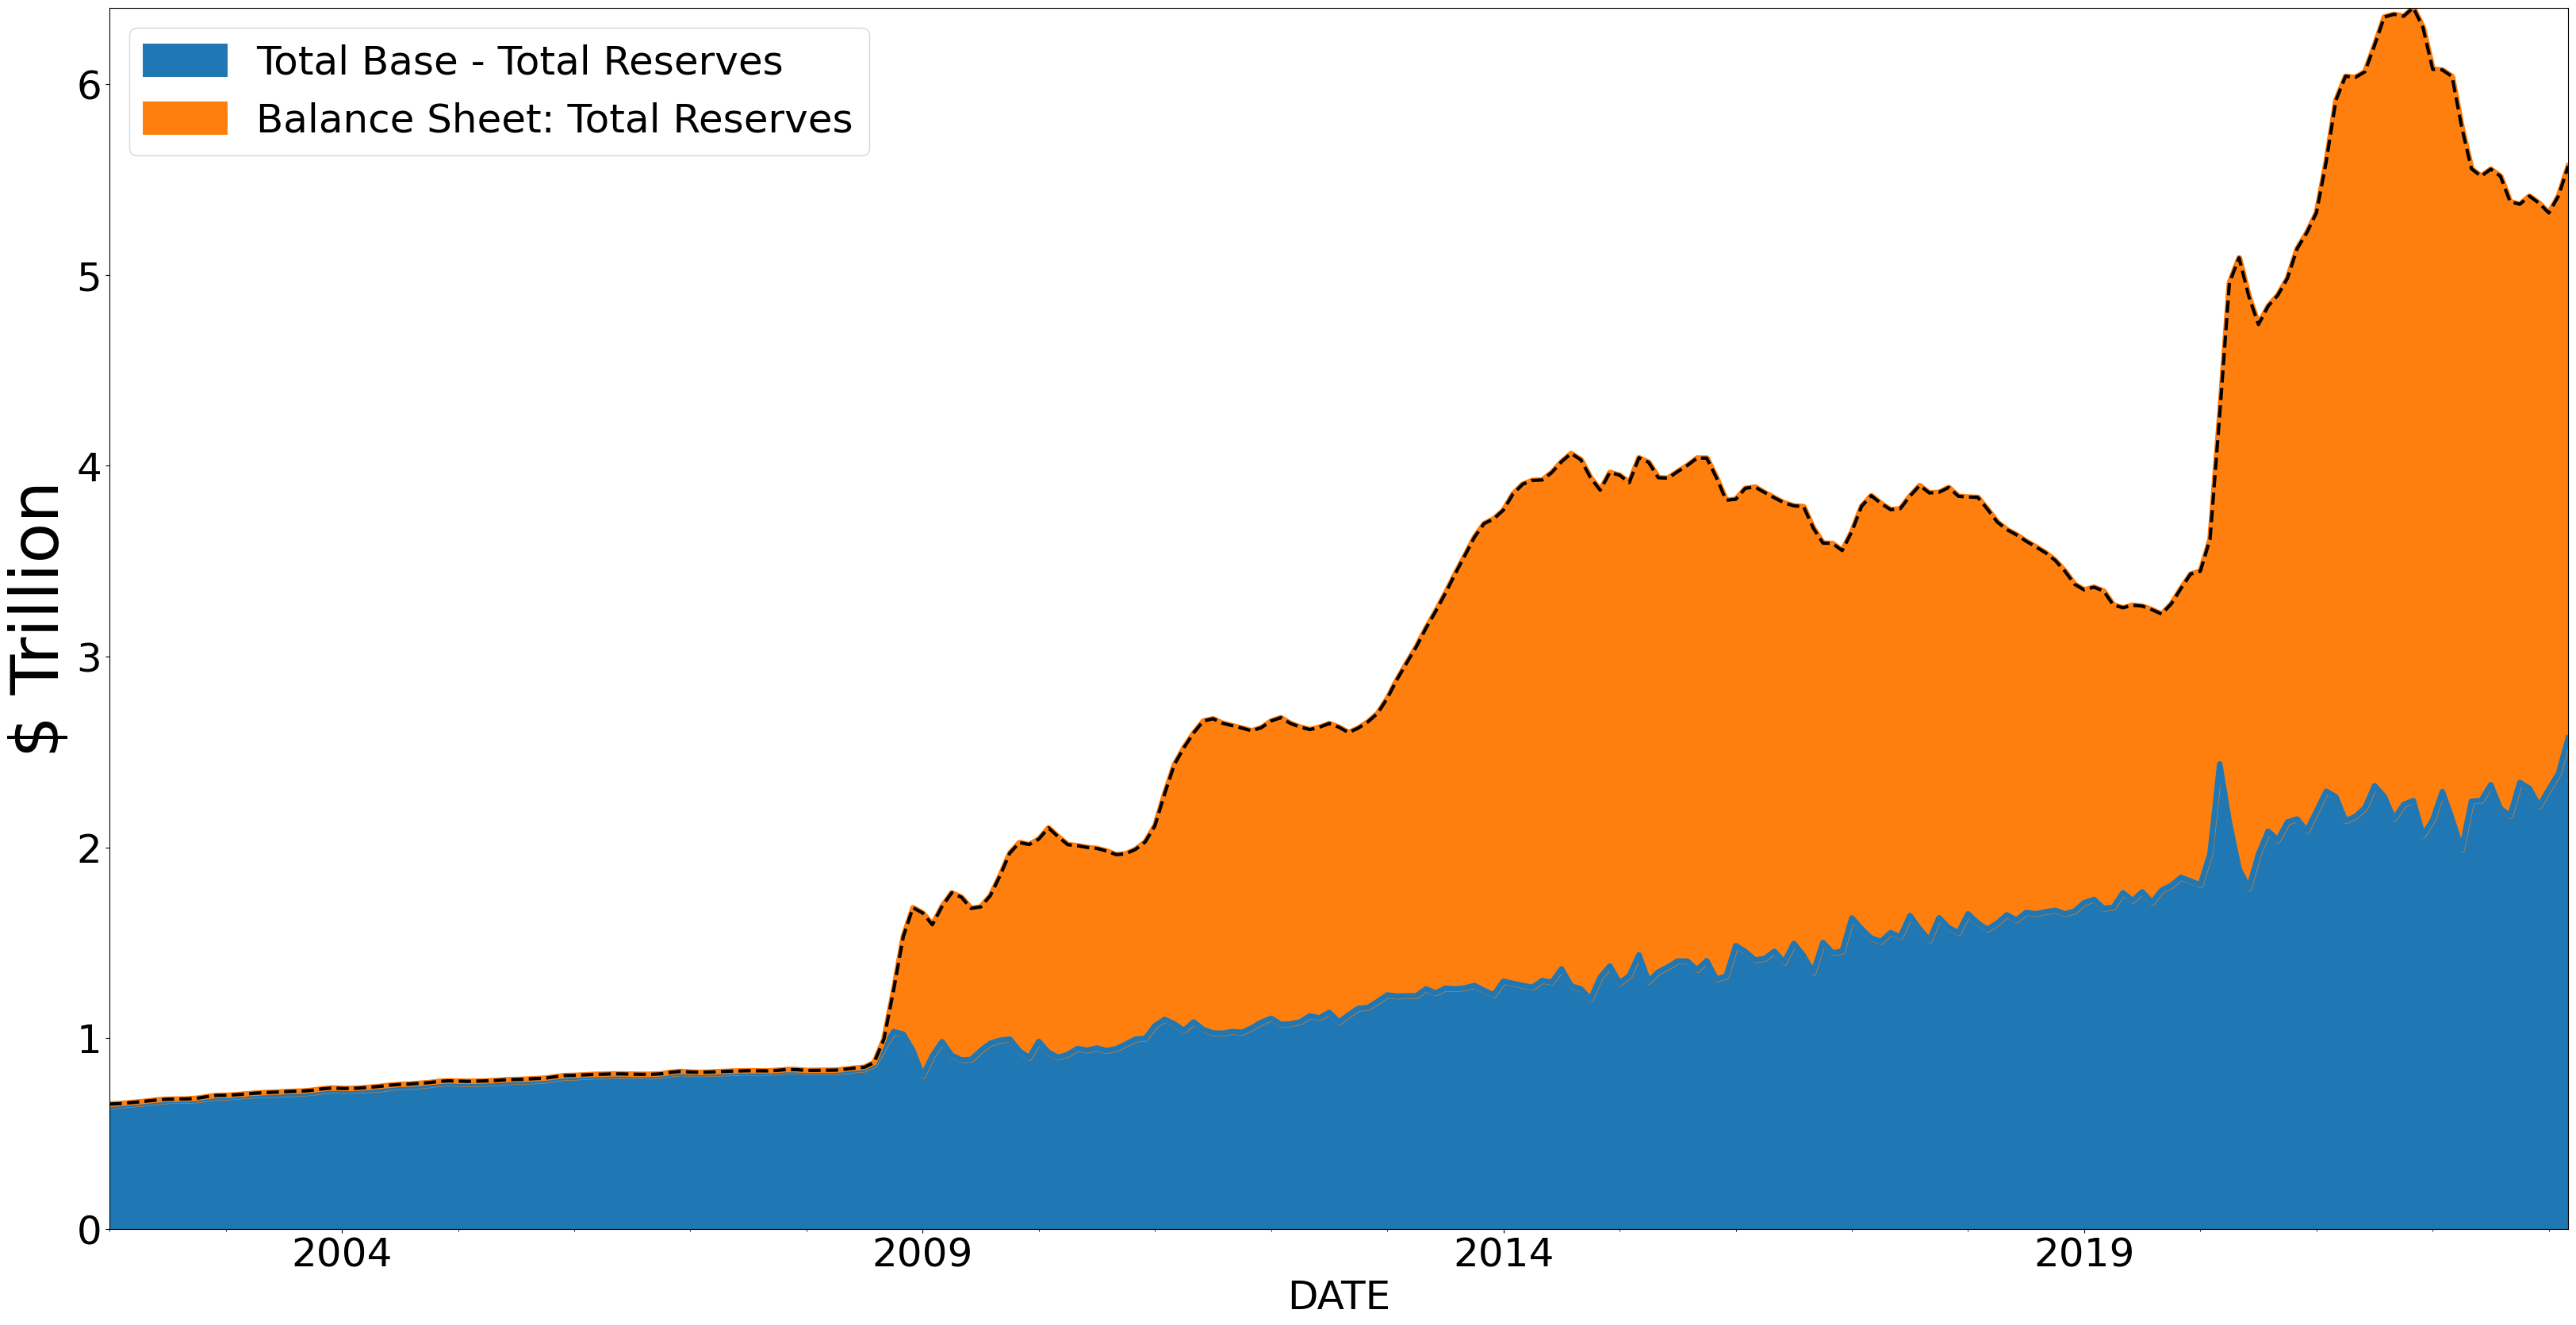

In [34]:
plot_data = data.copy().resample("M").mean()
plot_data["Total Base - Total Reserves"] = plot_data["Base: Total"].sub(plot_data["Balance Sheet: Total Reserves"])
reserve_vars = ["Total Base - Total Reserves",
                "Balance Sheet: Total Reserves",
               "Base: Total"]
fig, ax = plt.subplots(figsize = (40,20))
plot_data = plot_data[reserve_vars].div(10**6)
plot_data[reserve_vars[:-1]].plot.area(stacked = True, 
                        linewidth = 5,
                        ax = ax)
plot_data[reserve_vars[-1]].plot.line(linewidth = 3, color = "k", ls = "--", ax = ax)
ax.set_ylabel("\$ Trillion", fontsize = 60)

As you can see, vault cash was the primary means of holding reserves *before* 2008. After the 2008 Crisis, nearly all reserves have been held on account.

There is a lot going on beneath the surface of these measures. To get a better idea of how monetary policy works, let's work through the major components of the Federal Reserve's balance sheet. We will return to the topic of reserves when discussing liabilities of the Federal Reserve.
## Assets Held by the Federal Reserve

Like any bank, the Federal Reserve not only takes deposits. It invests in interest bearing assets. For most of the Fed's history, these investments were predominantly, if not wholly, comprised of **U.S. Treasuries** - i.e., loans to the federal government. The Federal Reserve greatly expanded operations after 2008. It began investing in **mortgage backed securities** and **lending to private banks**, holding **debt from federal agencies** as well as to central banks in other countries with **central bank liquidity swaps**. All of these can be thought of as influencing the total stock of base money. In addition to these, the Federal Reserve also lends in the overnight lending market using repurchase agreements (repos). We will explain this last category later in the lesson.

Let's observe the change in the structure of security holdings from the Federal Reserve.

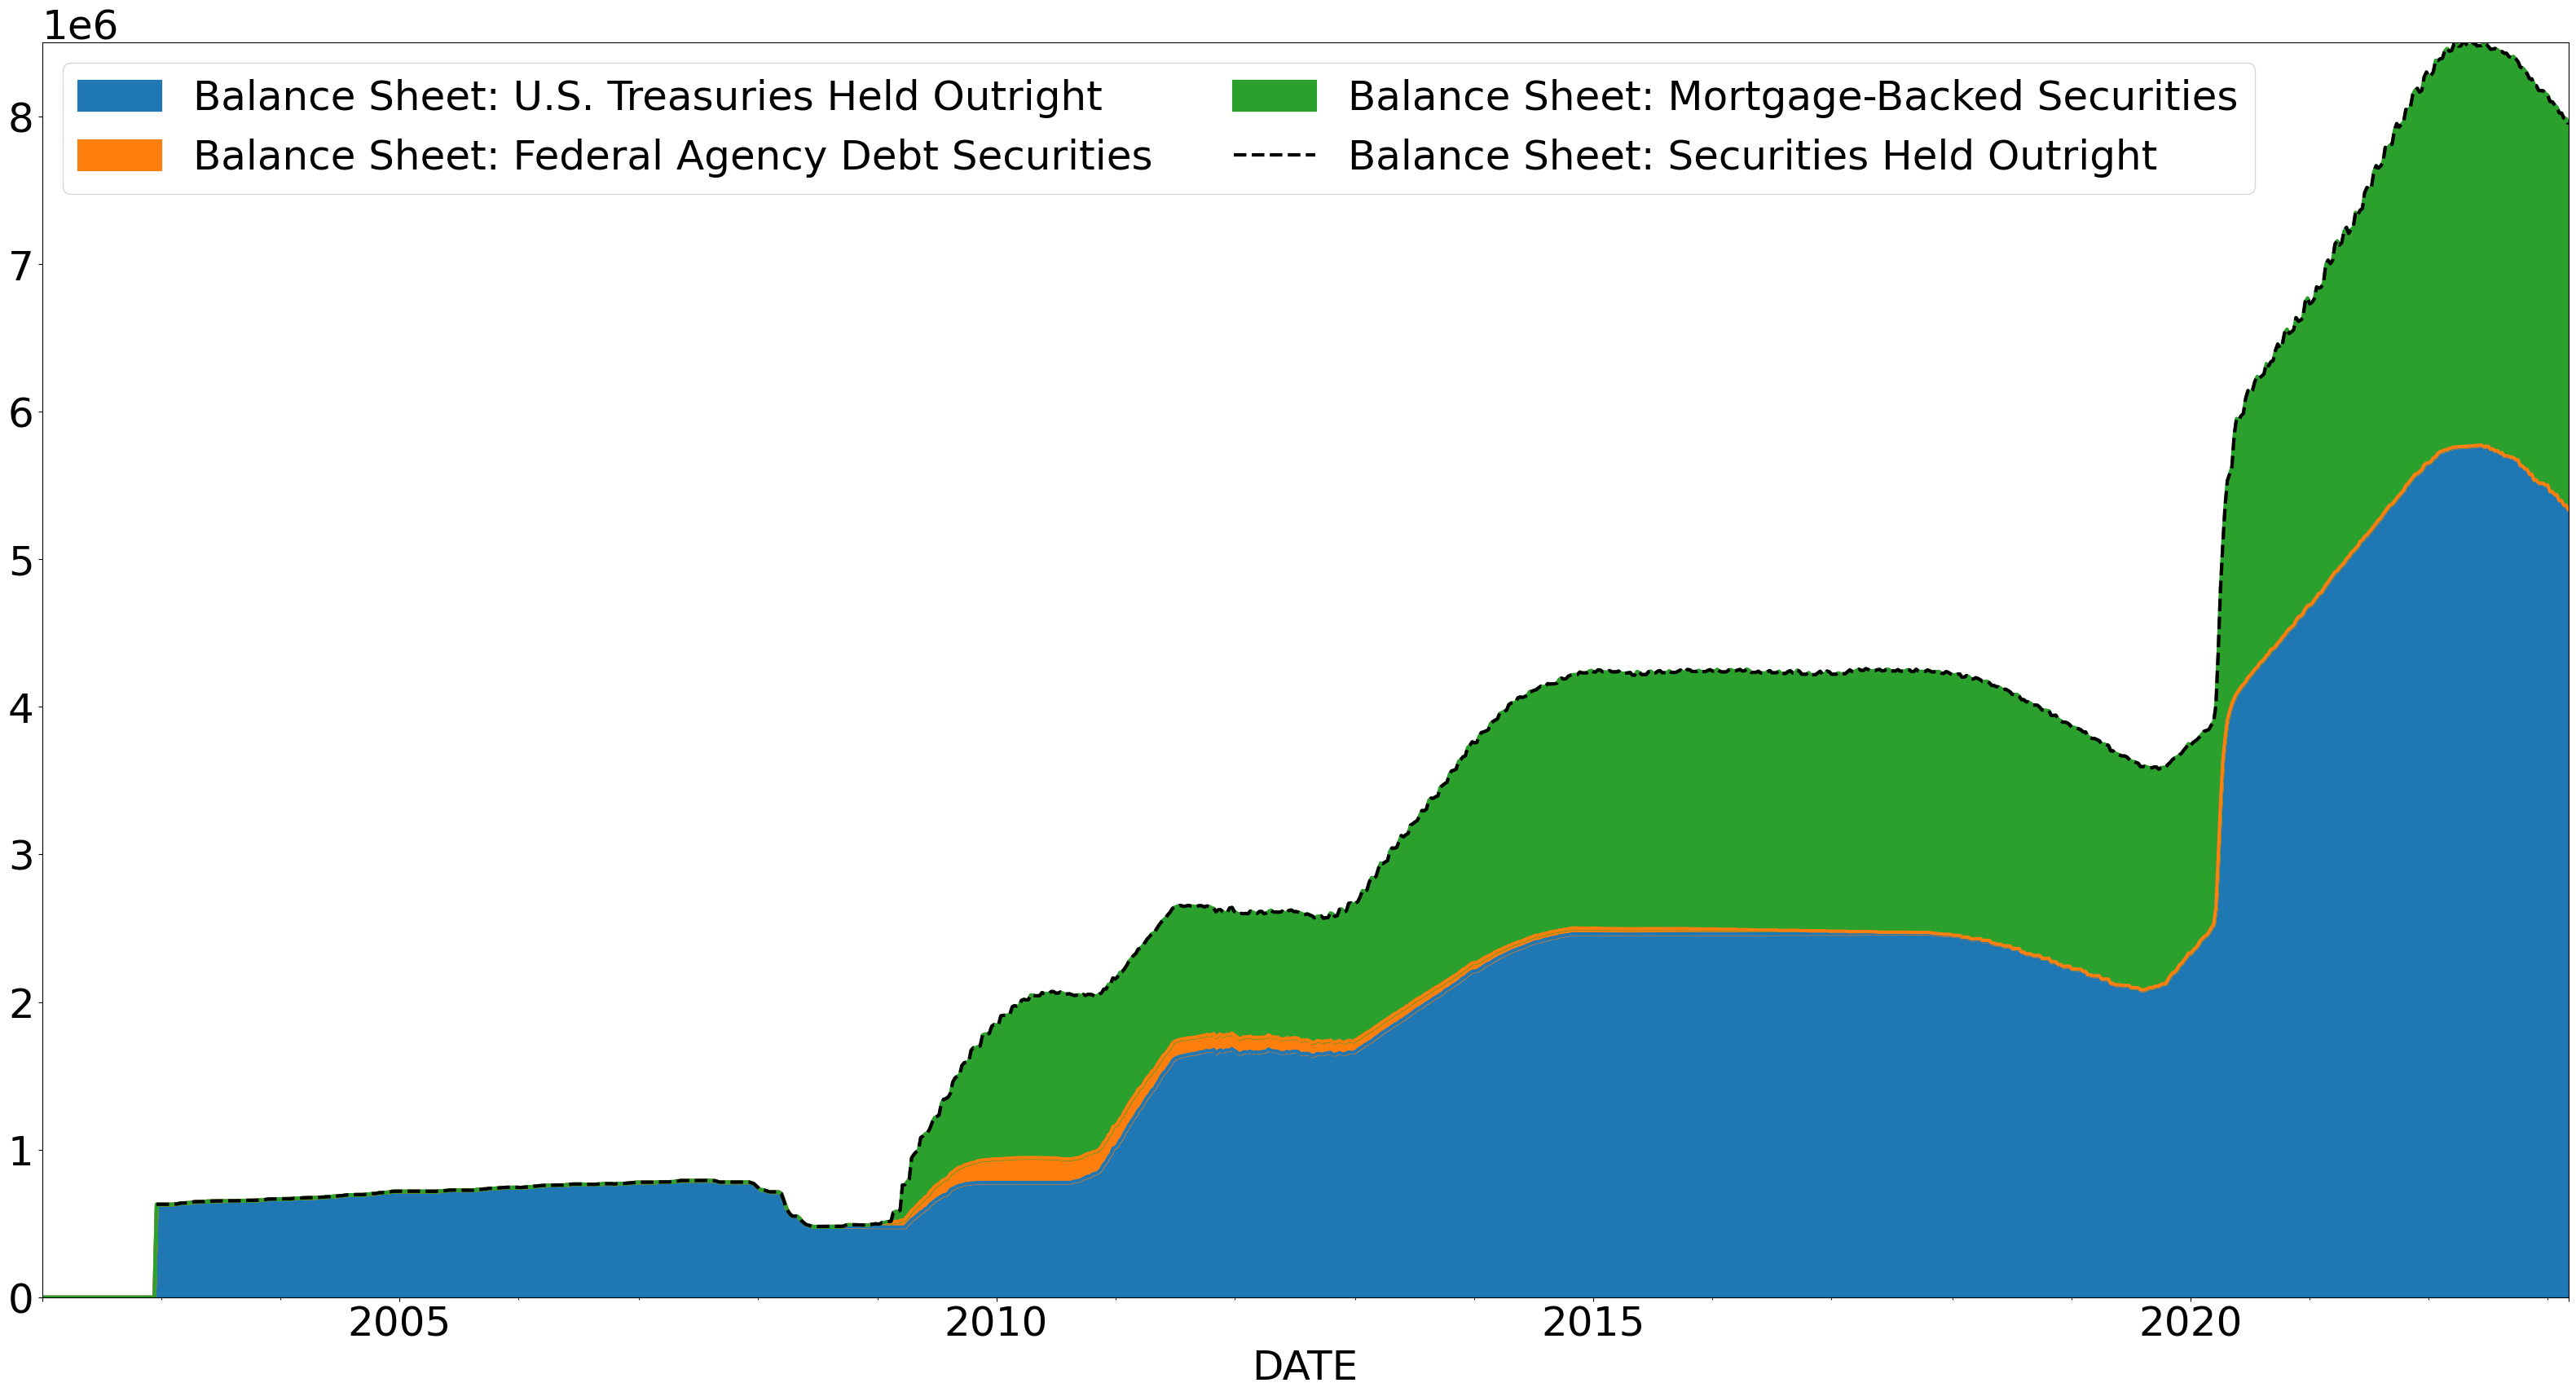

In [35]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: U.S. Treasuries Held Outright",
               "Balance Sheet: Federal Agency Debt Securities",
               "Balance Sheet: Mortgage-Backed Securities"]

# these three subcomponents comprise the value of securities held outright in its entirety. To more distinctly show
# the total value of securities held by the Fed, increase linewidth.
plot_stacked_lines(data, account_vars, linewidth = 3, 
                   total_var = "Balance Sheet: Securities Held Outright")

The mix of assets held by the Federal Reserve indicates the particular markets that it supports relative to those markets that do not receive direct support. From the data, it is clear that the Federal Reserve provides significant support for 1) federal borrowing and 2) mortgage markets, or in other words, real estate. Interest rates in both markets have remained relatively low throughout the period that they have received support. 

Central banks have traditionally supported government spending, so 1) should be no  surprise. There is a strong correlation between the size of a central banks balance sheet and the value of government debt that it owns. Much of the expansion that occurred after 2008, even if it did not support federal borrowing, ultimately ended up serving this purpose.

One obvious result of 1) is that the federal government has increased it's level of borrowing as a proportion of nominal income. The level of present taxation as a percent of GDP has fallen. As rates on federal debt have falllen, the cost of federal borrowing has fallen. This data is not included in the current exercise since [nominal income](https://fred.stlouisfed.org/series/GDP) and the [level of federal debt](https://fred.stlouisfed.org/series/GFDEBTN) are only recorded quarterly. 

<img src="https://github.com/jlcatonjr/Learn-Python-for-Stats-and-Econ/blob/master/In%20Class%20Projects/Federal%20Taxes%20and%20Debt%20to%20GDP.png?raw=true" alt="" title="" />
<h3><center></center></h3>


Since we already know the composition of securities held outright by the Fed, it will be convenient to reference this aggregate value when representing the rest of the asset side of the Fed's balance sheet. We add other forms of lending. The Fed lends to other central banks using liquidity swaps. Or it may lend directly to private financial instiutitons. Lastly, it may provide loans as repurchase agreements (repos) with borrowers in the interbank, overnight lending  market.

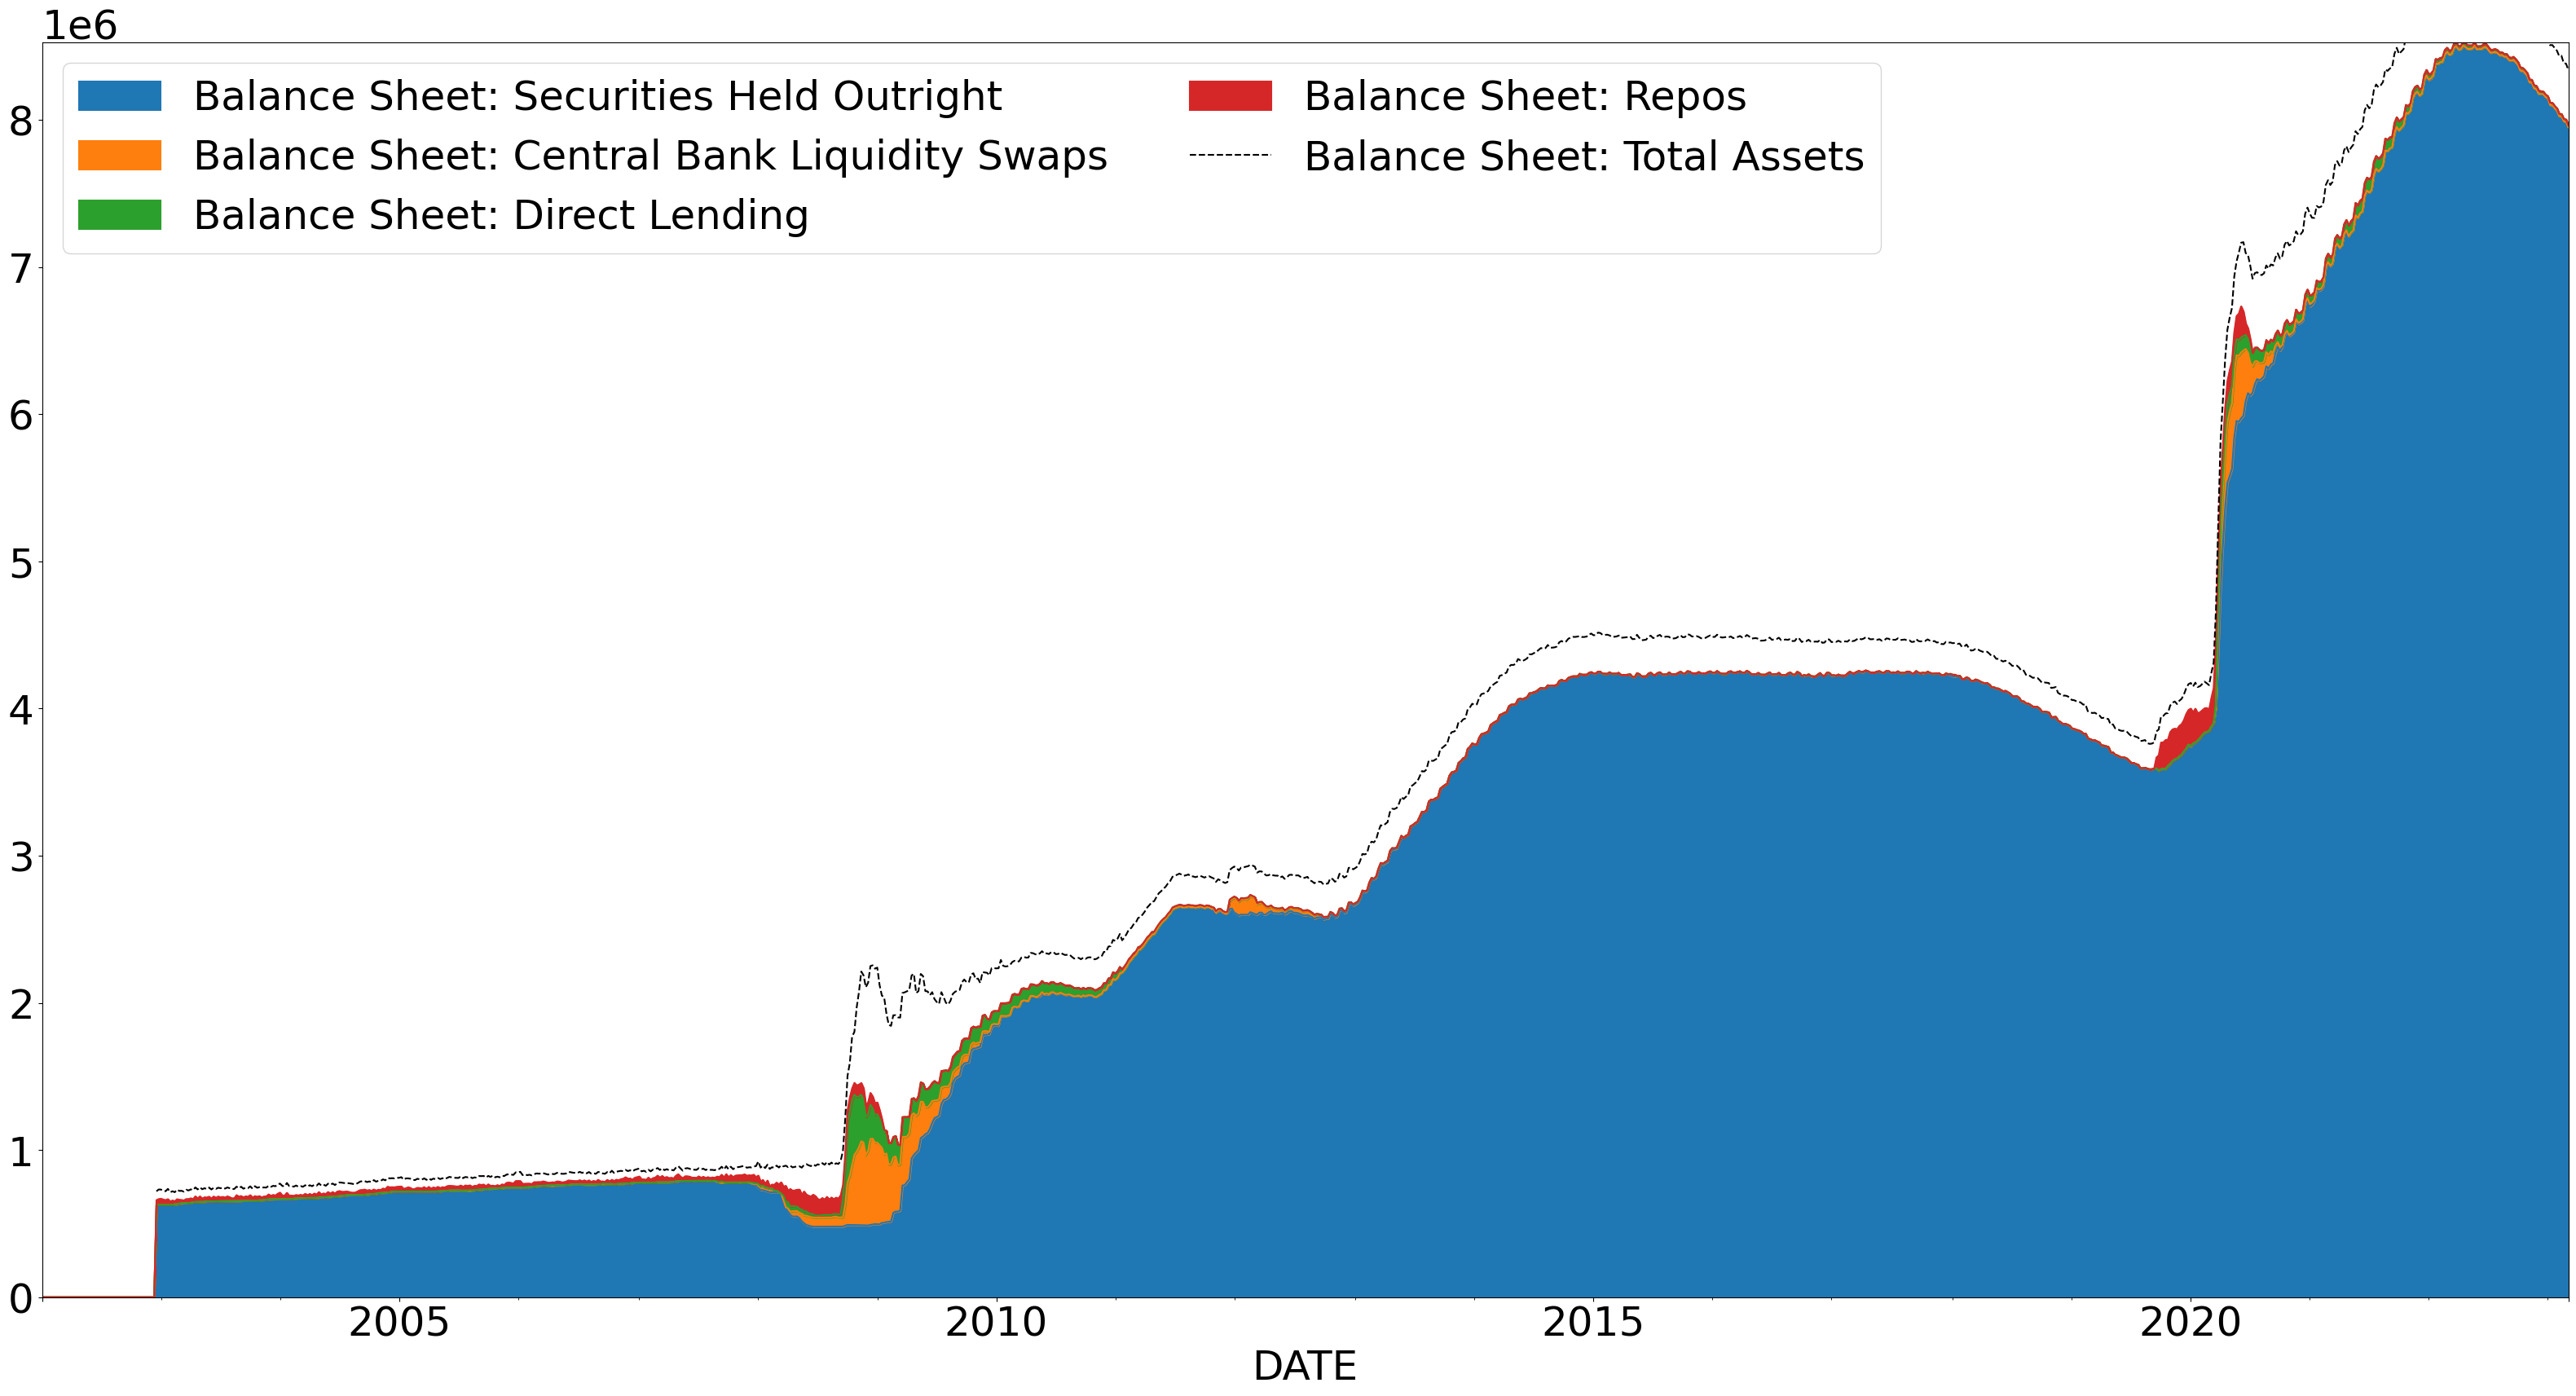

In [36]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Securities Held Outright",
               "Balance Sheet: Central Bank Liquidity Swaps",
               "Balance Sheet: Direct Lending",
               "Balance Sheet: Repos"]

plot_stacked_lines(data, 
                   account_vars,
                   linewidth = 1.5, 
                   total_var = "Balance Sheet: Total Assets")



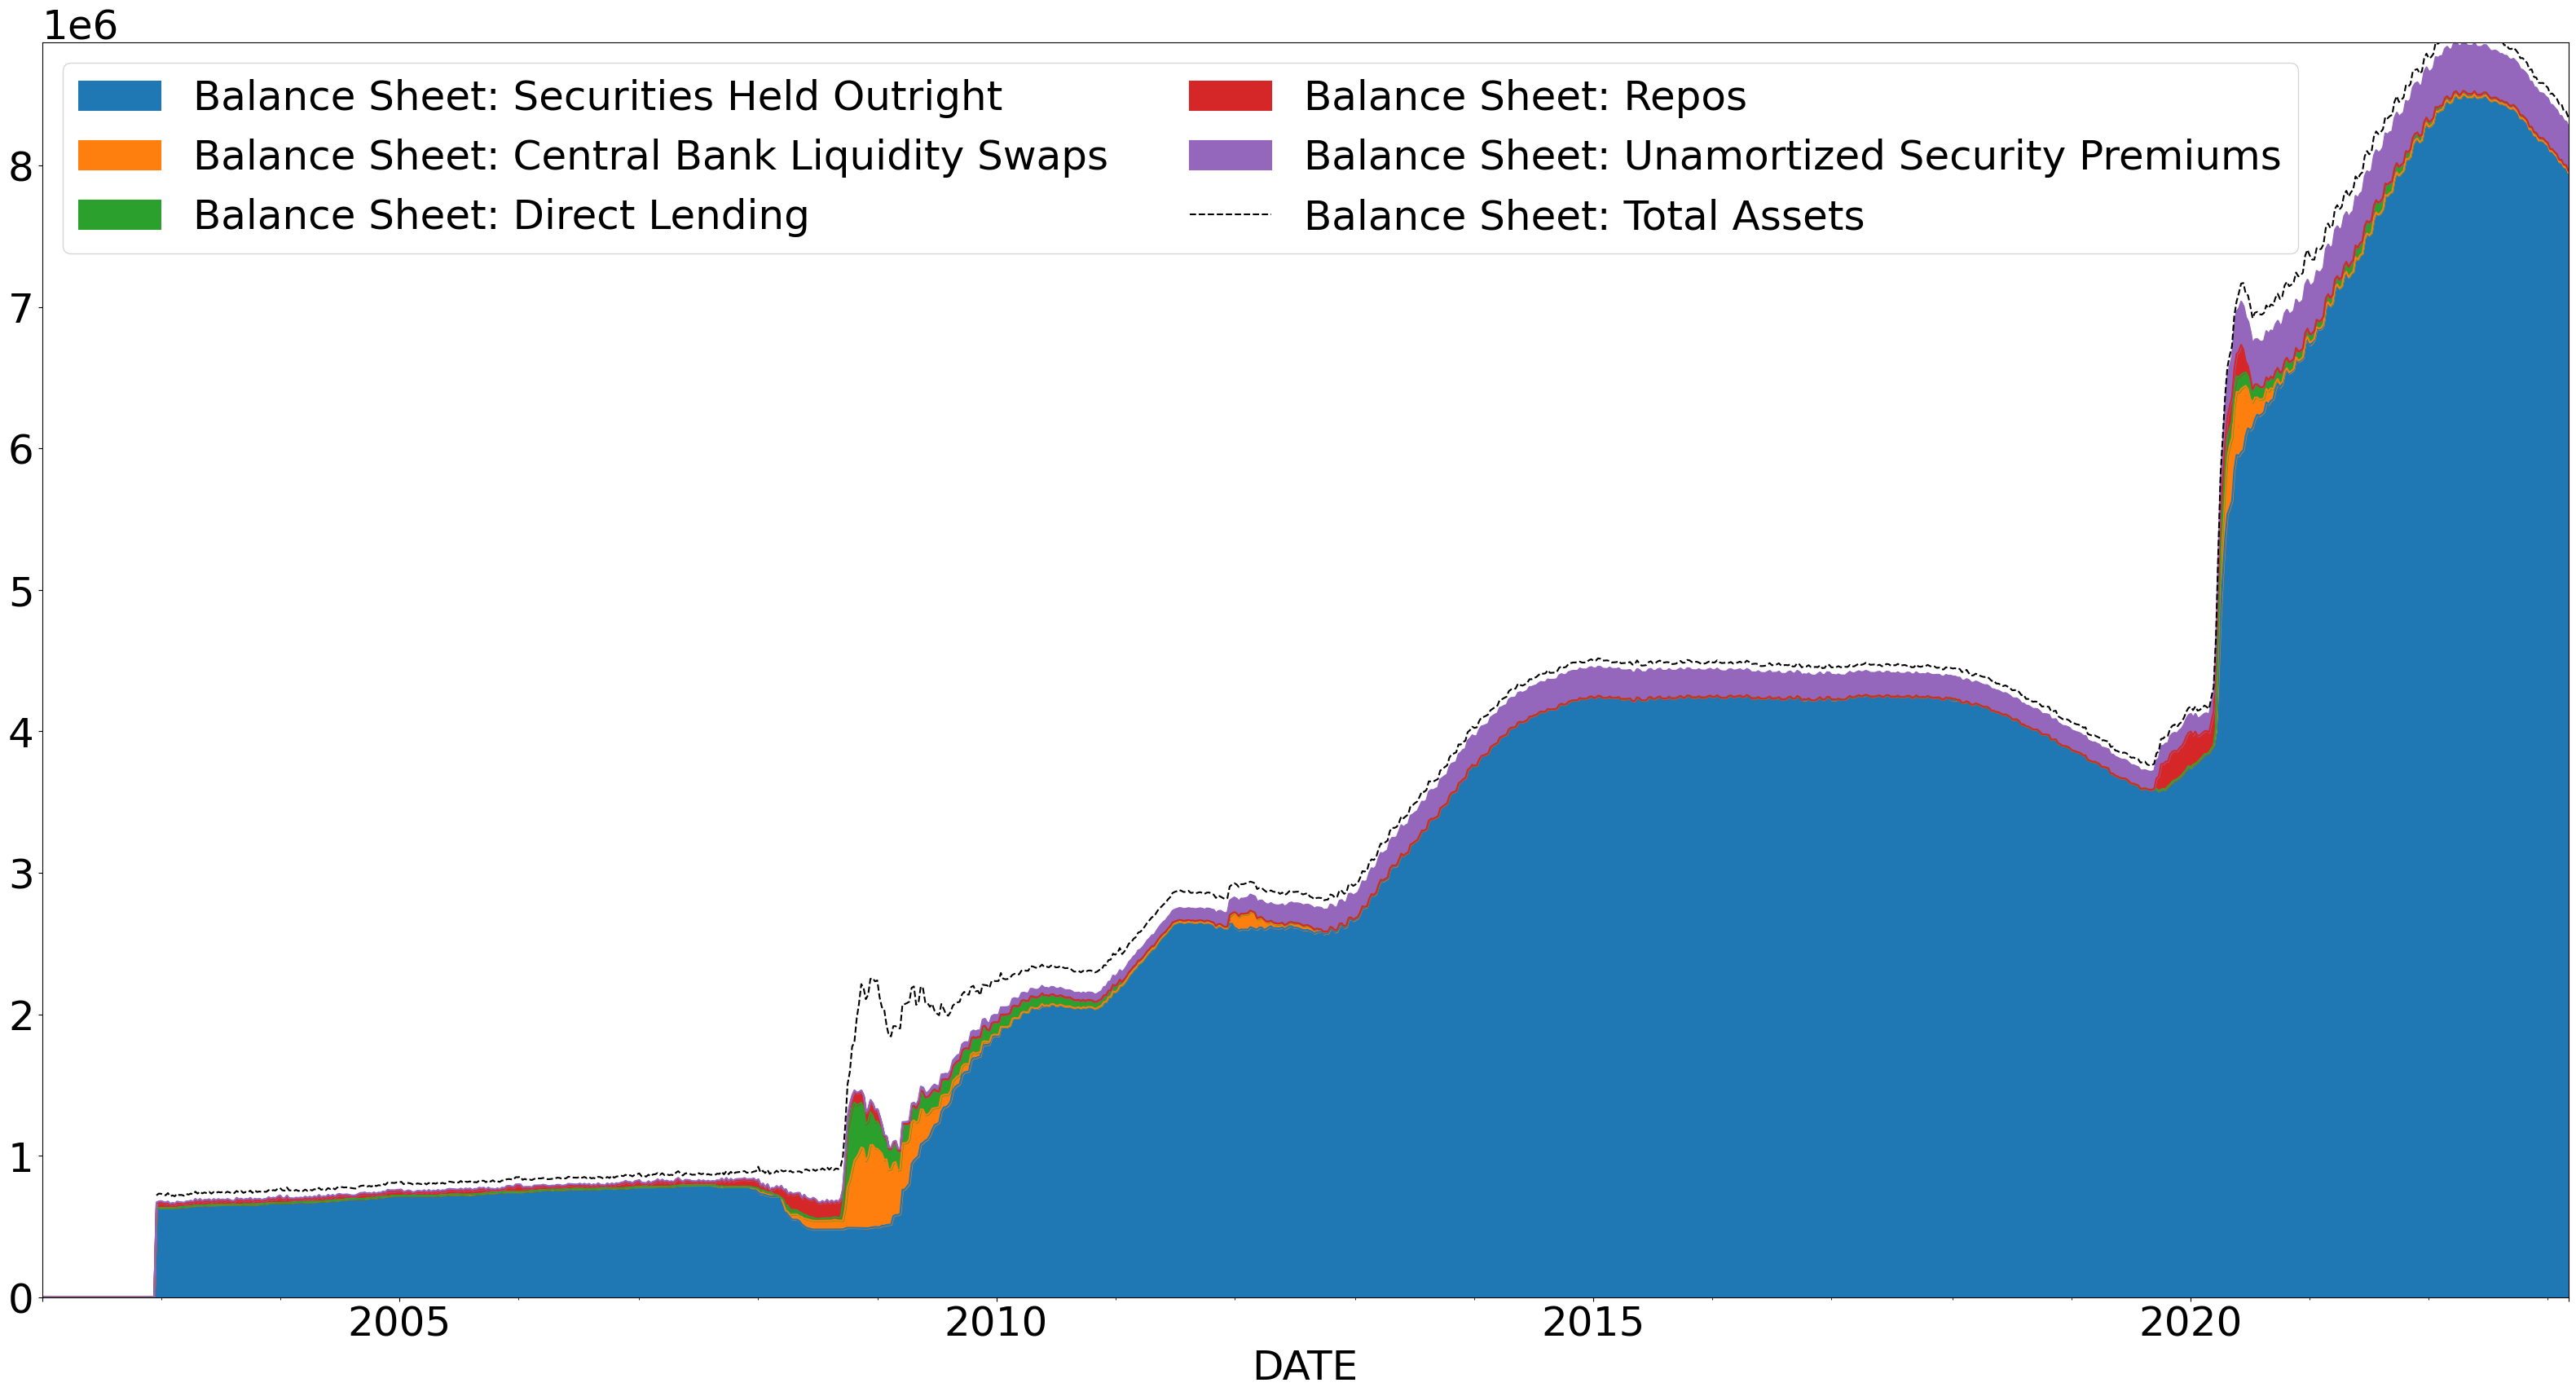

In [37]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Securities Held Outright",
               "Balance Sheet: Central Bank Liquidity Swaps",
               "Balance Sheet: Direct Lending",
               "Balance Sheet: Repos",
               "Balance Sheet: Unamortized Security Premiums"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, 
                   total_var = "Balance Sheet: Total Assets")

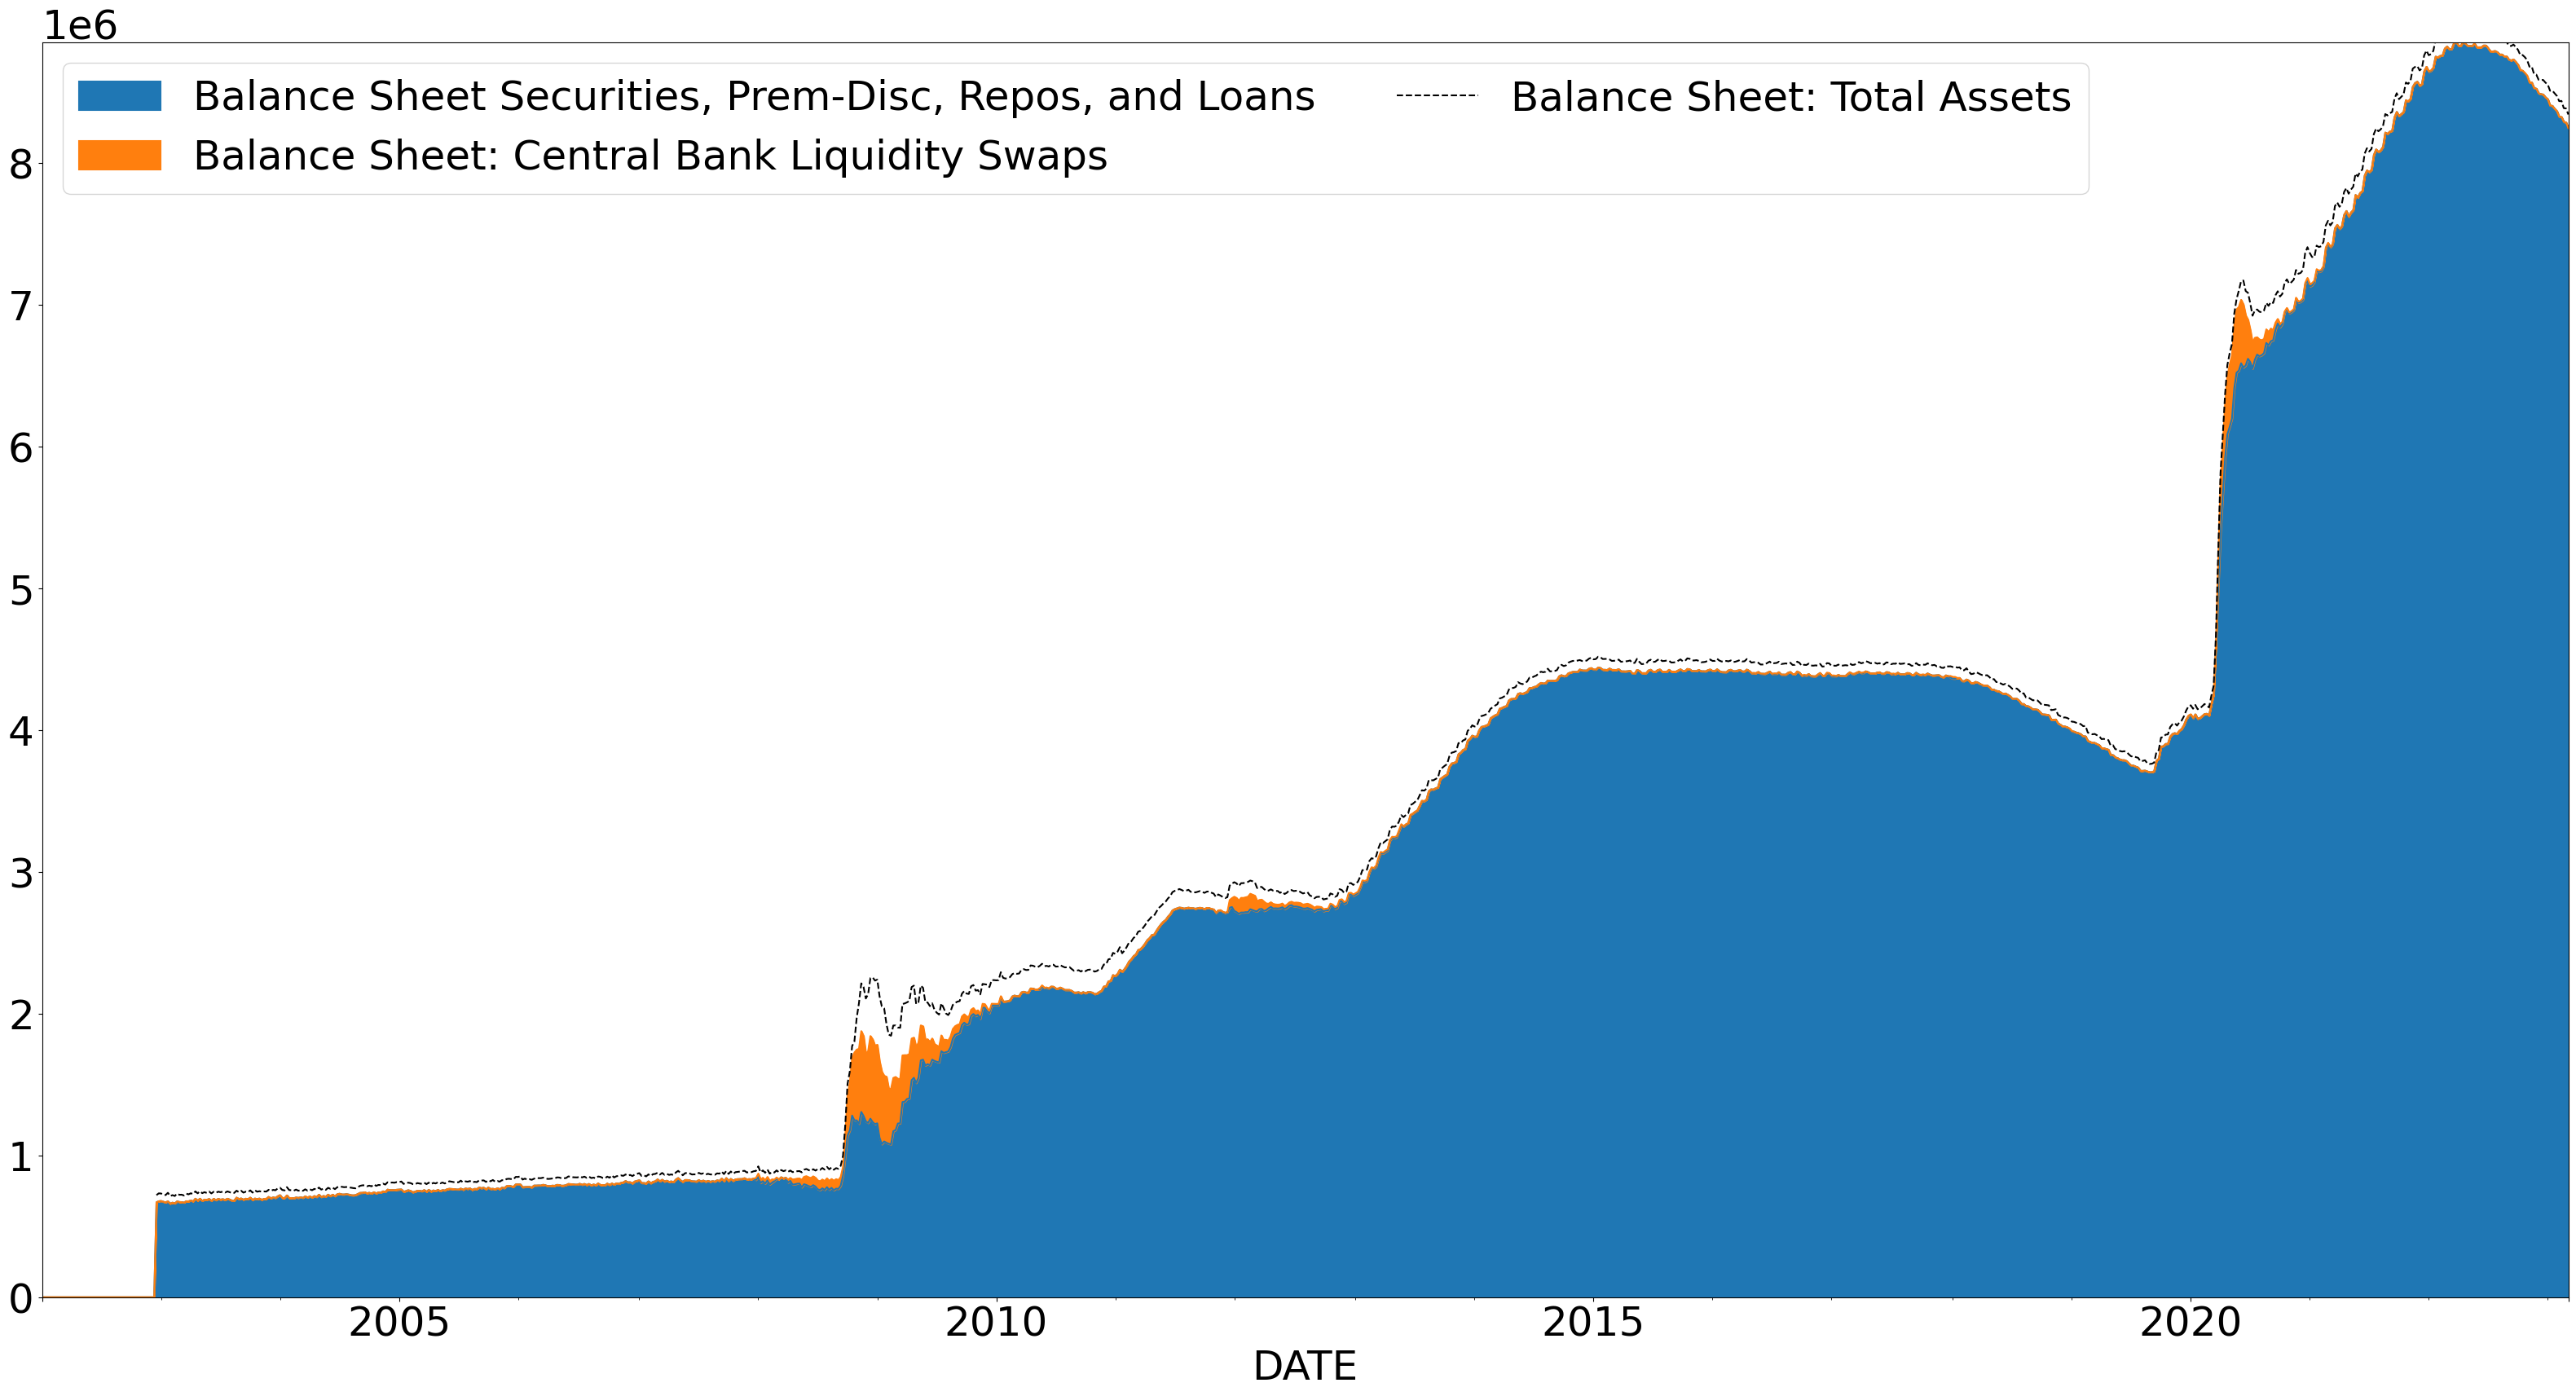

In [38]:
#fedProject
# . . . 
account_vars = ["Balance Sheet Securities, Prem-Disc, Repos, and Loans",
                "Balance Sheet: Central Bank Liquidity Swaps"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Assets")


## Liabilities of Federal Reserve

Returning to our earlier discussion of the monetary base and excess reserves, we can think of excess reserves held at the Fed as comprising part of the Federal Reserve's liabilities. But what exactly are excess reserves? Banks have required reserves, or at least they did before the recent COVID-19 measures that reduced required reserves to zero. Required reserves are those funds that they keep on hand in order to fulfill legal reserve requirements. Before the 2008 Crisis, no interest was paid on any reserves. After the 2008 Crisis, interest began to be paid on required *and* excess reserves held at the Federal Reserve. Reserves in the financial system largely shifted to being held at the Federal Reserve as a result.

Parties that hold excess reserves at the Federal Reserve earn a risk free rate of interest on those deposits. Banks decide between earning this risk free rate of return or investing those reserves in the market.

There are two major sources of deposits at the Fed. Deposits of financial institutions are largely represented by reserves data. The U.S. Treasury, the body that oversees expenditures by the federal government, also holds a deposit account at the Federal Reserve.  Much as we added excess reserves and currency in circulation to represent the components of the monetary base, we can add together all reserves and the U.S. Treasury General Account that is held at the Fed to represent deposits held at the Fed. Only a small fraction of unexplained deposits remain.

\*There appears to be an error in one deposit account at the Fed in September 2015 as the sum of reserves held at the Fed and the Treasury General Account is *greater* than the value of all deposits. 

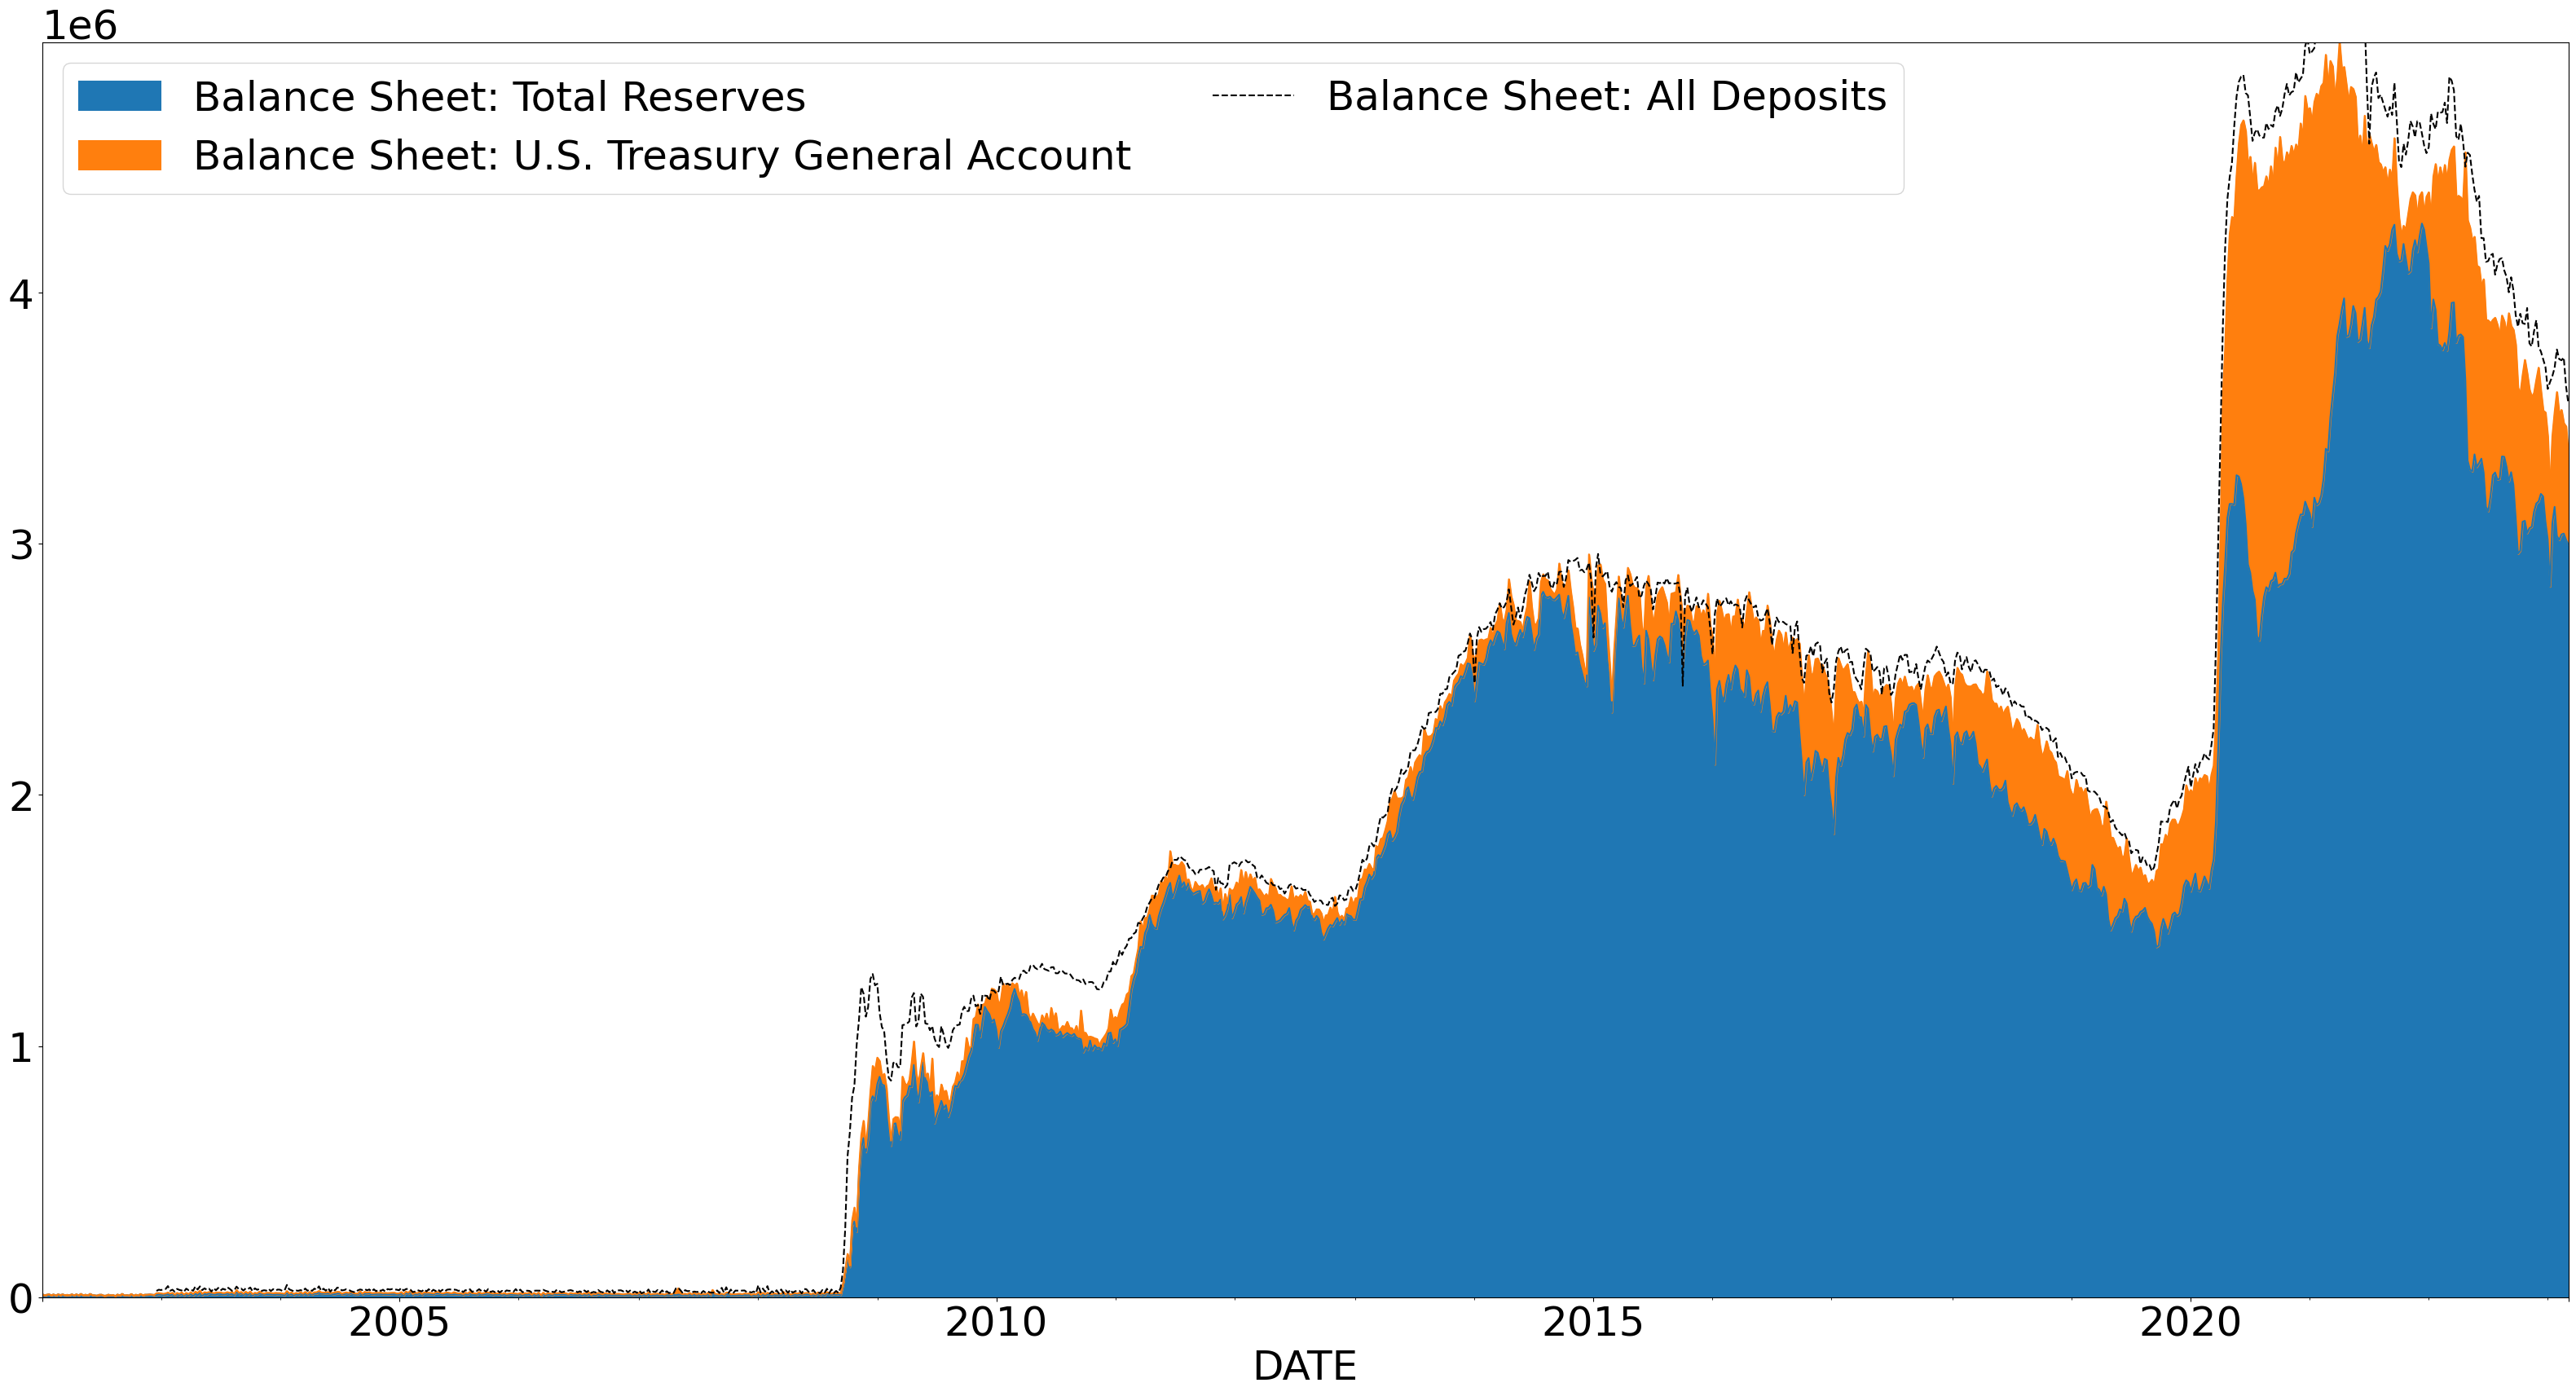

In [39]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Total Reserves",
                "Balance Sheet: U.S. Treasury General Account"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: All Deposits")

Federal Reserve Chariman Benjamin S. Bernanke has explained that the purpose of paying interest on excess reserves was to keep a portion of the monetary base out of circulation. Banks increase their level of deposits so long as they expect that the risk adjust return on remaining investments is less the the rate paid on excess reserves. Thus, one way to conceptualize the liabilities of the Fed is to distinguish between reserves held at the Federal Reserve and Federal Reserve notes outside of the federal reserve. Nearly the entire base is accounted for.

Starting in 2015, requirements to maintain a minimum liquidity coverage ratio as defined by Basil III forces banks to either maintain a minimum value of reserves or high quality liquid assets (HQLAs) in order to make loans, thus limiting the extent to which lending can increase the velocity of the base. 

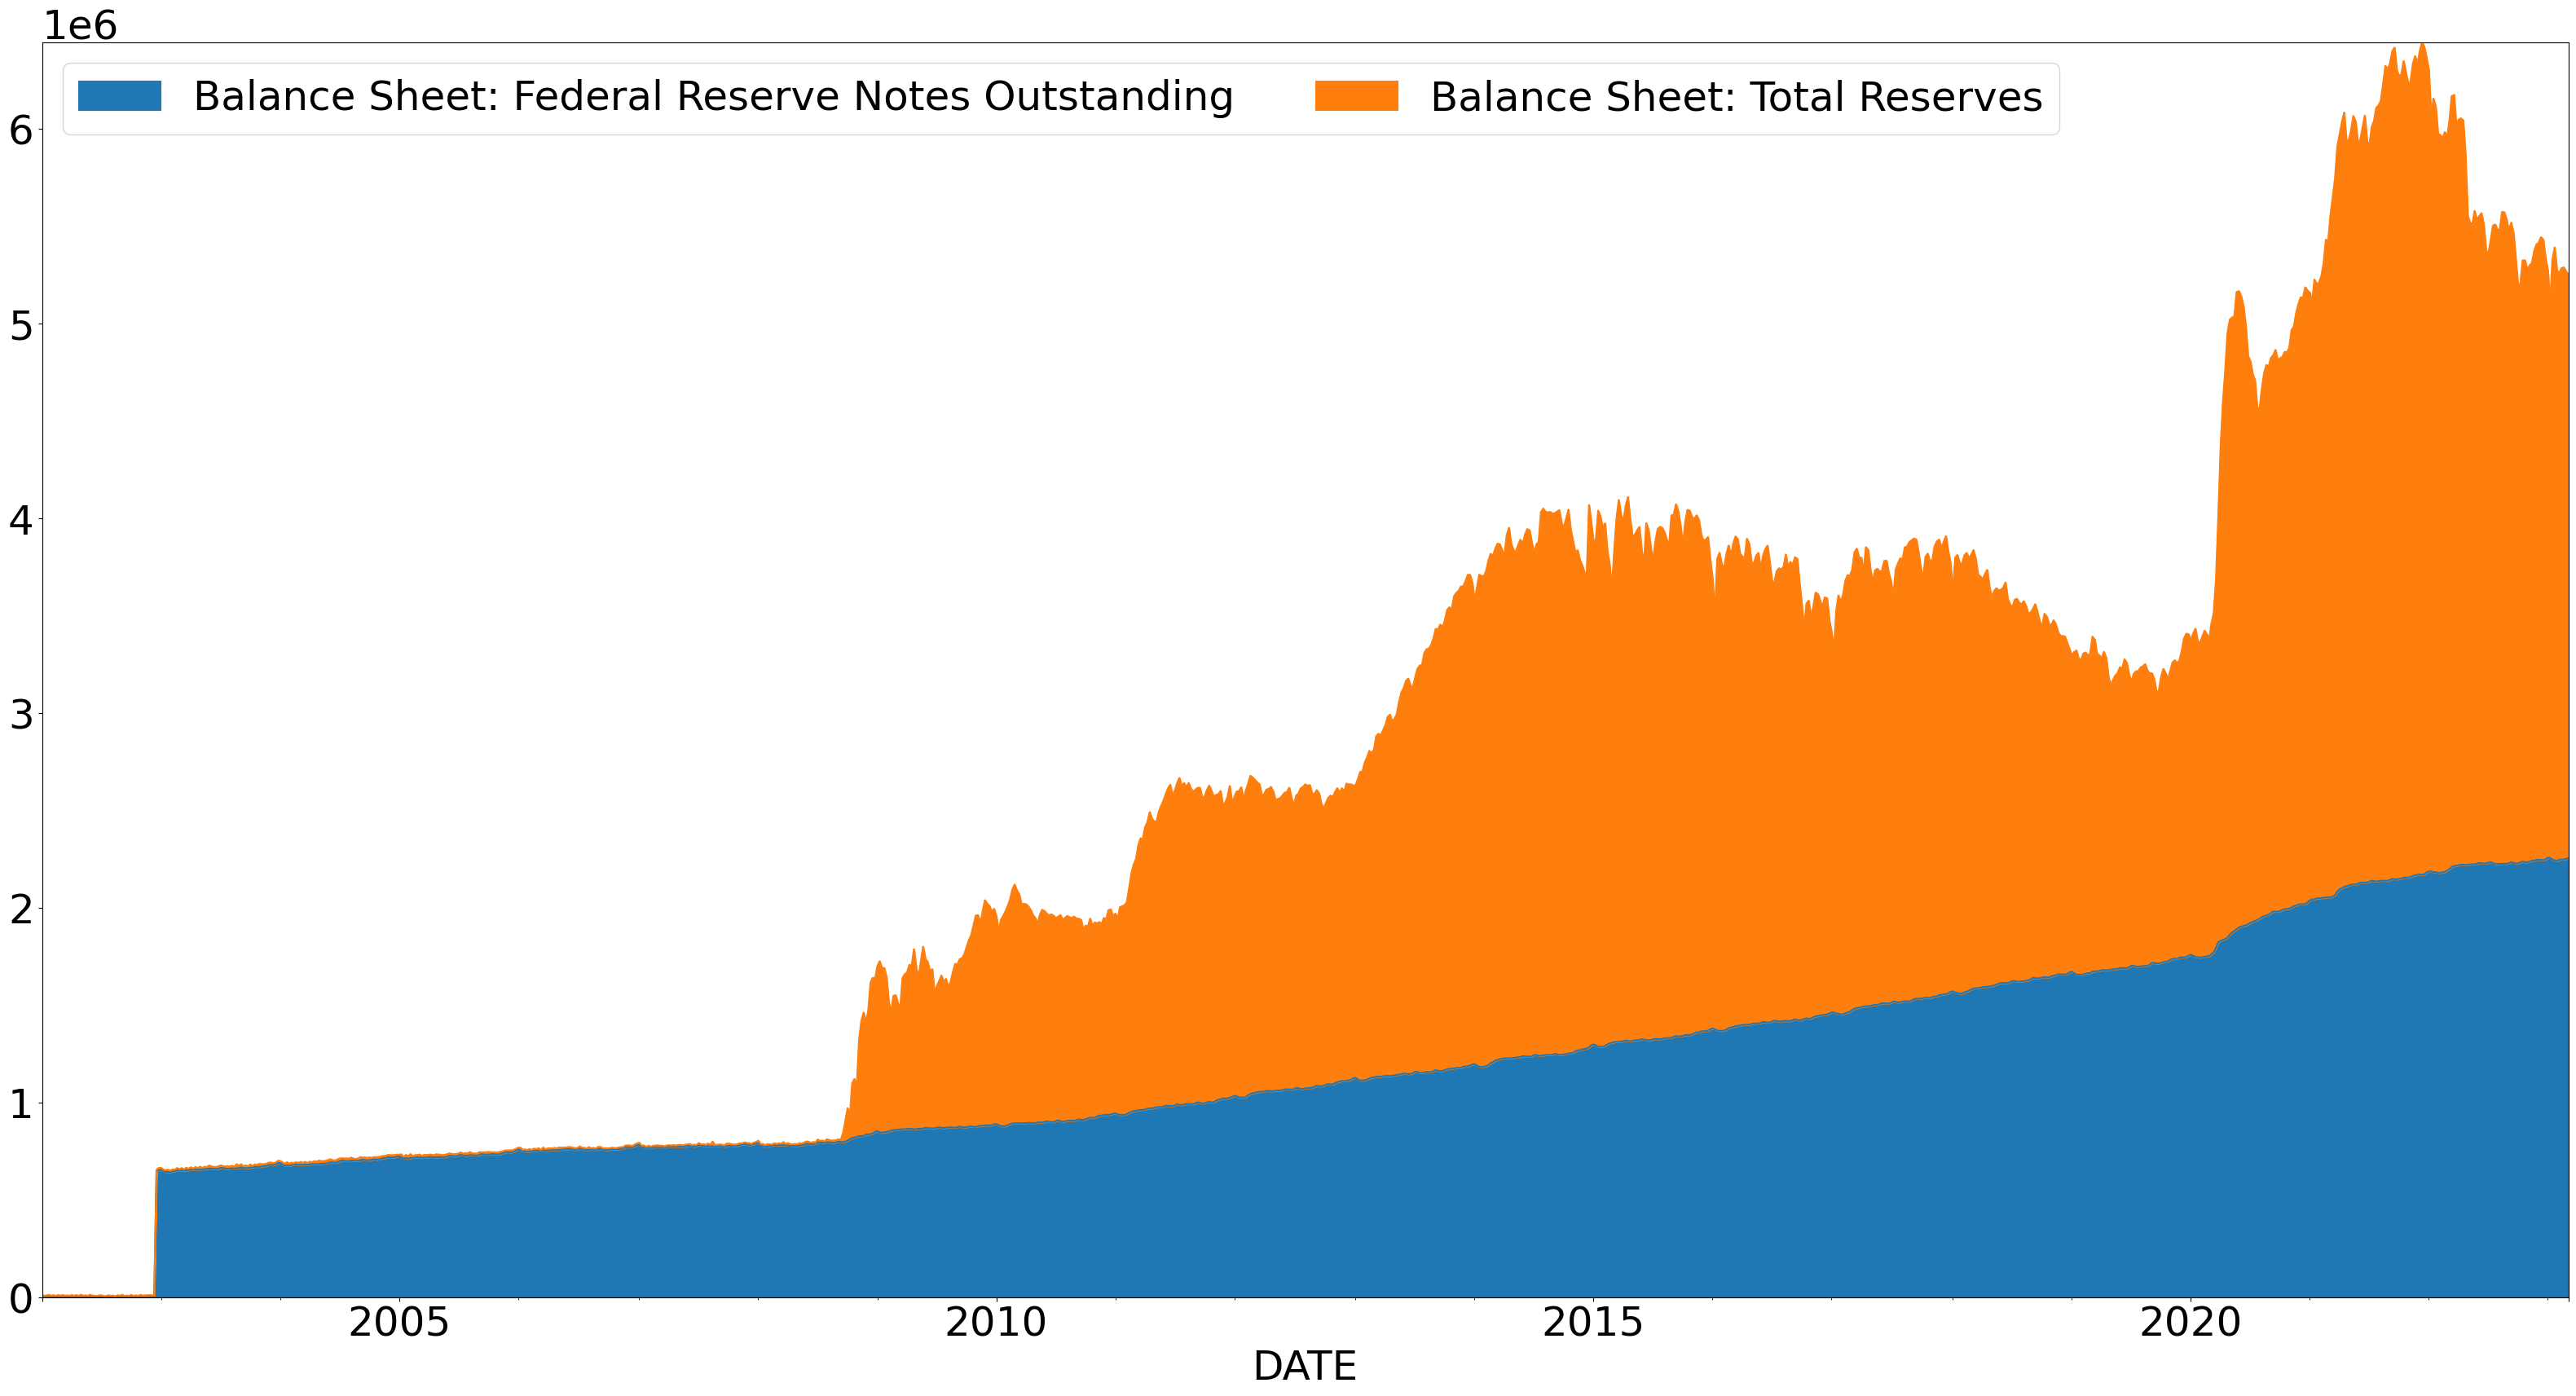

In [40]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding",
                "Balance Sheet: Total Reserves"]

plot_stacked_lines(data, account_vars, linewidth = 1.5)

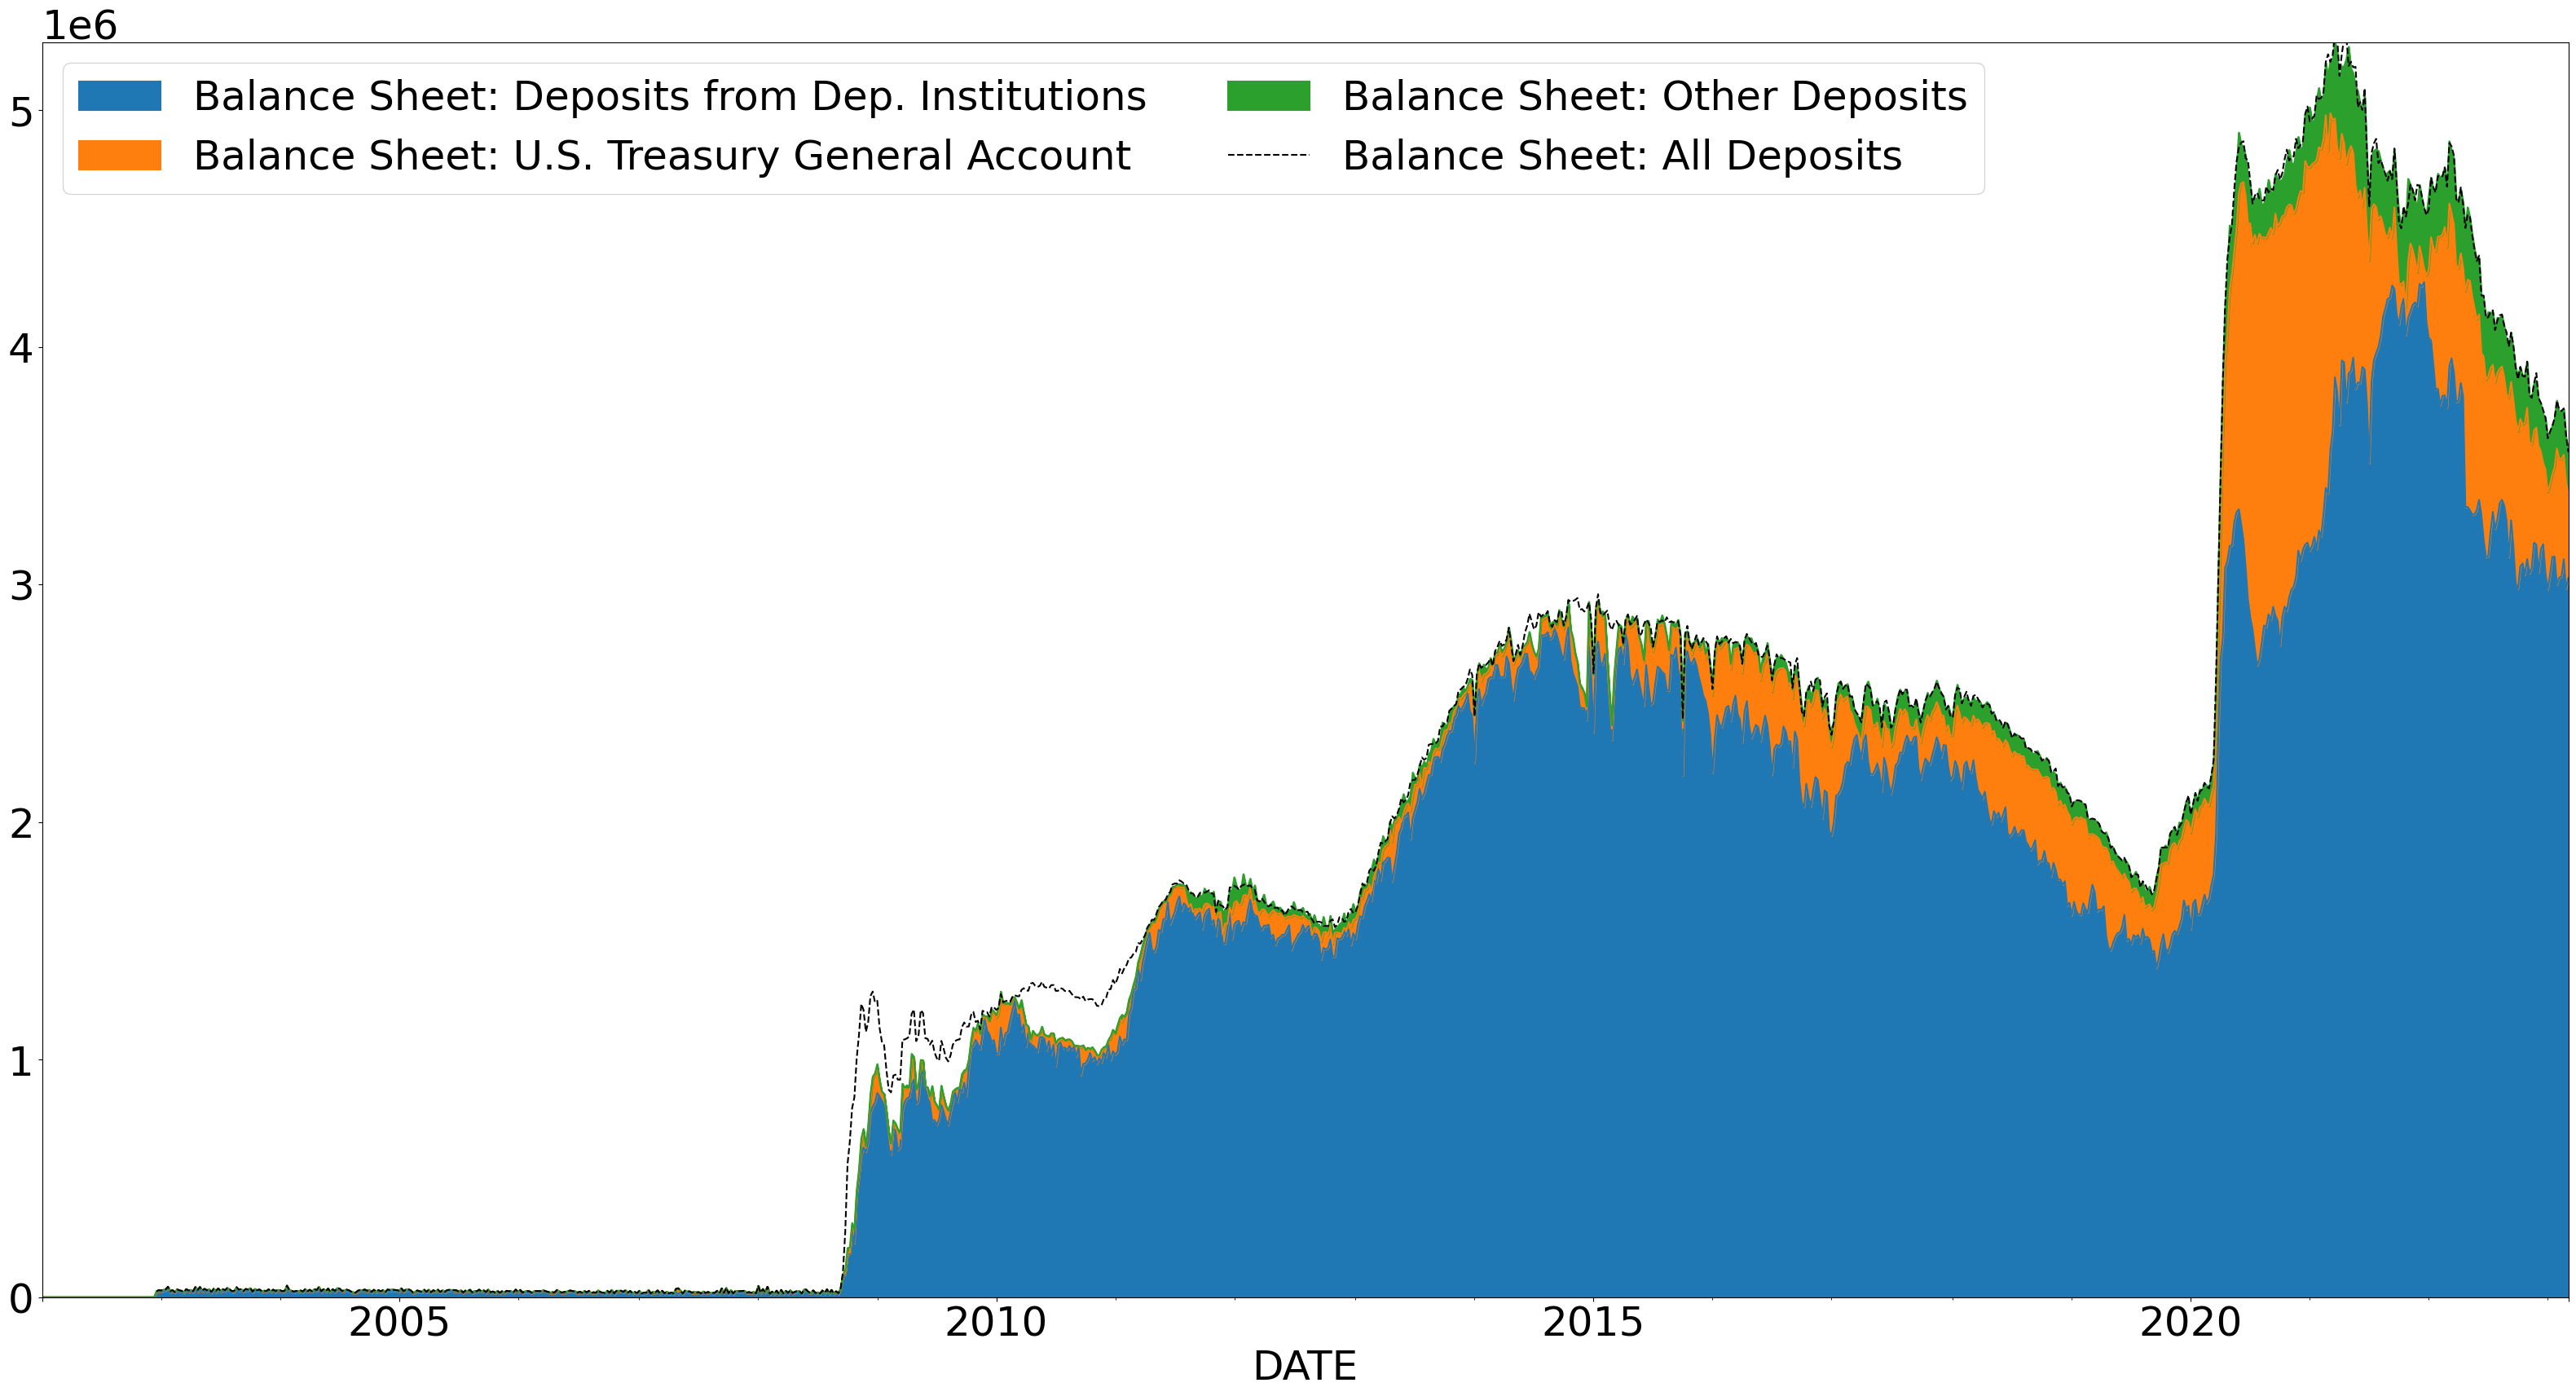

In [41]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Deposits from Dep. Institutions",
                "Balance Sheet: U.S. Treasury General Account",
                "Balance Sheet: Other Deposits"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: All Deposits")

Another way to conceptualize these two components of the liability side of the Fed's balance sheet is to compare them to the total level of deposits held at the Fed. So far, these two components have comprised that vast majority of deposits held at the Federal Reserve. And, together with Federal Reserve Notes Outstanding, deposits comprise a significant portion of the liabilities side of the balance sheet. They are therefore a good indicator of monetary policy. 

If we include liabilities from activity in the overnight lending market, taking the form of reverse repurchase agreements (reverse repos), we account for nearly the entire liabilities side of the balance sheet. 

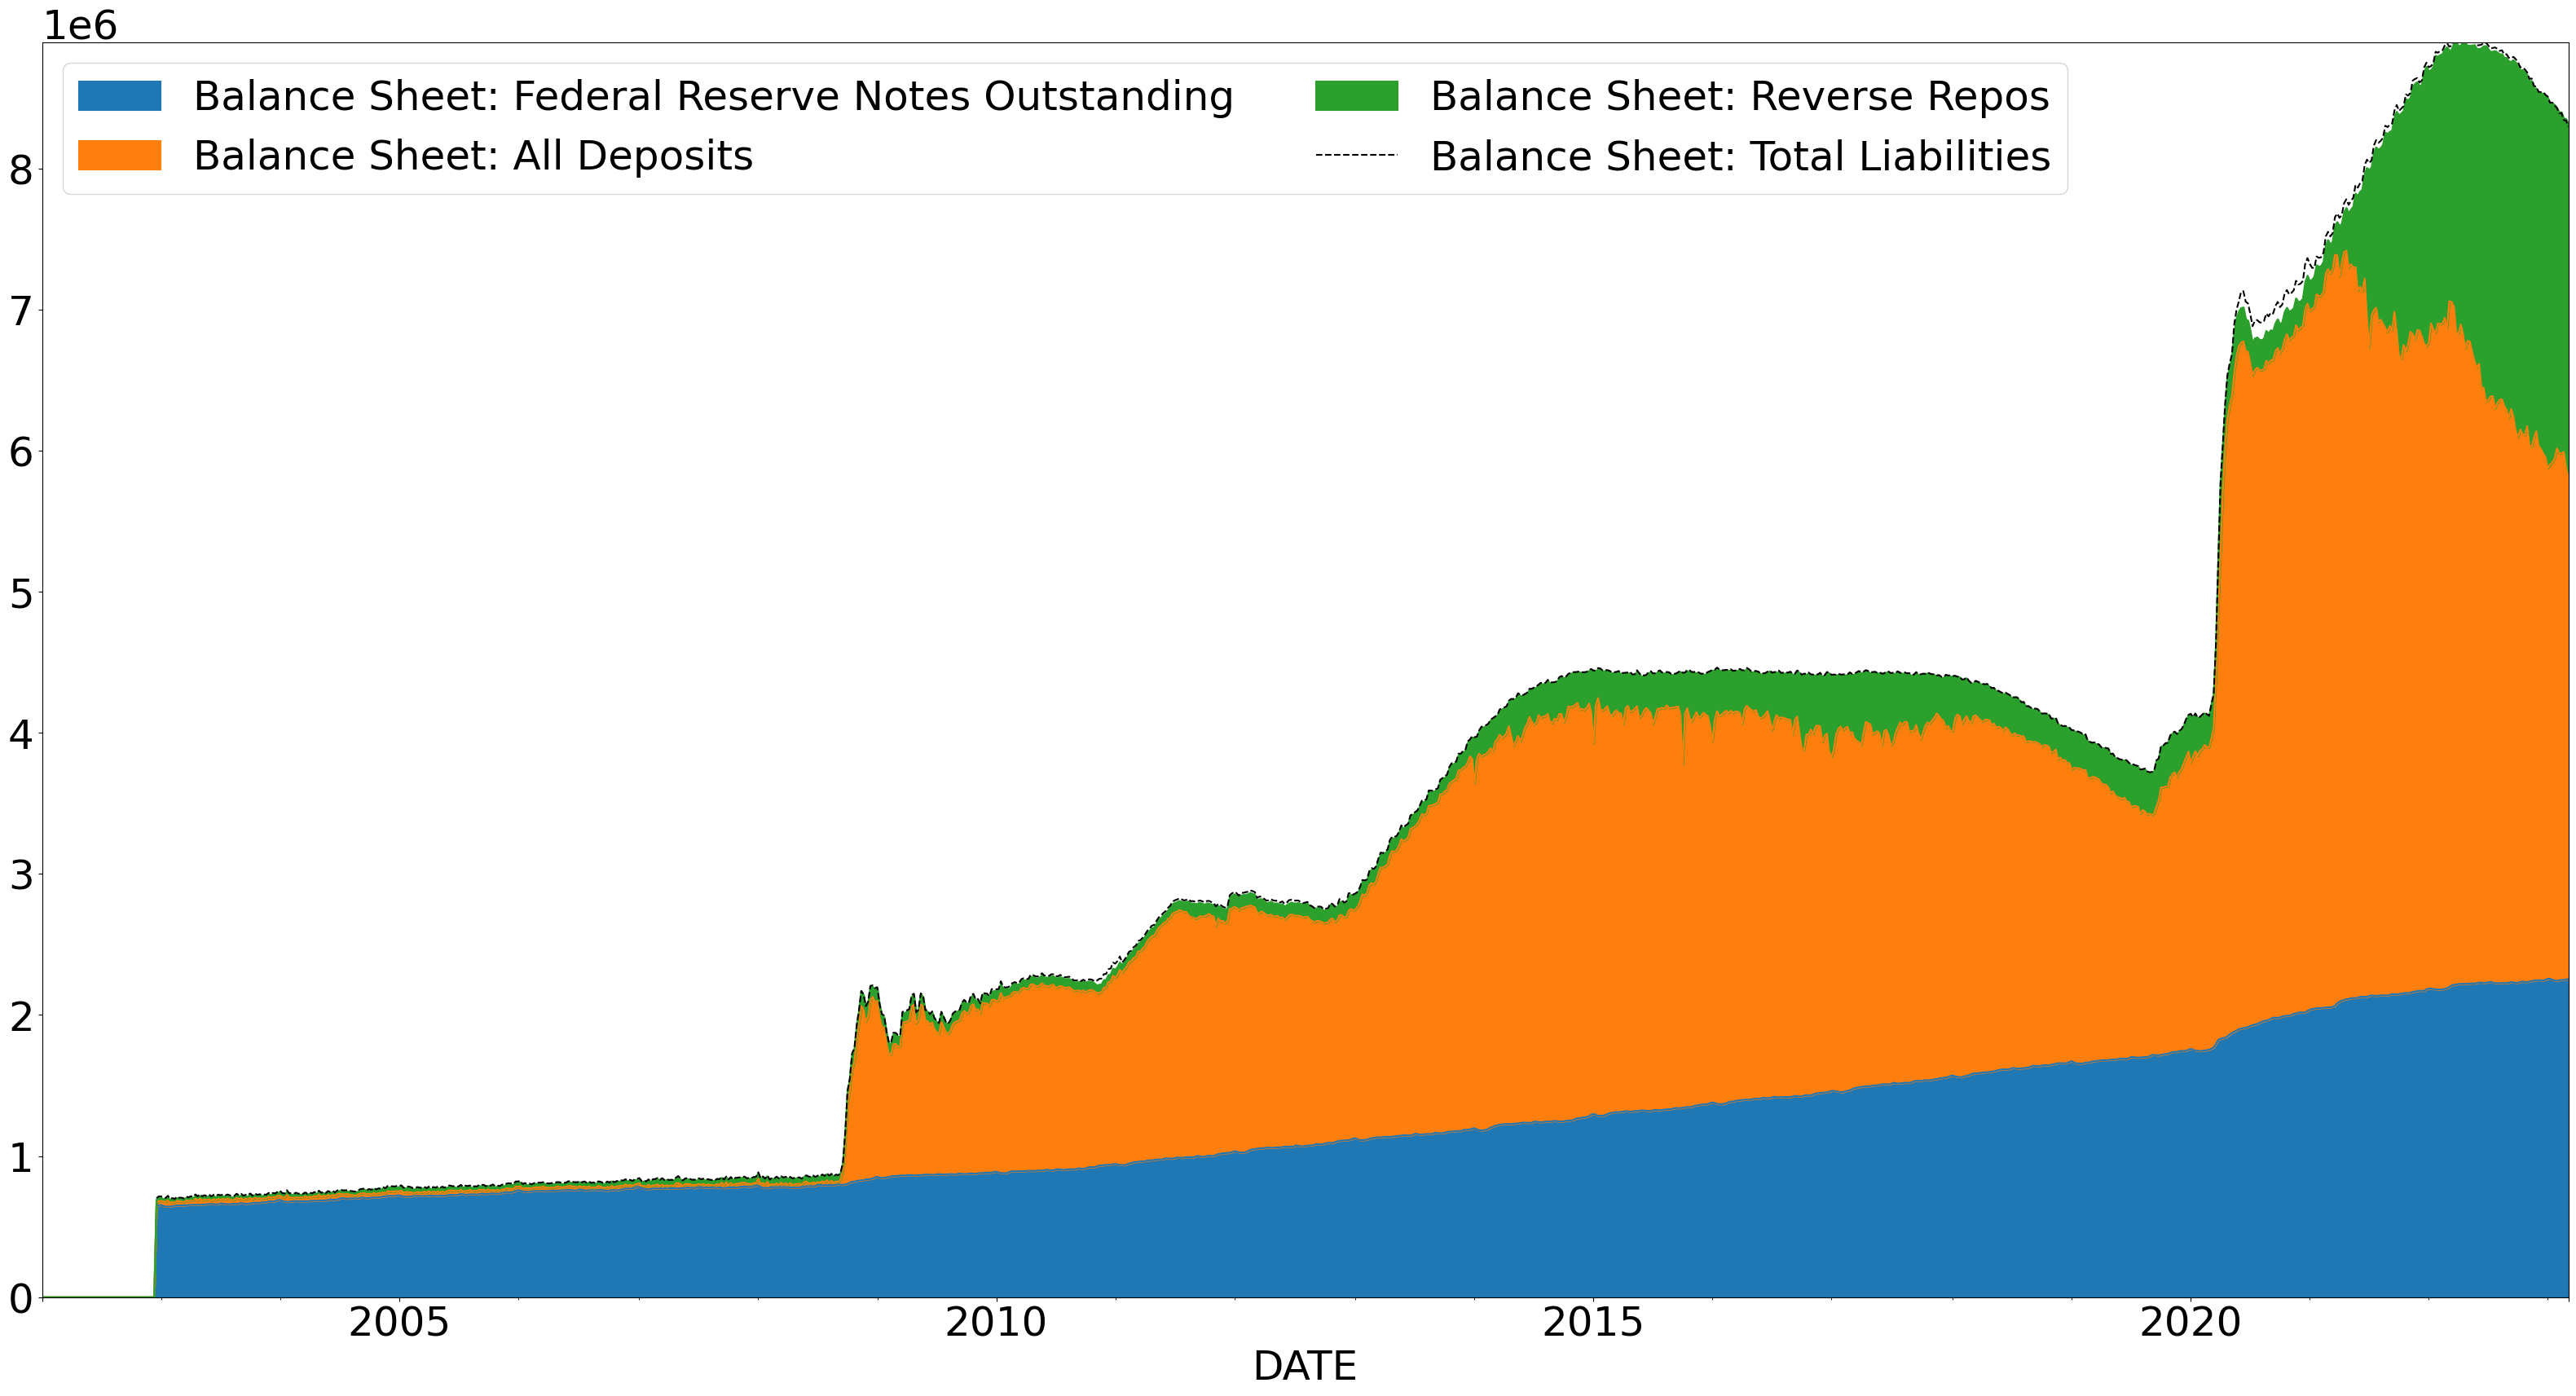

In [42]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding",
                "Balance Sheet: All Deposits",
                "Balance Sheet: Reverse Repos"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Liabilities")